# Reading the data:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data=pd.read_csv(r"C:\Users\91996\Desktop\ML\insurance.csv")

In [4]:
data.head()

Customer       State  Coverage Education EmploymentStatus Gender  Income  \
0  BU79786  Washington     Basic  Bachelor         Employed      F   56274   
1  QZ44356     Arizona  Extended  Bachelor       Unemployed      F       0   
2  AI49188      Nevada   Premium  Bachelor         Employed      F   48767   
3  WW63253  California     Basic  Bachelor       Unemployed      M       0   
4  HB64268  Washington     Basic  Bachelor         Employed      M   43836   

  Location Code Marital Status  Monthly Premium Auto  ...  \
0      Suburban        Married                    69  ...   
1      Suburban         Single                    94  ...   
2      Suburban        Married                   108  ...   
3      Suburban        Married                   106  ...   
4         Rural         Single                    73  ...   

   Number of Open Complaints  Number of Policies     Policy Type  \
0                          0                   1  Corporate Auto   
1                          0                   8   Personal Auto   
2                          0                   2   Personal Auto   
3                          0                   7  Corporate Auto   
4                          0                   1   Personal Auto   

         Policy Renew Offer Type Sales Channel Total Claim Amount  \
0  Corporate L3           Offer1         Agent         384.811147   
1   Personal L3           Offer3         Agent        1131.464935   
2   Personal L3           Offer1         Agent         566.472247   
3  Corporate L2           Offer1   Call Center         529.881344   
4   Personal L1           Offer1         Agent         138.130879   

   Vehicle Class  Vehicle Size Customer Lifetime Value  
0   Two-Door Car       Medsize             2763.519279  
1  Four-Door Car       Medsize             6979.535903  
2   Two-Door Car       Medsize            12887.431650  
3            SUV       Medsize             7645.861827  
4  Four-Door Car       Medsize             2813.692575  

[5 rows x 22 columns]

# Checking type of data:-

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

# So there are string ,integer and float type variables.

# Here we can drop Customer column as it is unique and would have not significant value on the models outcome.

In [7]:
del data['Customer']

# Checking if there are any NaN values:-

In [9]:
data.isna().sum()

State                            0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Customer Lifetime Value          0
dtype: int64

# Exploratory Data Analysis

# 1. Understanding what kind of data are we dealing with 

# 1.1. State column

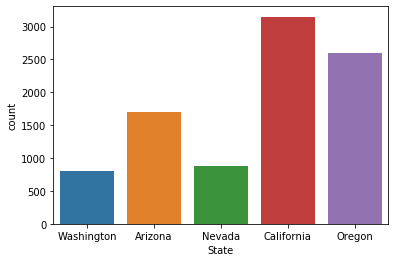

In [21]:
sns.countplot(data=data,x="State")


In [31]:
data.State.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

# 1.2 Coverage

In [32]:
data.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

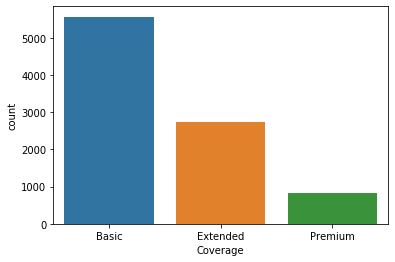

In [33]:
sns.countplot(data=data,x="Coverage")

# 1.3 Education

In [34]:
data.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

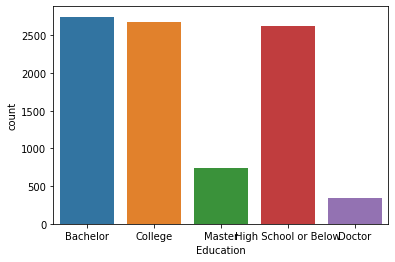

In [35]:
sns.countplot(data=data,x="Education")

# 1.4 EmploymentStatus

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


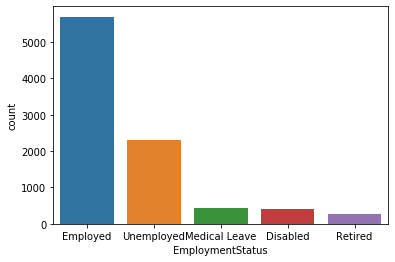

In [37]:
print(data.EmploymentStatus.value_counts())
sns.countplot(data=data,x="EmploymentStatus")

# 1.5 Gender

F    4658
M    4476
Name: Gender, dtype: int64


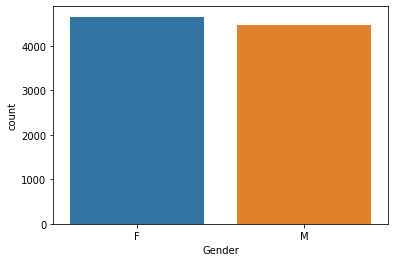

In [39]:
print(data.Gender.value_counts())
sns.countplot(data=data,x="Gender")

# 1.6 Income

In [46]:
no_salary=data[data['Income']==0]

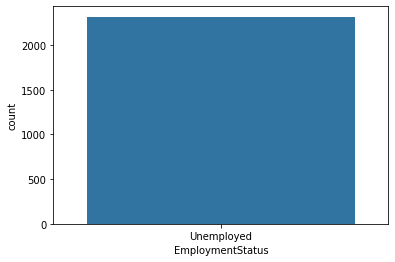

In [50]:
sns.countplot(no_salary.EmploymentStatus)

# This verifies that our data is not faulted because all the unemployed people have no salaries.

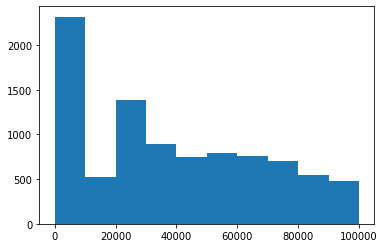

In [60]:
plt.hist(data.Income)
plt.show()

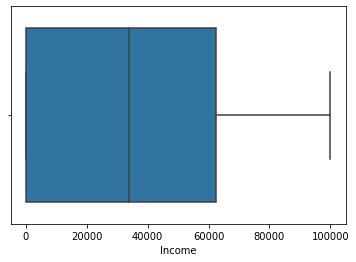

In [63]:
sns.boxplot(data.Income)

# We can say that 75th percentile of people have icome of around 62k.

# 1.7 Location Code

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64


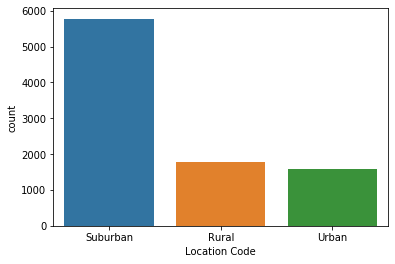

In [64]:
print(data['Location Code'].value_counts())
sns.countplot(data=data,x="Location Code")

# 1.8 Marital Status

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64


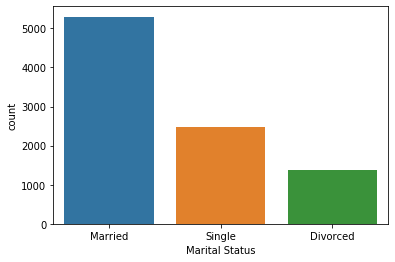

In [65]:
print(data['Marital Status'].value_counts())
sns.countplot(data=data,x="Marital Status")

# 1.8 Monthly Premium Auto

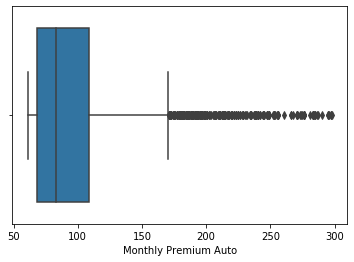

In [68]:
sns.boxplot(data['Monthly Premium Auto'])


# So there are outliers in Monthly Premium Auto excedding 180

# 1.9 Months Since Last Claim

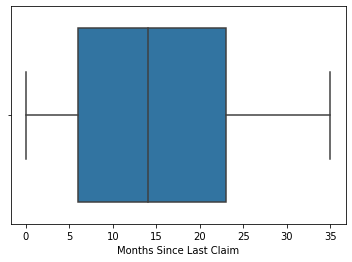

In [69]:
sns.boxplot(data['Months Since Last Claim'])

# The range of Months Since Last claimed is from 0-35

# 1.10 Months Since Policy Inception

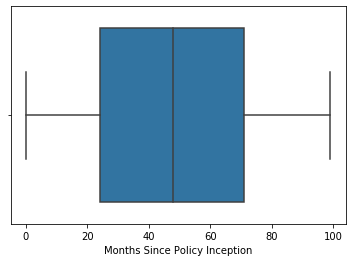

In [73]:
sns.boxplot(data['Months Since Policy Inception'])

# Here the tange is between 0 and 100 where 25-75th percentile falls under 23-72

# 1.11 Number of Open Complaints

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64


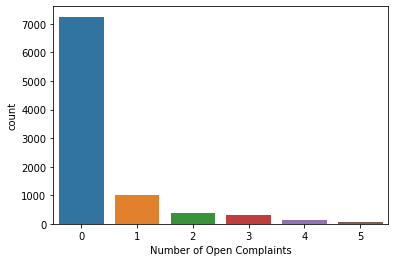

In [74]:
print(data['Number of Open Complaints'].value_counts())
sns.countplot(data=data,x="Number of Open Complaints")

# 1.12 Number of Policies

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


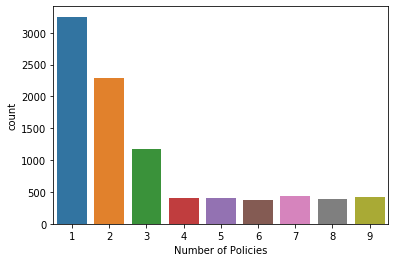

In [76]:
print(data['Number of Policies'].value_counts())
sns.countplot(data=data,x="Number of Policies")

# 1.13 Policy Type

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64


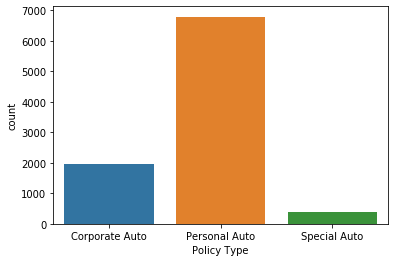

In [77]:
print(data['Policy Type'].value_counts())
sns.countplot(data=data,x="Policy Type")

# 1.14 Policy 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


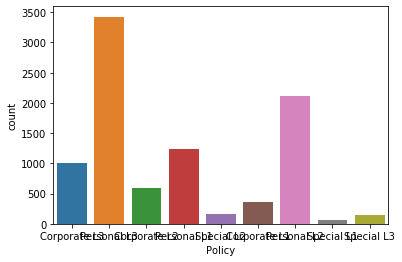

In [84]:
print(data['Policy'].value_counts())


sns.countplot(data=data,x="Policy")

# 1.15 Renew Offer Type

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64


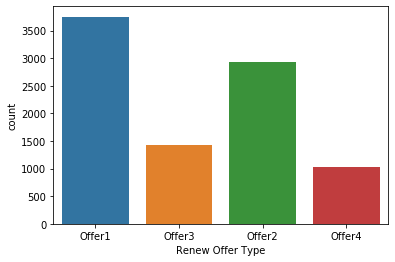

In [85]:
print(data['Renew Offer Type'].value_counts())
sns.countplot(data=data,x="Renew Offer Type")

# 1.16 Sales Channel

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64


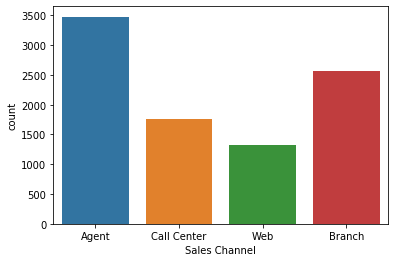

In [86]:
print(data['Sales Channel'].value_counts())
sns.countplot(data=data,x="Sales Channel")

# 1.17 Total Claim Amount

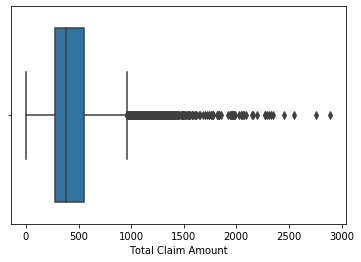

In [89]:
sns.boxplot(data['Total Claim Amount'])

# So we can see that there are some outliers in Totalclaim amount attribute where teh amount axceeds till 3000.

# 1.18 Vehicle Class

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64


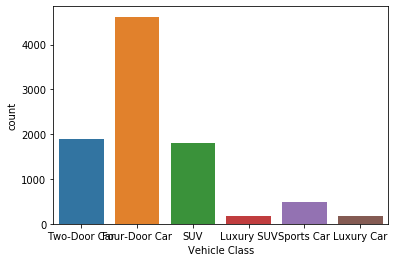

In [90]:
print(data['Vehicle Class'].value_counts())
sns.countplot(data=data,x="Vehicle Class")

# 1.18 

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


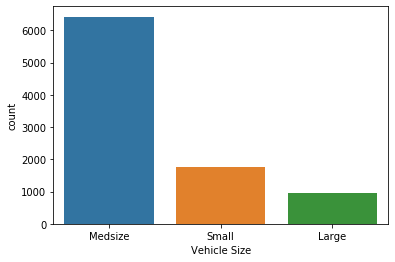

In [91]:
print(data['Vehicle Size'].value_counts())
sns.countplot(data=data,x="Vehicle Size")

# 1.19 Customer Lifetime Value

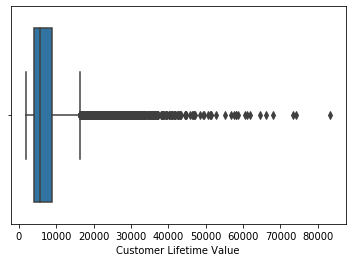

In [93]:
sns.boxplot(data['Customer Lifetime Value'])

# Its very crucial to know how our target variable is and how is the distribution.So most of the customers lifetime is under 15000.There are some outliers.So we need to decise our model accordingly.

# Overall Picture of our data:-
# Our data comprises of:-
# 1.Categorical Value
# 2.Numerical value

# Our target variable is continous,so this is a Regression Problem

# 2. Multivariate Analysis:-

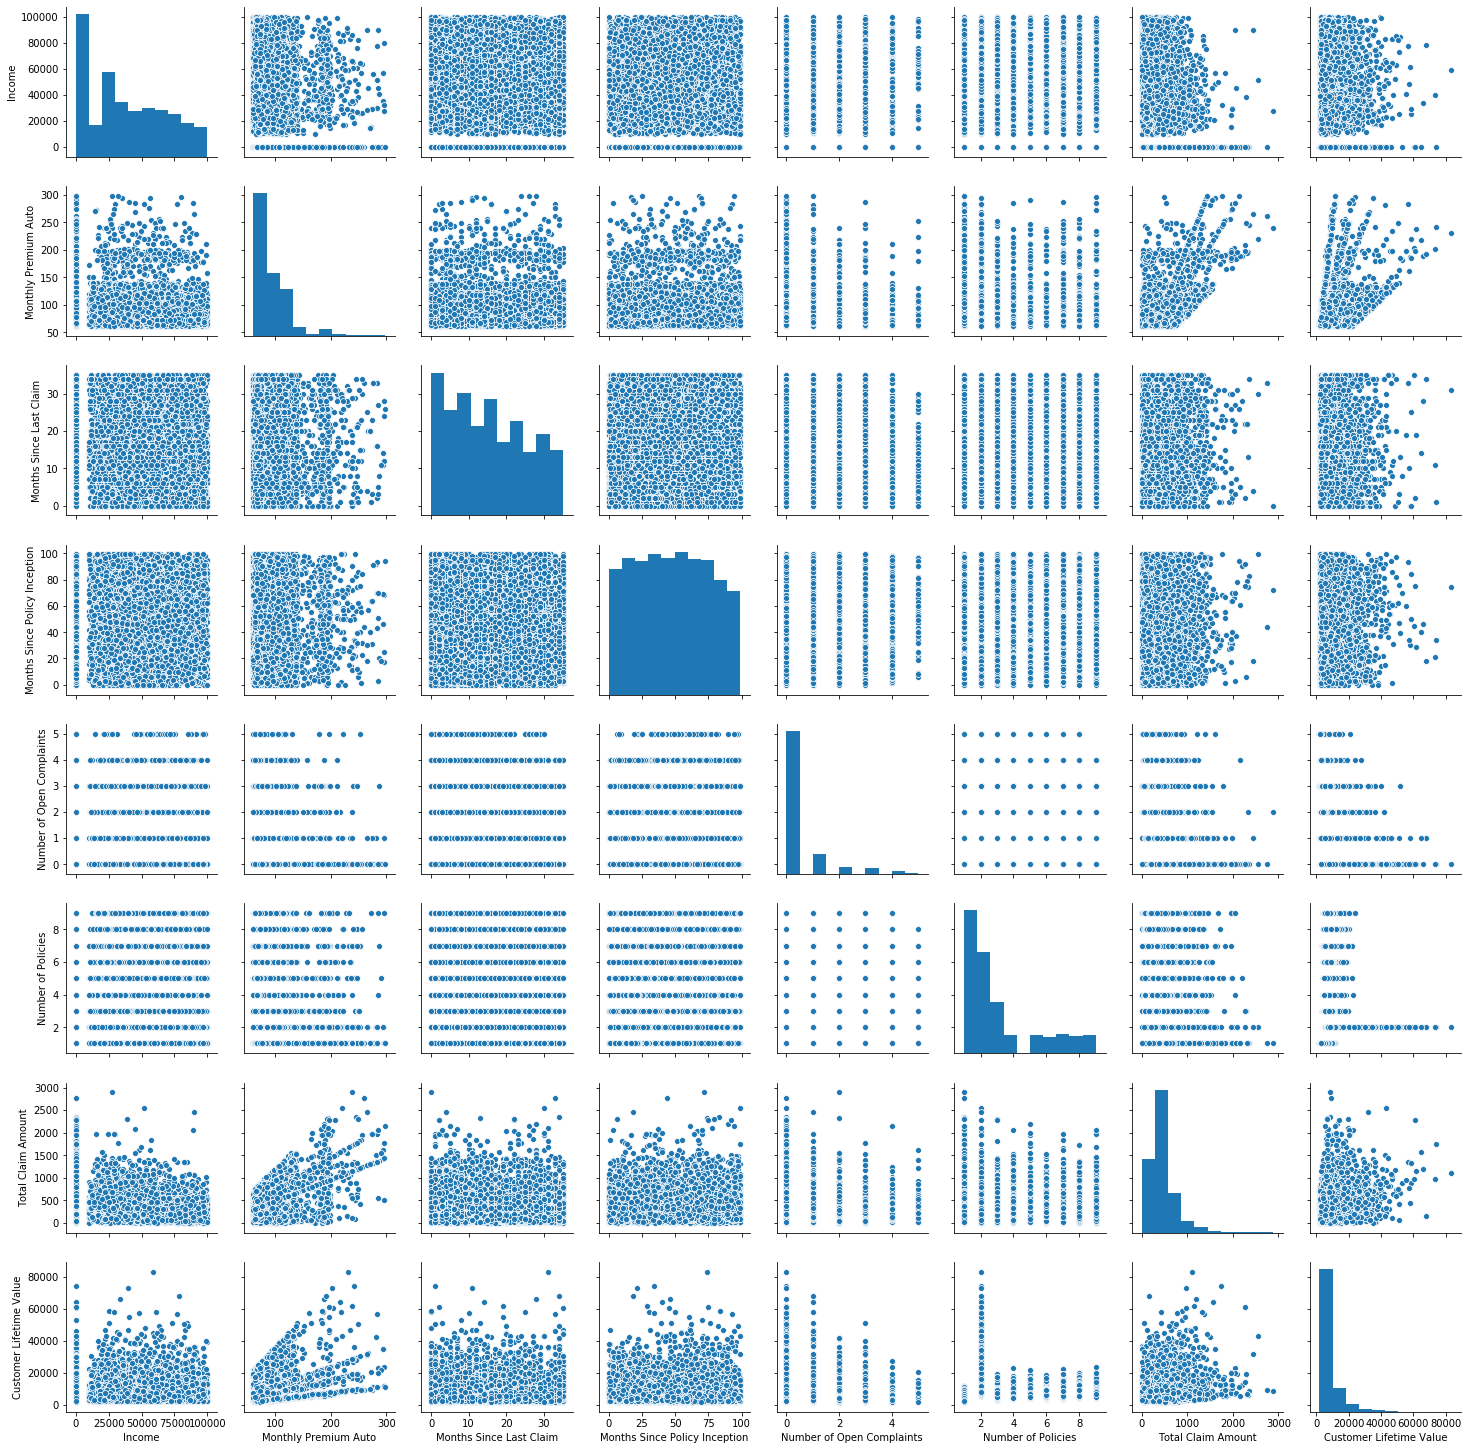

In [103]:
sns.pairplot(data=data)

In [128]:
import sweetviz as sw
report=sw.analyze(data,target_feat='Customer Lifetime Value')

                                             |                                             | [  0%]   00:00 ->…


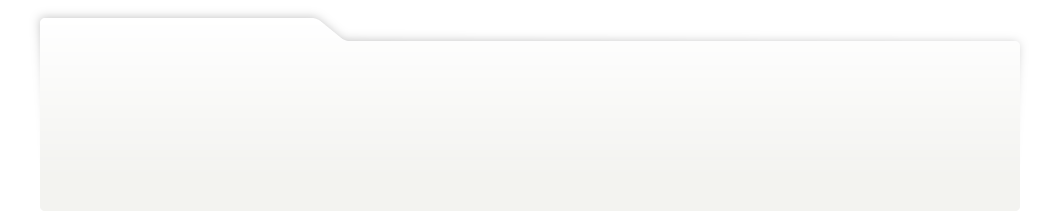
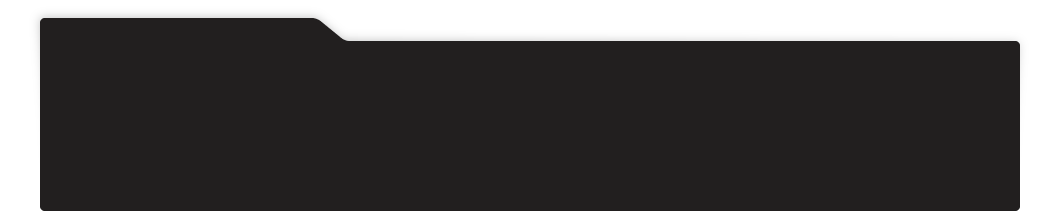
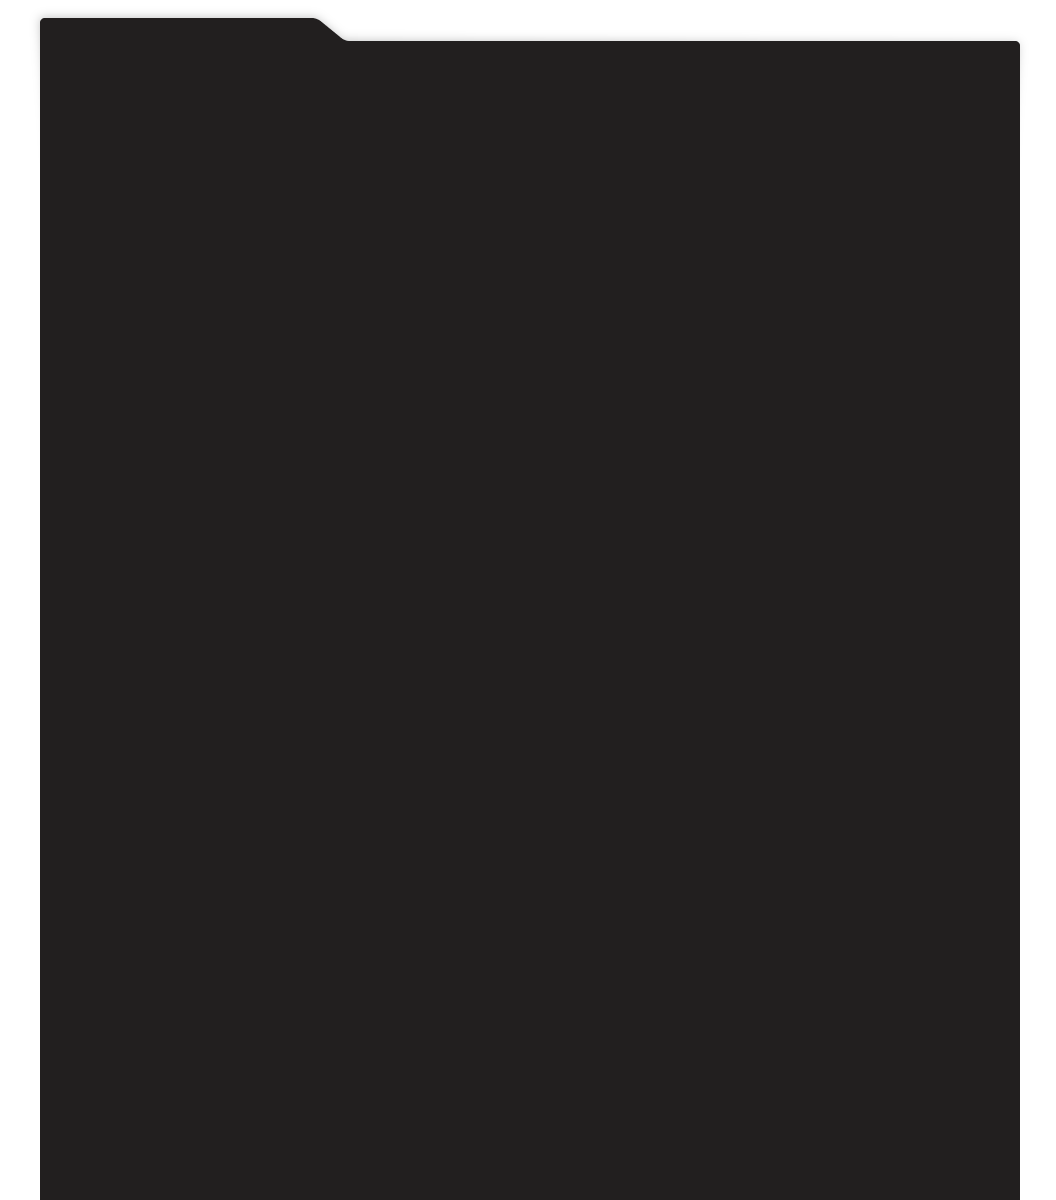
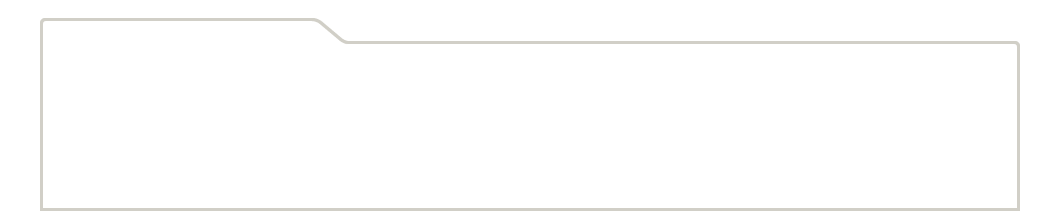
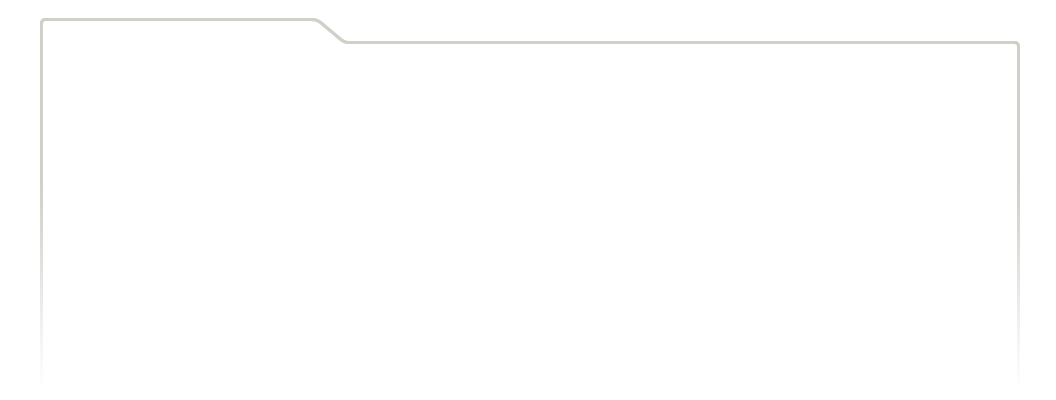
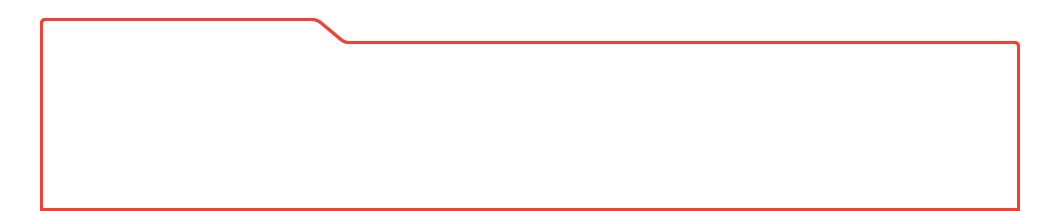
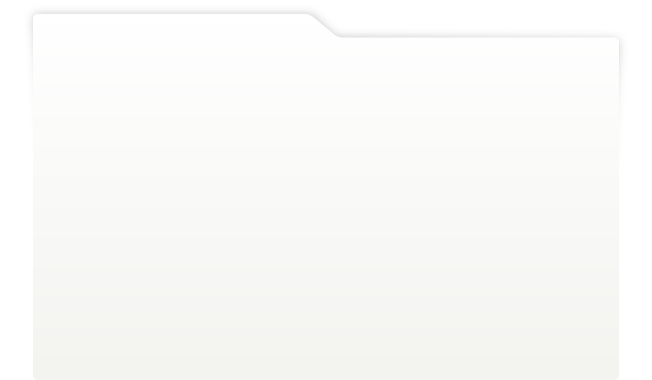
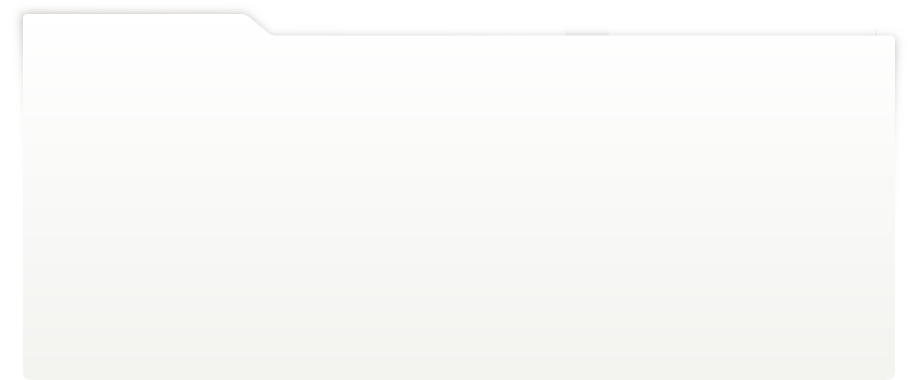
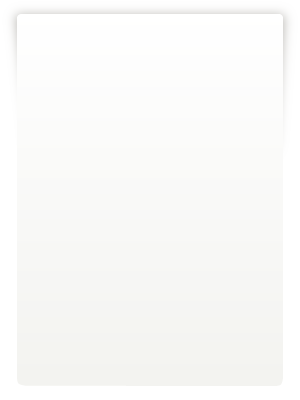
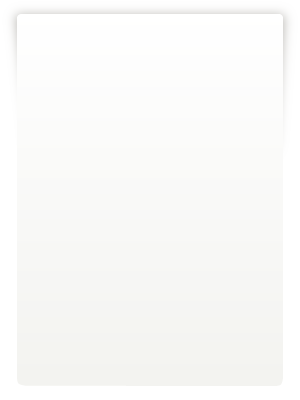
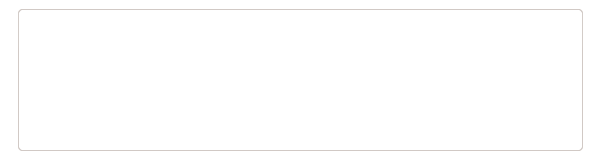
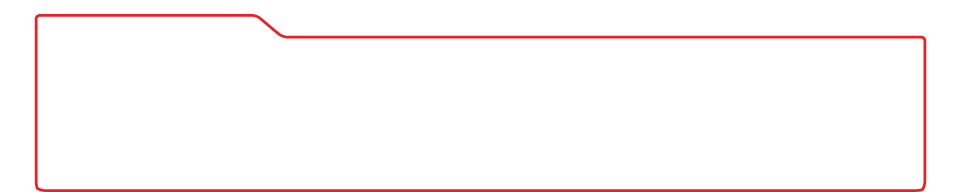
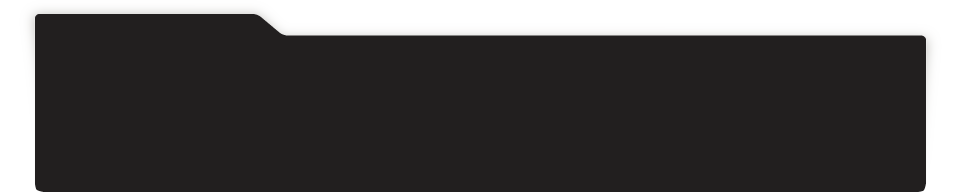
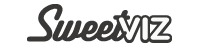
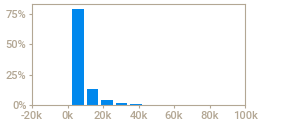
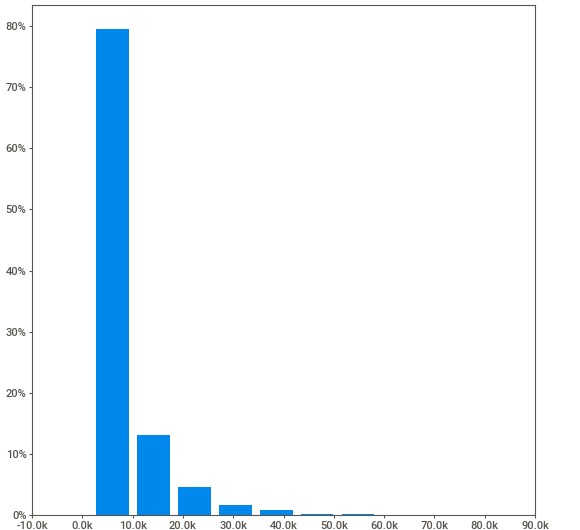
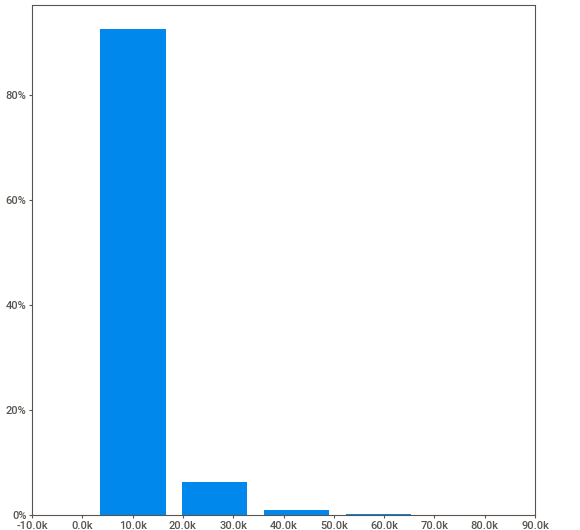
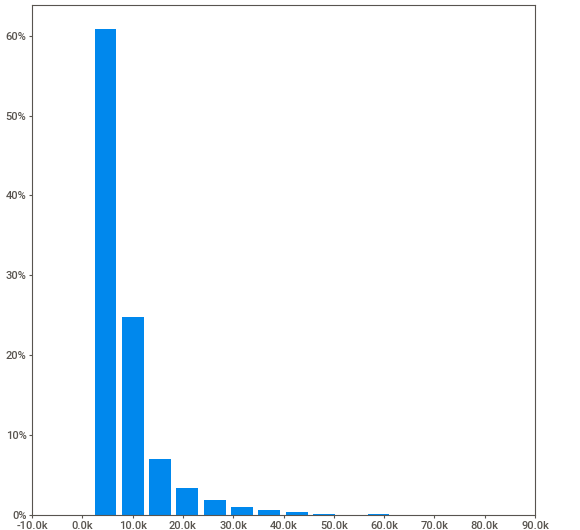
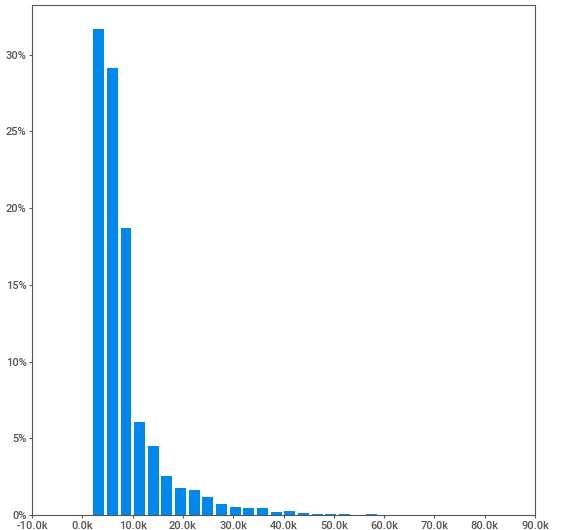
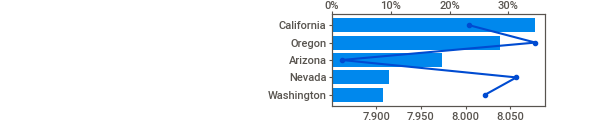
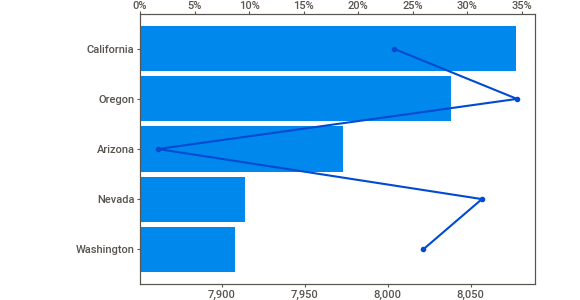
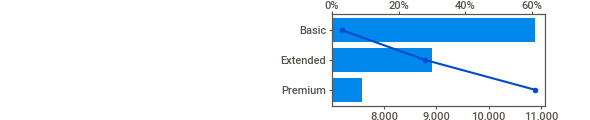
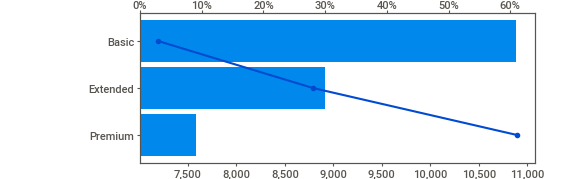
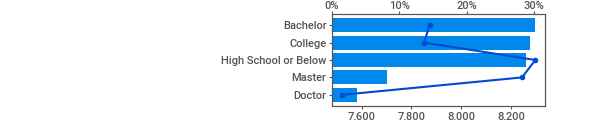
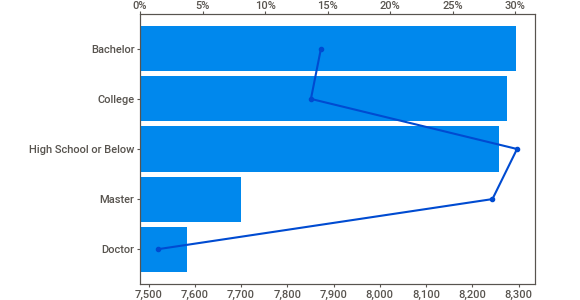
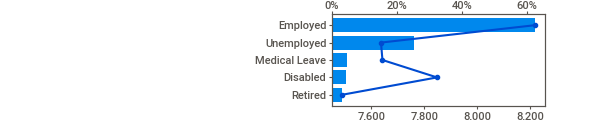
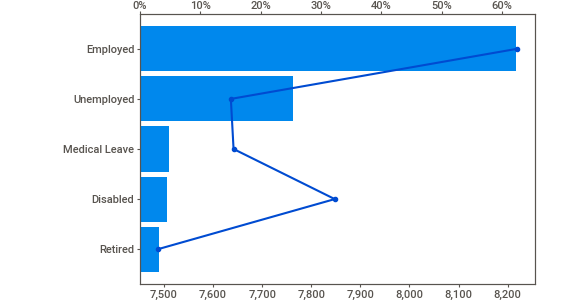
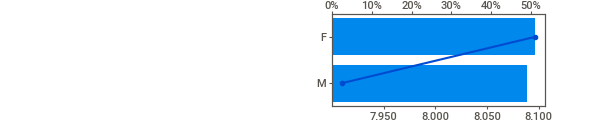
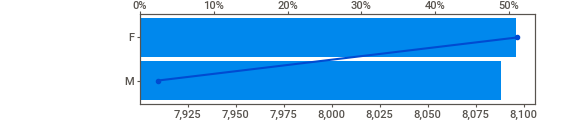
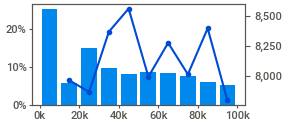
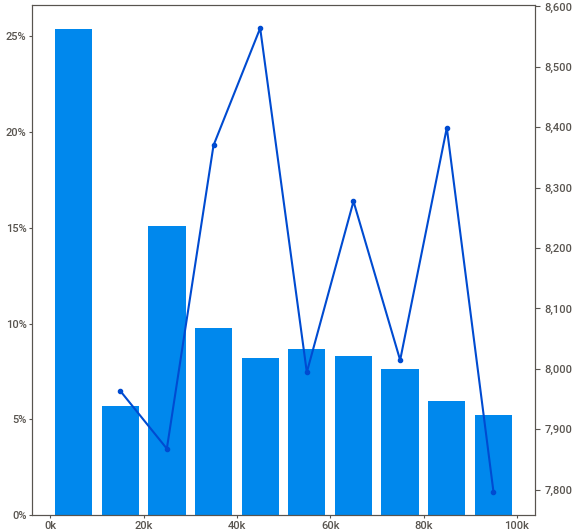
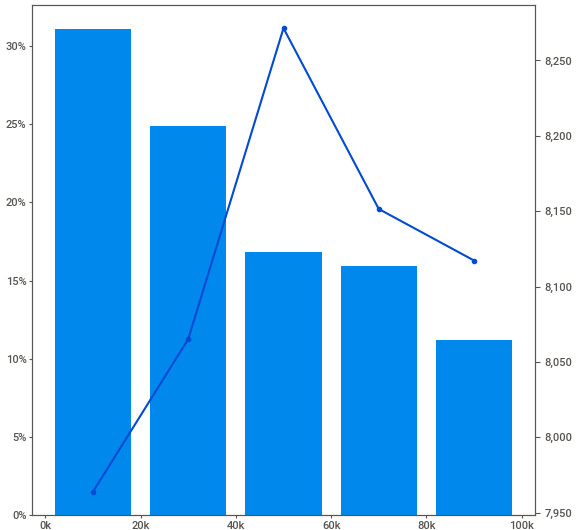
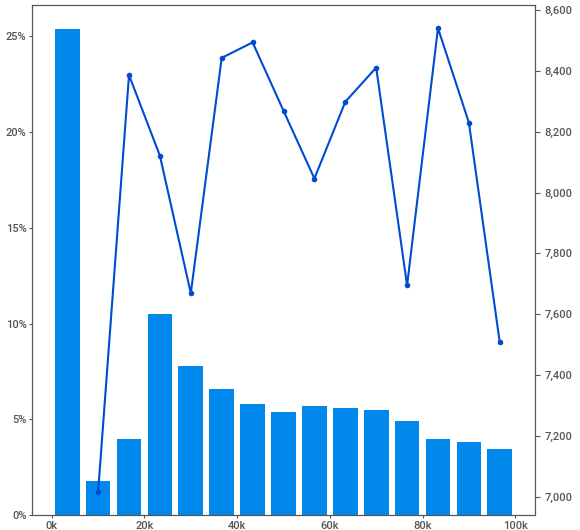
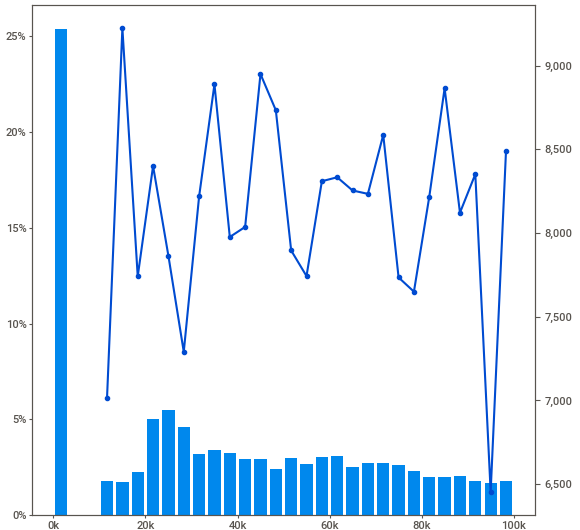
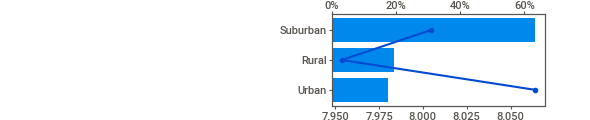
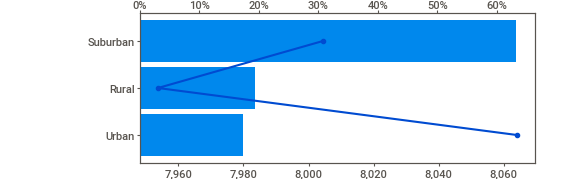
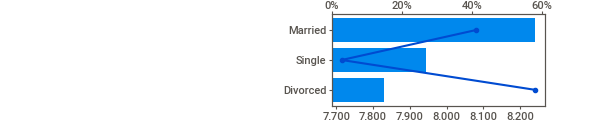
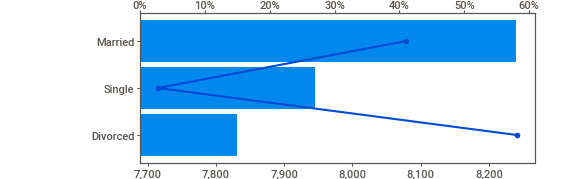
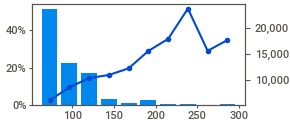
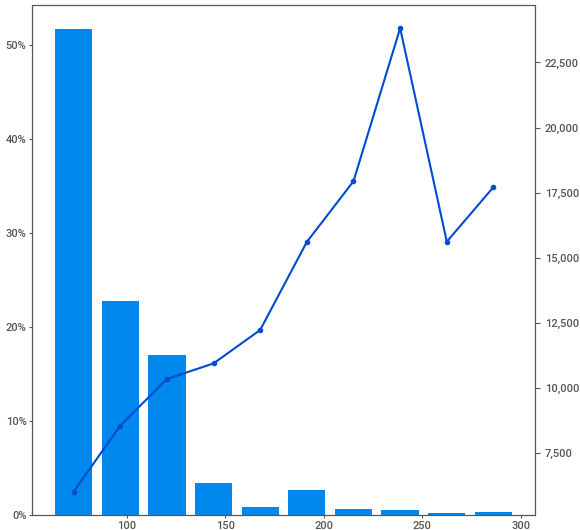
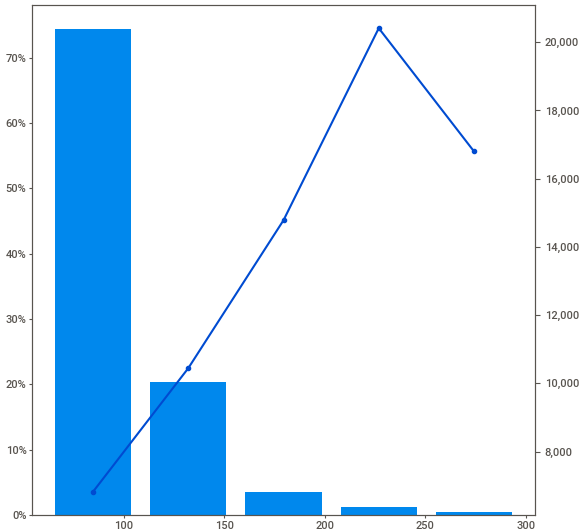
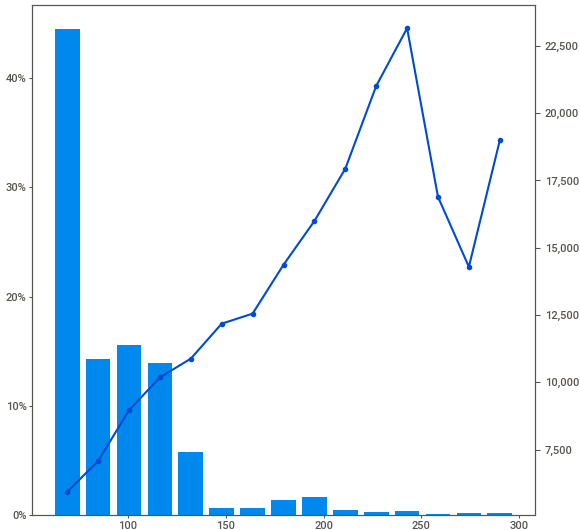
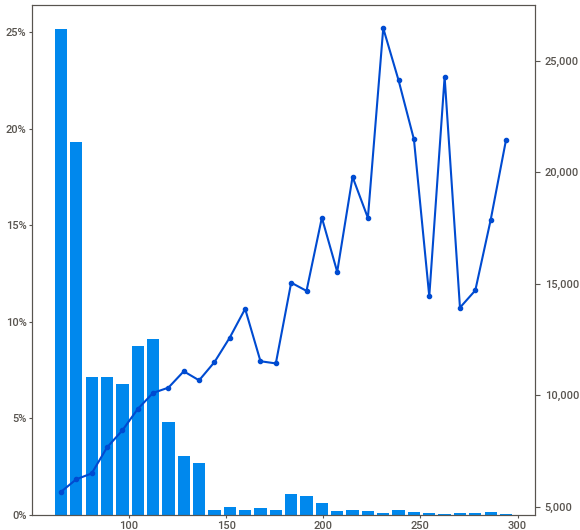
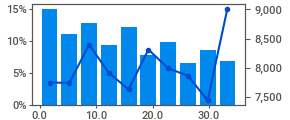
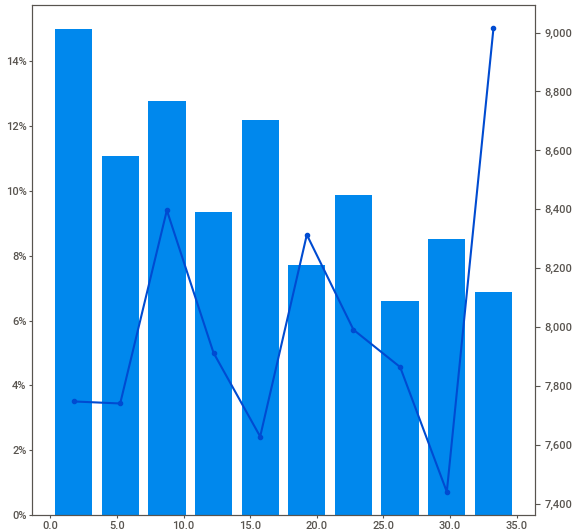
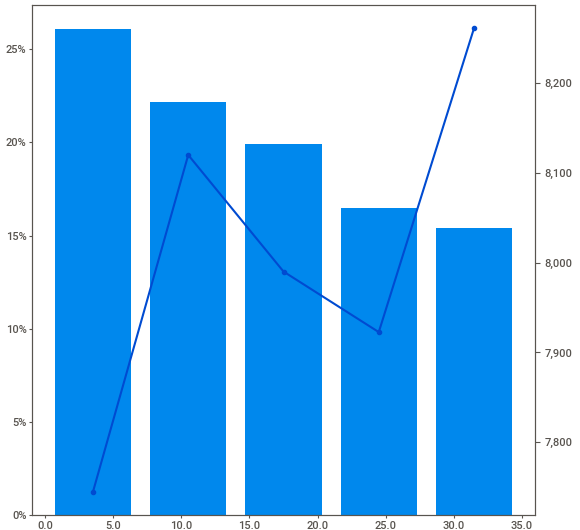
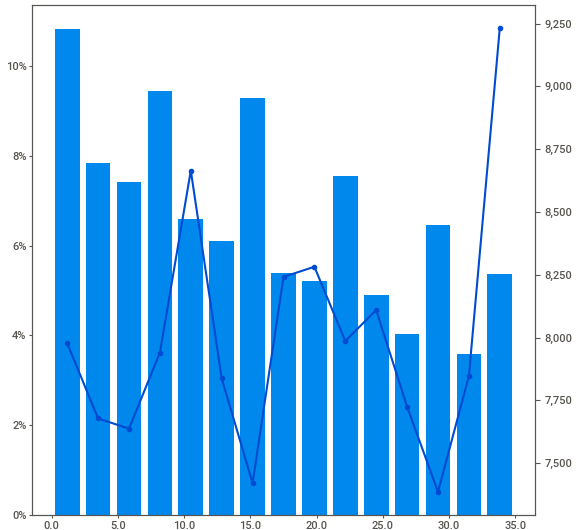
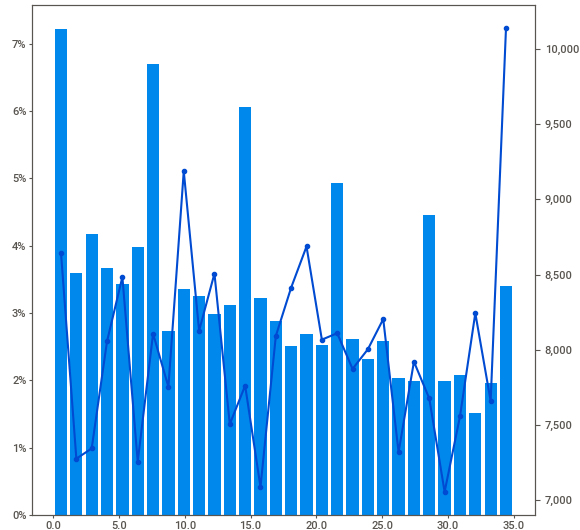
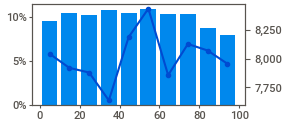
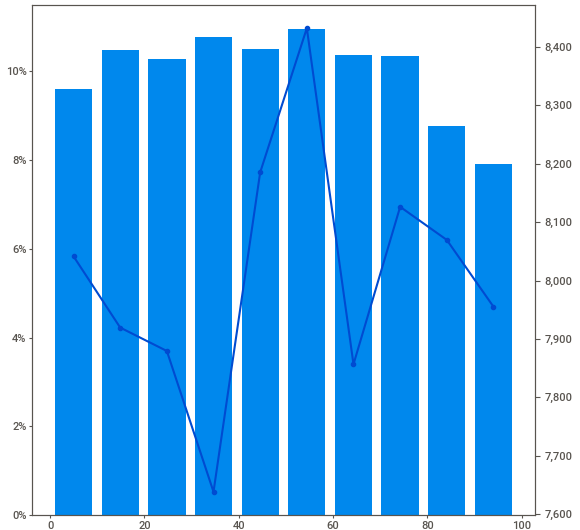
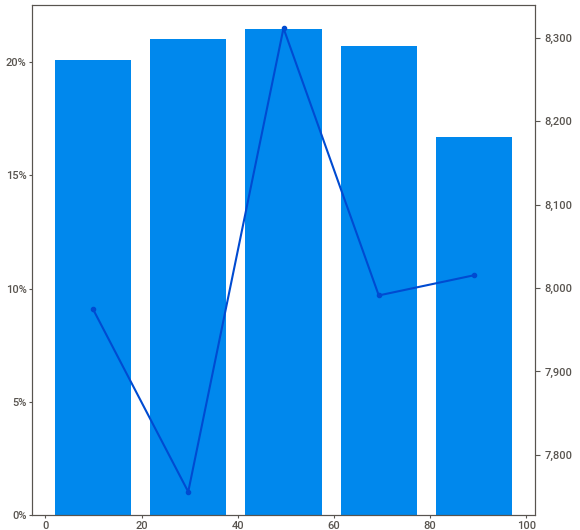
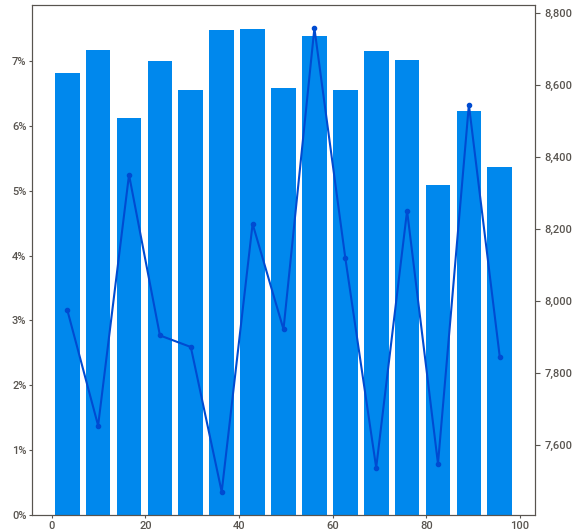
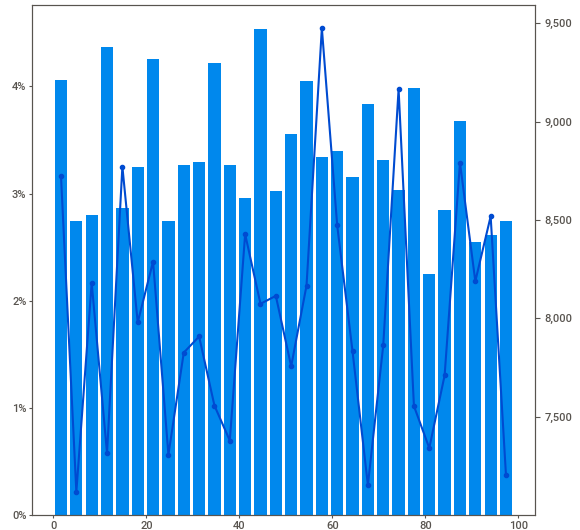
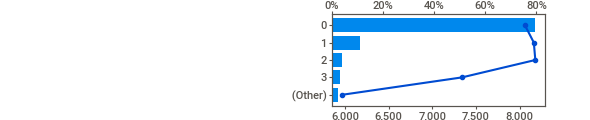
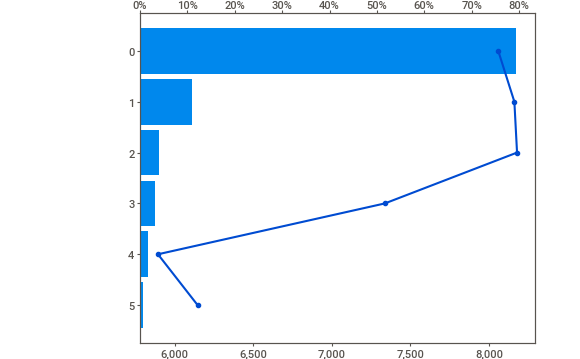
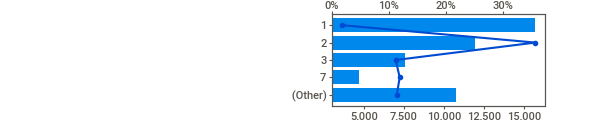
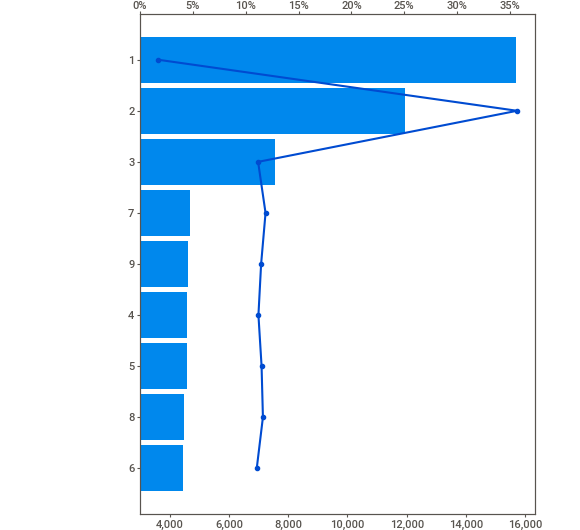
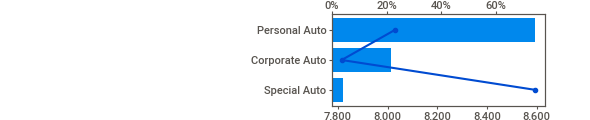
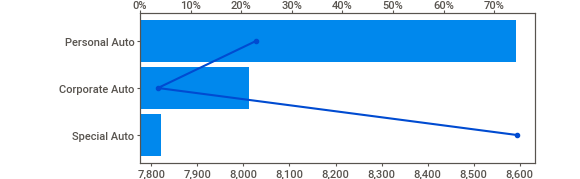
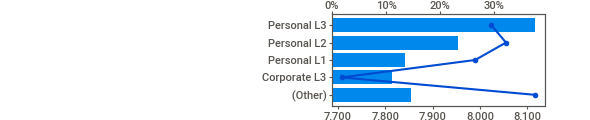
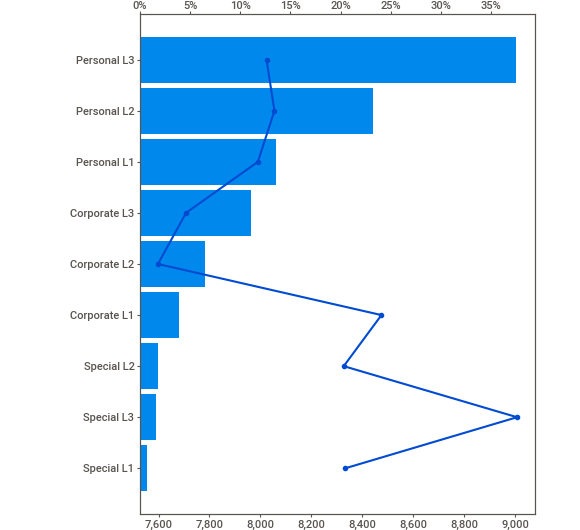
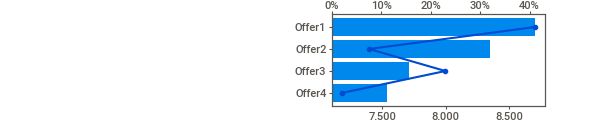
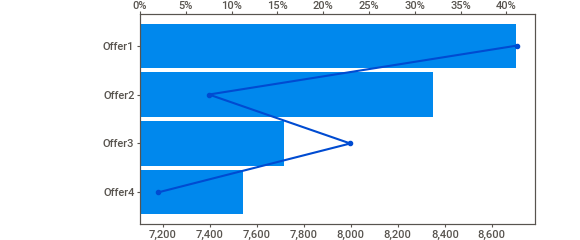
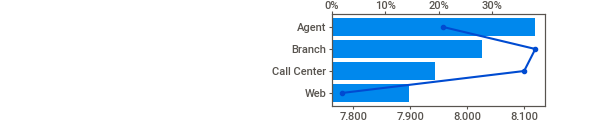
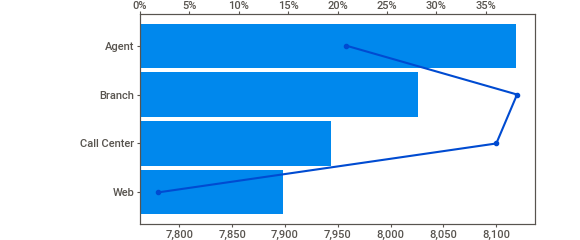
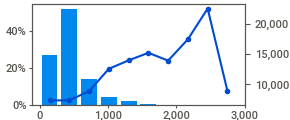
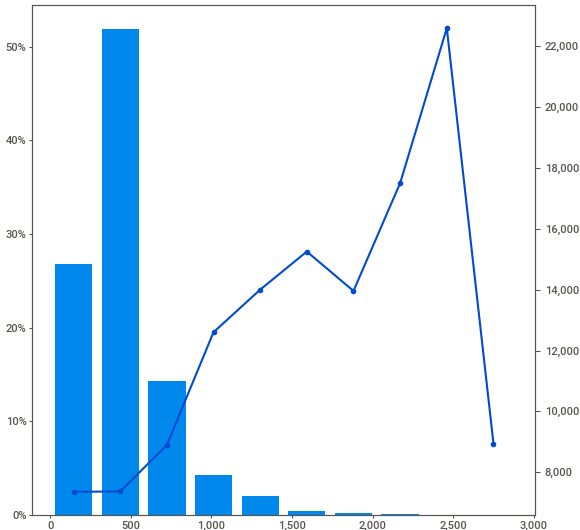
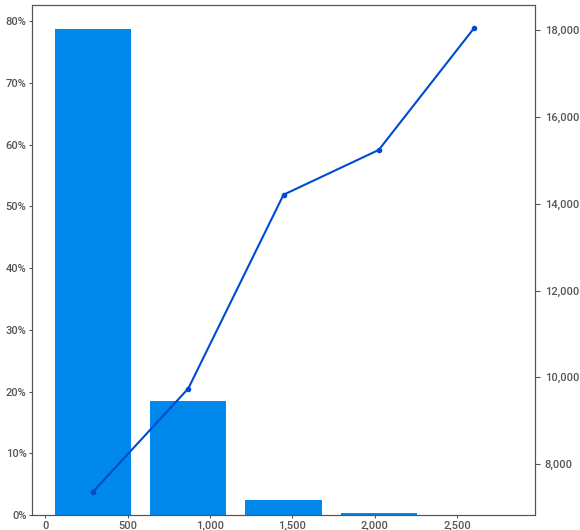
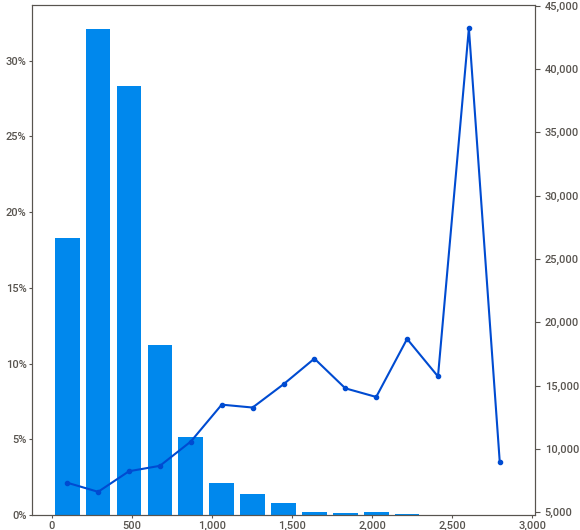
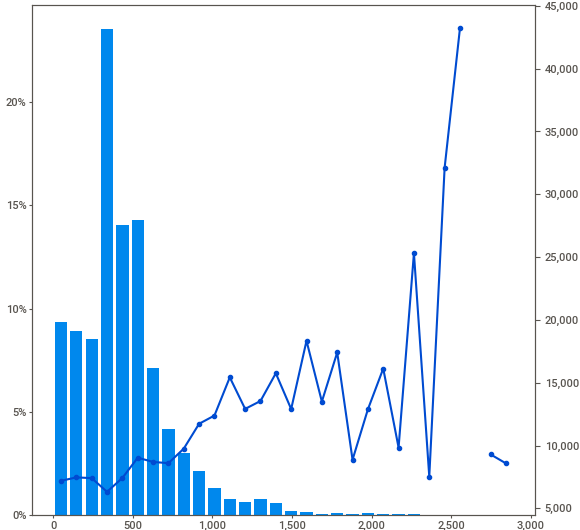
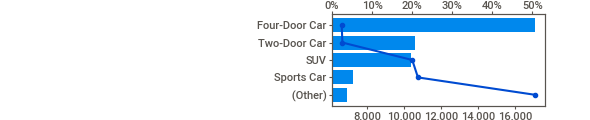
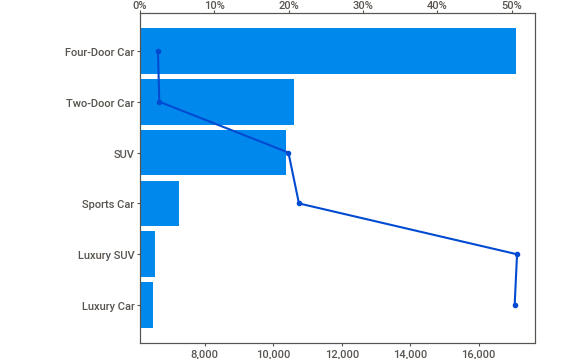
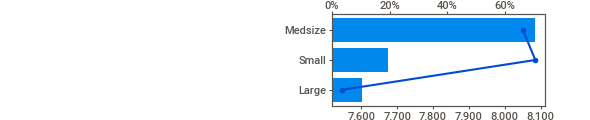
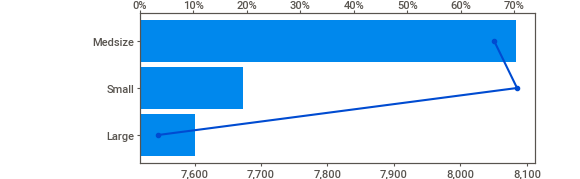
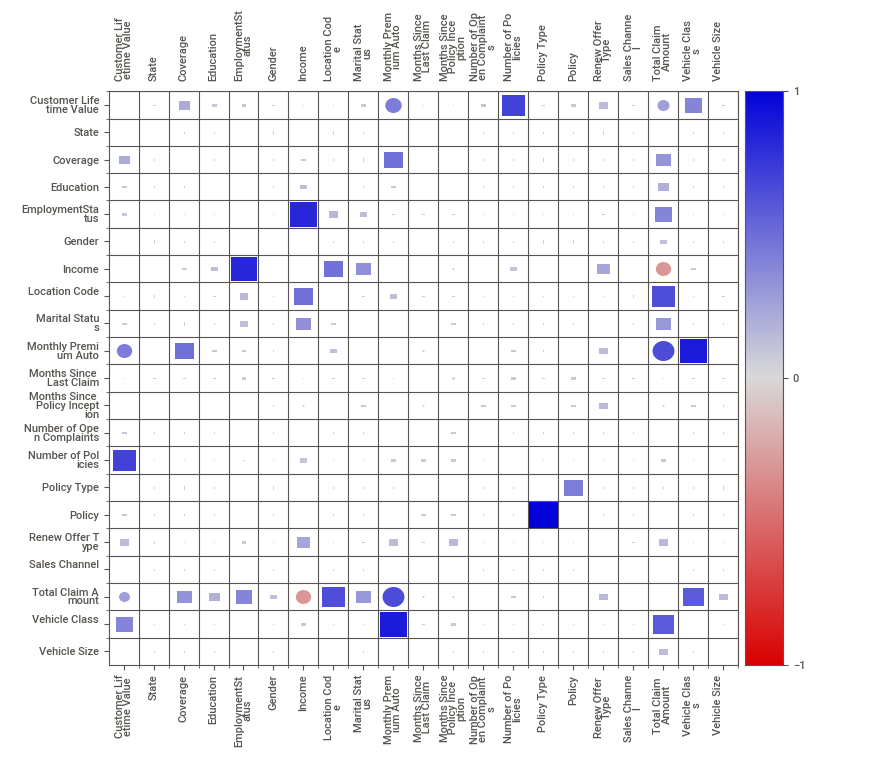
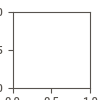

In [129]:
report.show_notebook()

# A detailed Report is generated above 

# 3.Feature Engineering

# 3.1 Ordinal Encoding on Education

In [132]:
data['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [133]:
mapping_education={'Bachelor':2, 'College':1, 'Master':3, 'High School or Below':0, 'Doctor':4}

In [134]:
data['Education']=data['Education'].map(mapping_education)

# 3.2 Ordinal Encoding on EmploymentStatus

In [137]:
data['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [138]:
mapping_Employment={'Employed':4, 'Unemployed':3, 'Medical Leave':2, 'Disabled':1, 'Retired':0}
data['EmploymentStatus']=data['EmploymentStatus'].map(mapping_Employment)

# 3.3 One hot encoding on the the remaining categorical values:-

In [159]:
data=pd.get_dummies(data,columns=['State','Coverage','Gender',
                                              'Location Code', 'Marital Status', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],drop_first=True)

In [164]:
data.head()

Education  EmploymentStatus  Income  Monthly Premium Auto  \
0          2                 4   56274                    69   
1          2                 3       0                    94   
2          2                 4   48767                   108   
3          2                 3       0                   106   
4          2                 4   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Total Claim Amount  Customer Lifetime Value  \
0                          0          384.811147              2763.519279   
1                          0         1131.464935              6979.535903   
2                          0          566.472247             12887.431650   
3                          0          529.881344              7645.861827   
4                          0          138.130879              2813.692575   

   State_California  ...  Sales Channel_Branch  Sales Channel_Call Center  \
0                 0  ...                     0                          0   
1                 0  ...                     0                          0   
2                 0  ...                     0                          0   
3                 1  ...                     0                          1   
4                 0  ...                     0                          0   

   Sales Channel_Web  Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  \
0                  0                         0                         0   
1                  0                         0                         0   
2                  0                         0                         0   
3                  0                         0                         0   
4                  0                         0                         0   

   Vehicle Class_SUV  Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  \
0                  0                         0                           1   
1                  0                         0                           0   
2                  0                         0                           1   
3                  1                         0                           0   
4                  0                         0                           0   

   Vehicle Size_Medsize  Vehicle Size_Small  
0                     1                   0  
1                     1                   0  
2                     1                   0  
3                     1                   0  
4                     1                   0  

[5 rows x 51 columns]

# 4. Metrics
Since it is a regression problem ,we will conside RMSE and r2 because:-
1.Since it has outliers we want to know how good our model is performing with outliers.
2.r2 score because we want to evaulate our model ion the basis on how good it is .

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 5.Modelling:-

# Approach 1

# Since our model has outliers let us go for Ensemble Techniques .Also using ensemble technqiues saves us from scaling the numerical features:-

In [167]:
from sklearn.model_selection import train_test_split
y=data['Customer Lifetime Value']
del data['Customer Lifetime Value']
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [168]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

7307 7307
1827 1827


# 5.1 Random Forest

# Hyperparameter Tuning using GridsearchCV

In [17]:
n_estimators=[120,300,500,800,1200]
max_depth=[5,8,15,25,30,None]
min_samples_split=[1,2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
max_features=[None,"sqrt","log2"]
max_leaf_nodes=[None,2,4,8]
ccp_alpha=[0.0,0.00001,0.0001]

In [18]:
parameters=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)

In [19]:
rf_model=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3)

In [20]:
crosscvrf=RandomizedSearchCV(estimator=rf_model,param_distributions=parameters,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [173]:
ccccccccccccccccccccccccccccccccccccccccccccccc

Fitting 8 folds for each of 10 candidates, totalling 80 fits


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [-5147.4711295  -5097.3852652  -4022.60543327 -6217.85876416
 -6343.70377246 -5790.48031611 -5107.62053215 -5370.69556373
 -4191.8009342             nan]
  category=UserWarning
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [-5088.50328335 -5054.52974407 -3748.46768476 -6225.8793028
 -6351.89678432 -5790.21564074 -5065.46861967 -5340.49626048
 -3808.25463023            nan]
  category=UserWarning
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300building tree 3 of 300building tree 4 of 300

building tree 5 of 300


building tree 6 of 300
building tree 7 of 300building tree 8 of 300

building tree 9 of 300
building tree 10 of 300building tree 11 of 300

building tree 12 of 300
building tree 13 of 300building tree 14 of 300

building tree 15 of 300building tree 16 of 300
building tree 17 of 300
building tree 18 of 300building tree 19 of 300


building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300building tree 25 of 300

building tree 26 of 300
building tree 27 of 300building tree 28 of 300

building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


building tree 35 of 300
building tree 36 of 300building tree 37 of 300

building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300building tree 43 of 300

building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300building tree 53 of 300

building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300building tree 58 of 300

building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.6s



building tree 160 of 300

building tree 161 of 300
building tree 162 of 300building tree 163 of 300

building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300building tree 182 of 300

building tree 183 of 300
building tree 184 of 300building tree 185 of 300building tree 186 of 300


building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300building tree 197 of 300

building tree 198 of 300
building tree 199 of 30

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.4s finished


In [174]:
random_forest_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 5,
 'ccp_alpha': 0.0001}

# Fitting the model with the best found parameters:-

In [175]:
rf_model=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,n_estimators=300,
 min_samples_split= 2,
 min_samples_leaf=5,
 max_leaf_nodes=None,
 max_features=None,
 max_depth=5,
 ccp_alpha=0.0001)

In [176]:
RF_Final_Model=rf_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300building tree 5 of 300

building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300building tree 22 of 300

building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300building tree 33 of 300

building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.3s


building tree 154 of 300
building tree 155 of 300building tree 156 of 300
building tree 157 of 300

building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300building tree 162 of 300

building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300building tree 171 of 300

building tree 172 of 300
building tree 173 of 300building tree 174 of 300
building tree 175 of 300

building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300building tree 180 of 300

building tree 181 of 300building tree 182 of 300

building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


# Evaluating the scores:-

# Train Scores:-

In [177]:
predicted_train_rf=RF_Final_Model.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [178]:
r2_score(y_train,predicted_train_rf)

0.692315671482591

In [179]:
mean_squared_error(y_train,predicted_train_rf,squared=False)

3767.0355926194648

In [ ]:
# Test Scores:-

In [180]:
predicted_test_rf=RF_Final_Model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [181]:
r2_score(y_test,predicted_test_rf)

0.6377621388165422

In [182]:
mean_squared_error(y_test,predicted_test_rf,squared=False)

4320.687805150091

# 5.2 XGBOOST

In [184]:
from xgboost import XGBRegressor
eta=[0.01,0.015,0.025,0.05,0.1]
max_depth=[3,5,8,10,15,20,25]
min_child_weight=[1,3,5,7]
gamma =[0.0001,0.01,0.1,0.5,0.7,0.9,1.0]
scale_pos_weight=[0.1,0.5,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate =[0.0001,0.00001,0.01,1]
subsample=[0.6,0.7,0.8,0.9,1.0]


In [185]:
parameters=dict(eta=eta,max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,scale_pos_weight=scale_pos_weight,reg_alpha=reg_alpha,learning_rate=learning_rate,subsample=subsample)

In [186]:
XGB_Model=XGBRegressor(booster='gbtree',verbosity =3,tree_method='gpu_hist')

In [187]:
crosscvXGB=RandomizedSearchCV(estimator=XGB_Model,param_distributions=parameters,scoring='neg_root_mean_squared_error',cv=8,verbose=3,return_train_score=True,n_iter=10)

In [188]:
XGB_train_model=crosscvXGB.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[20:58:26] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[20:58:27] ======== Monitor: SketchContainer ========
[20:58:27] MakeCuts: 0.00203s, 1 calls @ 2030us

[20:58:27] Prune: 0.001068s, 1 calls @ 1068us

[20:58:27] Push: 0.000112s, 1 calls @ 112us

[20:58:27] Unique: 0.00117s, 2 calls @ 1170us

[20:58:27] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[20:58:27] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[20:58:37] ======== Monitor: Learner ========
[20:58:37] Configure: 0s, 1 calls @ 0us

[20:58:37] GetGradient: 0.008991s, 100 calls @ 8991us

[20:58:37] PredictRaw: 0.988256s, 100 calls @ 988256us

[20:58:37] UpdateOneIter: 9.76435s, 100 calls @ 9764352us

[20:58:37] ======== Monitor: GBTree ========
[20:58:37] BoostNewTrees: 9.41866s, 100 calls @ 9418658us

[20:58:37] CommitModel: 0.380484s, 100 ca

[20:59:04] ======== Monitor: Learner ========
[20:59:04] Configure: 0.000446s, 1 calls @ 446us

[20:59:04] GetGradient: 0.007025s, 100 calls @ 7025us

[20:59:04] PredictRaw: 0.000634s, 100 calls @ 634us

[20:59:04] UpdateOneIter: 8.62775s, 100 calls @ 8627752us

[20:59:04] ======== Monitor: GBTree ========
[20:59:04] BoostNewTrees: 8.2473s, 100 calls @ 8247304us

[20:59:04] CommitModel: 0.370379s, 100 calls @ 370379us

[20:59:04] ======== Device 0 Memory Allocations:  ========
[20:59:04] Peak memory usage: 43MiB
[20:59:04] Number of allocations: 1161218
[20:59:04] ======== Monitor: updater_gpu_hist ========
[20:59:04] InitData: 0.010031s, 100 calls @ 10031us

[20:59:04] InitDataOnce: 0.010017s, 1 calls @ 10017us

[20:59:04] Update: 8.24649s, 100 calls @ 8246494us

[20:59:04] UpdatePredictionCache: 0.370265s, 100 calls @ 370265us

[20:59:04] ======== Monitor: gradient_based_sampler ========
[20:59:04] Sample: 0.004113s, 100 calls @ 4113us

[20:59:04] ======== Monitor: GPUHistMakerDevice

[20:59:33] ======== Monitor: Learner ========
[20:59:33] Configure: 0.000602s, 1 calls @ 602us

[20:59:33] GetGradient: 0.008338s, 100 calls @ 8338us

[20:59:33] PredictRaw: 0.000758s, 100 calls @ 758us

[20:59:33] UpdateOneIter: 9.66614s, 100 calls @ 9666138us

[20:59:33] ======== Monitor: GBTree ========
[20:59:33] BoostNewTrees: 9.25516s, 100 calls @ 9255163us

[20:59:33] CommitModel: 0.399021s, 100 calls @ 399021us

[20:59:33] ======== Device 0 Memory Allocations:  ========
[20:59:33] Peak memory usage: 43MiB
[20:59:33] Number of allocations: 2070981
[20:59:33] ======== Monitor: updater_gpu_hist ========
[20:59:33] InitData: 0.010708s, 100 calls @ 10708us

[20:59:33] InitDataOnce: 0.01069s, 1 calls @ 10690us

[20:59:33] Update: 9.25419s, 100 calls @ 9254188us

[20:59:33] UpdatePredictionCache: 0.398869s, 100 calls @ 398869us

[20:59:33] ======== Monitor: gradient_based_sampler ========
[20:59:33] Sample: 0.005948s, 100 calls @ 5948us

[20:59:33] ======== Monitor: GPUHistMakerDevice

[20:59:49] ======== Monitor: Learner ========
[20:59:49] Configure: 0.000875s, 1 calls @ 875us

[20:59:49] GetGradient: 0.011906s, 100 calls @ 11906us

[20:59:49] PredictRaw: 0.001216s, 100 calls @ 1216us

[20:59:49] UpdateOneIter: 3.51494s, 100 calls @ 3514943us

[20:59:49] ======== Monitor: GBTree ========
[20:59:49] BoostNewTrees: 3.46651s, 100 calls @ 3466505us

[20:59:49] CommitModel: 0.031119s, 100 calls @ 31119us

[20:59:49] ======== Device 0 Memory Allocations:  ========
[20:59:49] Peak memory usage: 43MiB
[20:59:49] Number of allocations: 2553321
[20:59:49] ======== Monitor: updater_gpu_hist ========
[20:59:49] InitData: 0.007014s, 100 calls @ 7014us

[20:59:49] InitDataOnce: 0.006995s, 1 calls @ 6995us

[20:59:49] Update: 3.46528s, 100 calls @ 3465284us

[20:59:49] UpdatePredictionCache: 0.030899s, 100 calls @ 30899us

[20:59:49] ======== Monitor: gradient_based_sampler ========
[20:59:49] Sample: 0.006206s, 100 calls @ 6206us

[20:59:49] ======== Monitor: GPUHistMakerDevice0

[20:59:58] ======== Monitor: Learner ========
[20:59:58] Configure: 0.0005s, 1 calls @ 500us

[20:59:58] GetGradient: 0.007704s, 100 calls @ 7704us

[20:59:58] PredictRaw: 0.000619s, 100 calls @ 619us

[20:59:58] UpdateOneIter: 3.14295s, 100 calls @ 3142949us

[20:59:58] ======== Monitor: GBTree ========
[20:59:58] BoostNewTrees: 3.10915s, 100 calls @ 3109153us

[20:59:58] CommitModel: 0.022593s, 100 calls @ 22593us

[20:59:58] ======== Device 0 Memory Allocations:  ========
[20:59:58] Peak memory usage: 43MiB
[20:59:58] Number of allocations: 2840685
[20:59:58] ======== Monitor: updater_gpu_hist ========
[20:59:58] InitData: 0.00625s, 100 calls @ 6250us

[20:59:58] InitDataOnce: 0.006235s, 1 calls @ 6235us

[20:59:58] Update: 3.10821s, 100 calls @ 3108206us

[20:59:58] UpdatePredictionCache: 0.022433s, 100 calls @ 22433us

[20:59:58] ======== Monitor: gradient_based_sampler ========
[20:59:58] Sample: 0.003497s, 100 calls @ 3497us

[20:59:58] ======== Monitor: GPUHistMakerDevice0 ====

[21:00:08] ======== Monitor: Learner ========
[21:00:08] Configure: 0.000497s, 1 calls @ 497us

[21:00:08] GetGradient: 0.008692s, 100 calls @ 8692us

[21:00:08] PredictRaw: 0.00065s, 100 calls @ 650us

[21:00:08] UpdateOneIter: 3.2134s, 100 calls @ 3213405us

[21:00:08] ======== Monitor: GBTree ========
[21:00:08] BoostNewTrees: 3.17948s, 100 calls @ 3179484us

[21:00:08] CommitModel: 0.021709s, 100 calls @ 21709us

[21:00:08] ======== Device 0 Memory Allocations:  ========
[21:00:08] Peak memory usage: 43MiB
[21:00:08] Number of allocations: 3129437
[21:00:08] ======== Monitor: updater_gpu_hist ========
[21:00:08] InitData: 0.00664s, 100 calls @ 6640us

[21:00:08] InitDataOnce: 0.006627s, 1 calls @ 6627us

[21:00:08] Update: 3.17855s, 100 calls @ 3178552us

[21:00:08] UpdatePredictionCache: 0.021592s, 100 calls @ 21592us

[21:00:08] ======== Monitor: gradient_based_sampler ========
[21:00:08] Sample: 0.003999s, 100 calls @ 3999us

[21:00:08] ======== Monitor: GPUHistMakerDevice0 ====

[21:01:20] ======== Monitor: Learner ========
[21:01:20] Configure: 0.000758s, 1 calls @ 758us

[21:01:20] GetGradient: 0.01143s, 100 calls @ 11430us

[21:01:20] PredictRaw: 0.000846s, 100 calls @ 846us

[21:01:20] UpdateOneIter: 24.3079s, 100 calls @ 24307908us

[21:01:20] ======== Monitor: GBTree ========
[21:01:20] BoostNewTrees: 10.983s, 100 calls @ 10982965us

[21:01:20] CommitModel: 13.3093s, 100 calls @ 13309327us

[21:01:20] ======== Device 0 Memory Allocations:  ========
[21:01:20] Peak memory usage: 519MiB
[21:01:20] Number of allocations: 3453821
[21:01:20] ======== Monitor: updater_gpu_hist ========
[21:01:20] InitData: 0.157595s, 100 calls @ 157595us

[21:01:20] InitDataOnce: 0.157575s, 1 calls @ 157575us

[21:01:20] Update: 10.9819s, 100 calls @ 10981926us

[21:01:20] UpdatePredictionCache: 13.3091s, 100 calls @ 13309132us

[21:01:20] ======== Monitor: gradient_based_sampler ========
[21:01:20] Sample: 0.01727s, 100 calls @ 17270us

[21:01:20] ======== Monitor: GPUHistMak

[21:02:28] ======== Monitor: Learner ========
[21:02:28] Configure: 0.000626s, 1 calls @ 626us

[21:02:28] GetGradient: 0.010076s, 100 calls @ 10076us

[21:02:28] PredictRaw: 0.00082s, 100 calls @ 820us

[21:02:28] UpdateOneIter: 21.976s, 100 calls @ 21976038us

[21:02:28] ======== Monitor: GBTree ========
[21:02:28] BoostNewTrees: 9.92309s, 100 calls @ 9923088us

[21:02:28] CommitModel: 12.0391s, 100 calls @ 12039141us

[21:02:28] ======== Device 0 Memory Allocations:  ========
[21:02:28] Peak memory usage: 519MiB
[21:02:28] Number of allocations: 3778861
[21:02:28] ======== Monitor: updater_gpu_hist ========
[21:02:28] InitData: 0.149363s, 100 calls @ 149363us

[21:02:28] InitDataOnce: 0.149348s, 1 calls @ 149348us

[21:02:28] Update: 9.92214s, 100 calls @ 9922138us

[21:02:28] UpdatePredictionCache: 12.039s, 100 calls @ 12038983us

[21:02:28] ======== Monitor: gradient_based_sampler ========
[21:02:28] Sample: 0.013129s, 100 calls @ 13129us

[21:02:28] ======== Monitor: GPUHistMaker

[21:03:12] ======== Monitor: Learner ========
[21:03:12] Configure: 0.000596s, 1 calls @ 596us

[21:03:12] GetGradient: 0.00623s, 100 calls @ 6230us

[21:03:12] PredictRaw: 0.000461s, 100 calls @ 461us

[21:03:12] UpdateOneIter: 0.171292s, 100 calls @ 171292us

[21:03:12] ======== Monitor: GBTree ========
[21:03:12] BoostNewTrees: 0.156287s, 100 calls @ 156287us

[21:03:12] CommitModel: 0.006425s, 100 calls @ 6425us

[21:03:12] ======== Device 0 Memory Allocations:  ========
[21:03:12] Peak memory usage: 519MiB
[21:03:12] Number of allocations: 3999065
[21:03:12] ======== Monitor: updater_gpu_hist ========
[21:03:12] InitData: 0.008163s, 100 calls @ 8163us

[21:03:12] InitDataOnce: 0.00815s, 1 calls @ 8150us

[21:03:12] Update: 0.155608s, 100 calls @ 155608us

[21:03:12] UpdatePredictionCache: 0.006353s, 100 calls @ 6353us

[21:03:12] ======== Monitor: gradient_based_sampler ========
[21:03:12] Sample: 0.002821s, 100 calls @ 2821us

[21:03:12] ======== Monitor: GPUHistMakerDevice0 ====

[21:03:13] ======== Monitor: Learner ========
[21:03:13] Configure: 0.000507s, 1 calls @ 507us

[21:03:13] GetGradient: 0.006449s, 100 calls @ 6449us

[21:03:13] PredictRaw: 0.000416s, 100 calls @ 416us

[21:03:13] UpdateOneIter: 0.17406s, 100 calls @ 174060us

[21:03:13] ======== Monitor: GBTree ========
[21:03:13] BoostNewTrees: 0.158747s, 100 calls @ 158747us

[21:03:13] CommitModel: 0.00662s, 100 calls @ 6620us

[21:03:13] ======== Device 0 Memory Allocations:  ========
[21:03:13] Peak memory usage: 519MiB
[21:03:13] Number of allocations: 4008485
[21:03:13] ======== Monitor: updater_gpu_hist ========
[21:03:13] InitData: 0.007729s, 100 calls @ 7729us

[21:03:13] InitDataOnce: 0.007717s, 1 calls @ 7717us

[21:03:13] Update: 0.158049s, 100 calls @ 158049us

[21:03:13] UpdatePredictionCache: 0.006549s, 100 calls @ 6549us

[21:03:13] ======== Monitor: gradient_based_sampler ========
[21:03:13] Sample: 0.002935s, 100 calls @ 2935us

[21:03:13] ======== Monitor: GPUHistMakerDevice0 ====

[21:03:13] ======== Monitor: Learner ========
[21:03:13] Configure: 0.000536s, 1 calls @ 536us

[21:03:13] GetGradient: 0.006165s, 100 calls @ 6165us

[21:03:13] PredictRaw: 0.000457s, 100 calls @ 457us

[21:03:13] UpdateOneIter: 0.165902s, 100 calls @ 165902us

[21:03:13] ======== Monitor: GBTree ========
[21:03:13] BoostNewTrees: 0.151381s, 100 calls @ 151381us

[21:03:13] CommitModel: 0.006152s, 100 calls @ 6152us

[21:03:13] ======== Device 0 Memory Allocations:  ========
[21:03:13] Peak memory usage: 519MiB
[21:03:13] Number of allocations: 4017905
[21:03:13] ======== Monitor: updater_gpu_hist ========
[21:03:13] InitData: 0.005959s, 100 calls @ 5959us

[21:03:13] InitDataOnce: 0.005948s, 1 calls @ 5948us

[21:03:13] Update: 0.150732s, 100 calls @ 150732us

[21:03:13] UpdatePredictionCache: 0.006085s, 100 calls @ 6085us

[21:03:13] ======== Monitor: gradient_based_sampler ========
[21:03:13] Sample: 0.002618s, 100 calls @ 2618us

[21:03:13] ======== Monitor: GPUHistMakerDevice0 ==

[21:03:14] ======== Monitor: Learner ========
[21:03:14] Configure: 0.002518s, 1 calls @ 2518us

[21:03:14] GetGradient: 0.006377s, 100 calls @ 6377us

[21:03:14] PredictRaw: 0.000427s, 100 calls @ 427us

[21:03:14] UpdateOneIter: 0.423511s, 100 calls @ 423511us

[21:03:14] ======== Monitor: GBTree ========
[21:03:14] BoostNewTrees: 0.406119s, 100 calls @ 406119us

[21:03:14] CommitModel: 0.006768s, 100 calls @ 6768us

[21:03:14] ======== Device 0 Memory Allocations:  ========
[21:03:14] Peak memory usage: 519MiB
[21:03:14] Number of allocations: 4044059
[21:03:14] ======== Monitor: updater_gpu_hist ========
[21:03:14] InitData: 0.0061s, 100 calls @ 6100us

[21:03:14] InitDataOnce: 0.006087s, 1 calls @ 6087us

[21:03:14] Update: 0.405463s, 100 calls @ 405463us

[21:03:14] UpdatePredictionCache: 0.00669s, 100 calls @ 6690us

[21:03:14] ======== Monitor: gradient_based_sampler ========
[21:03:14] Sample: 0.002717s, 100 calls @ 2717us

[21:03:14] ======== Monitor: GPUHistMakerDevice0 ====

[21:03:16] ======== Monitor: Learner ========
[21:03:16] Configure: 0.000499s, 1 calls @ 499us

[21:03:16] GetGradient: 0.006785s, 100 calls @ 6785us

[21:03:16] PredictRaw: 0.000487s, 100 calls @ 487us

[21:03:16] UpdateOneIter: 0.441455s, 100 calls @ 441455us

[21:03:16] ======== Monitor: GBTree ========
[21:03:16] BoostNewTrees: 0.424861s, 100 calls @ 424861us

[21:03:16] CommitModel: 0.007297s, 100 calls @ 7297us

[21:03:16] ======== Device 0 Memory Allocations:  ========
[21:03:16] Peak memory usage: 519MiB
[21:03:16] Number of allocations: 4078524
[21:03:16] ======== Monitor: updater_gpu_hist ========
[21:03:16] InitData: 0.007647s, 100 calls @ 7647us

[21:03:16] InitDataOnce: 0.007633s, 1 calls @ 7633us

[21:03:16] Update: 0.424107s, 100 calls @ 424107us

[21:03:16] UpdatePredictionCache: 0.007204s, 100 calls @ 7204us

[21:03:16] ======== Monitor: gradient_based_sampler ========
[21:03:16] Sample: 0.003009s, 100 calls @ 3009us

[21:03:16] ======== Monitor: GPUHistMakerDevice0 ==

[21:03:18] ======== Monitor: Learner ========
[21:03:18] Configure: 0.000524s, 1 calls @ 524us

[21:03:18] GetGradient: 0.009432s, 100 calls @ 9432us

[21:03:18] PredictRaw: 0.000673s, 100 calls @ 673us

[21:03:18] UpdateOneIter: 0.482823s, 100 calls @ 482823us

[21:03:18] ======== Monitor: GBTree ========
[21:03:18] BoostNewTrees: 0.460683s, 100 calls @ 460683us

[21:03:18] CommitModel: 0.009375s, 100 calls @ 9375us

[21:03:18] ======== Device 0 Memory Allocations:  ========
[21:03:18] Peak memory usage: 519MiB
[21:03:18] Number of allocations: 4113080
[21:03:18] ======== Monitor: updater_gpu_hist ========
[21:03:18] InitData: 0.006509s, 100 calls @ 6509us

[21:03:18] InitDataOnce: 0.006493s, 1 calls @ 6493us

[21:03:18] Update: 0.45981s, 100 calls @ 459810us

[21:03:18] UpdatePredictionCache: 0.009262s, 100 calls @ 9262us

[21:03:18] ======== Monitor: gradient_based_sampler ========
[21:03:18] Sample: 0.00537s, 100 calls @ 5370us

[21:03:18] ======== Monitor: GPUHistMakerDevice0 ====

[21:03:18] ======== Monitor: Learner ========
[21:03:18] Configure: 0.000709s, 1 calls @ 709us

[21:03:18] GetGradient: 0.008004s, 100 calls @ 8004us

[21:03:18] PredictRaw: 0.000544s, 100 calls @ 544us

[21:03:18] UpdateOneIter: 0.183416s, 100 calls @ 183416us

[21:03:18] ======== Monitor: GBTree ========
[21:03:18] BoostNewTrees: 0.164879s, 100 calls @ 164879us

[21:03:18] CommitModel: 0.007797s, 100 calls @ 7797us

[21:03:18] ======== Device 0 Memory Allocations:  ========
[21:03:18] Peak memory usage: 519MiB
[21:03:18] Number of allocations: 4122500
[21:03:18] ======== Monitor: updater_gpu_hist ========
[21:03:18] InitData: 0.008242s, 100 calls @ 8242us

[21:03:18] InitDataOnce: 0.008229s, 1 calls @ 8229us

[21:03:18] Update: 0.164163s, 100 calls @ 164163us

[21:03:18] UpdatePredictionCache: 0.007717s, 100 calls @ 7717us

[21:03:18] ======== Monitor: gradient_based_sampler ========
[21:03:18] Sample: 2.2e-05s, 100 calls @ 22us

[21:03:18] ======== Monitor: GPUHistMakerDevice0 =====

[21:03:19] ======== Monitor: Learner ========
[21:03:19] Configure: 0.000691s, 1 calls @ 691us

[21:03:19] GetGradient: 0.008968s, 100 calls @ 8968us

[21:03:19] PredictRaw: 0.000677s, 100 calls @ 677us

[21:03:19] UpdateOneIter: 0.205718s, 100 calls @ 205718us

[21:03:19] ======== Monitor: GBTree ========
[21:03:19] BoostNewTrees: 0.183288s, 100 calls @ 183288us

[21:03:19] CommitModel: 0.010154s, 100 calls @ 10154us

[21:03:19] ======== Device 0 Memory Allocations:  ========
[21:03:19] Peak memory usage: 519MiB
[21:03:19] Number of allocations: 4131920
[21:03:19] ======== Monitor: updater_gpu_hist ========
[21:03:19] InitData: 0.010588s, 100 calls @ 10588us

[21:03:19] InitDataOnce: 0.010575s, 1 calls @ 10575us

[21:03:19] Update: 0.182448s, 100 calls @ 182448us

[21:03:19] UpdatePredictionCache: 0.010054s, 100 calls @ 10054us

[21:03:19] ======== Monitor: gradient_based_sampler ========
[21:03:19] Sample: 2.6e-05s, 100 calls @ 26us

[21:03:19] ======== Monitor: GPUHistMakerDevice0 =

[21:03:21] ======== Monitor: Learner ========
[21:03:21] Configure: 0.000564s, 1 calls @ 564us

[21:03:21] GetGradient: 0.007223s, 100 calls @ 7223us

[21:03:21] PredictRaw: 0.000615s, 100 calls @ 615us

[21:03:21] UpdateOneIter: 1.72202s, 100 calls @ 1722016us

[21:03:21] ======== Monitor: GBTree ========
[21:03:21] BoostNewTrees: 1.69519s, 100 calls @ 1695187us

[21:03:21] CommitModel: 0.016652s, 100 calls @ 16652us

[21:03:21] ======== Device 0 Memory Allocations:  ========
[21:03:21] Peak memory usage: 519MiB
[21:03:21] Number of allocations: 4191374
[21:03:21] ======== Monitor: updater_gpu_hist ========
[21:03:21] InitData: 0.007114s, 100 calls @ 7114us

[21:03:21] InitDataOnce: 0.0071s, 1 calls @ 7100us

[21:03:21] Update: 1.69441s, 100 calls @ 1694410us

[21:03:21] UpdatePredictionCache: 0.016558s, 100 calls @ 16558us

[21:03:21] ======== Monitor: gradient_based_sampler ========
[21:03:21] Sample: 0.00318s, 100 calls @ 3180us

[21:03:21] ======== Monitor: GPUHistMakerDevice0 ===

[21:03:27] ======== Monitor: Learner ========
[21:03:27] Configure: 0.00053s, 1 calls @ 530us

[21:03:27] GetGradient: 0.008152s, 100 calls @ 8152us

[21:03:27] PredictRaw: 0.000634s, 100 calls @ 634us

[21:03:27] UpdateOneIter: 1.8797s, 100 calls @ 1879702us

[21:03:27] ======== Monitor: GBTree ========
[21:03:27] BoostNewTrees: 1.84768s, 100 calls @ 1847682us

[21:03:27] CommitModel: 0.020493s, 100 calls @ 20493us

[21:03:27] ======== Device 0 Memory Allocations:  ========
[21:03:27] Peak memory usage: 519MiB
[21:03:27] Number of allocations: 4353731
[21:03:27] ======== Monitor: updater_gpu_hist ========
[21:03:27] InitData: 0.006311s, 100 calls @ 6311us

[21:03:27] InitDataOnce: 0.006298s, 1 calls @ 6298us

[21:03:27] Update: 1.84675s, 100 calls @ 1846753us

[21:03:27] UpdatePredictionCache: 0.020374s, 100 calls @ 20374us

[21:03:27] ======== Monitor: gradient_based_sampler ========
[21:03:27] Sample: 0.003602s, 100 calls @ 3602us

[21:03:27] ======== Monitor: GPUHistMakerDevice0 ==

[21:03:33] ======== Monitor: Learner ========
[21:03:33] Configure: 0.000761s, 1 calls @ 761us

[21:03:33] GetGradient: 0.008652s, 100 calls @ 8652us

[21:03:33] PredictRaw: 0.000579s, 100 calls @ 579us

[21:03:33] UpdateOneIter: 1.92879s, 100 calls @ 1928792us

[21:03:33] ======== Monitor: GBTree ========
[21:03:33] BoostNewTrees: 1.89681s, 100 calls @ 1896811us

[21:03:33] CommitModel: 0.01959s, 100 calls @ 19590us

[21:03:33] ======== Device 0 Memory Allocations:  ========
[21:03:33] Peak memory usage: 519MiB
[21:03:33] Number of allocations: 4518909
[21:03:33] ======== Monitor: updater_gpu_hist ========
[21:03:33] InitData: 0.007045s, 100 calls @ 7045us

[21:03:33] InitDataOnce: 0.007025s, 1 calls @ 7025us

[21:03:33] Update: 1.8958s, 100 calls @ 1895802us

[21:03:33] UpdatePredictionCache: 0.019456s, 100 calls @ 19456us

[21:03:33] ======== Monitor: gradient_based_sampler ========
[21:03:33] Sample: 0.003666s, 100 calls @ 3666us

[21:03:33] ======== Monitor: GPUHistMakerDevice0 ==

[21:03:40] ======== Monitor: Learner ========
[21:03:40] Configure: 0.000604s, 1 calls @ 604us

[21:03:40] GetGradient: 0.010379s, 100 calls @ 10379us

[21:03:40] PredictRaw: 0.000818s, 100 calls @ 818us

[21:03:40] UpdateOneIter: 2.04772s, 100 calls @ 2047718us

[21:03:40] ======== Monitor: GBTree ========
[21:03:40] BoostNewTrees: 2.01952s, 100 calls @ 2019523us

[21:03:40] CommitModel: 0.013423s, 100 calls @ 13423us

[21:03:40] ======== Device 0 Memory Allocations:  ========
[21:03:40] Peak memory usage: 519MiB
[21:03:40] Number of allocations: 4682799
[21:03:40] ======== Monitor: updater_gpu_hist ========
[21:03:40] InitData: 0.010098s, 100 calls @ 10098us

[21:03:40] InitDataOnce: 0.010081s, 1 calls @ 10081us

[21:03:40] Update: 2.01838s, 100 calls @ 2018384us

[21:03:40] UpdatePredictionCache: 0.013214s, 100 calls @ 13214us

[21:03:40] ======== Monitor: gradient_based_sampler ========
[21:03:40] Sample: 4.5e-05s, 100 calls @ 45us

[21:03:40] ======== Monitor: GPUHistMakerDevice0 

[21:03:46] ======== Monitor: Learner ========
[21:03:46] Configure: 0.00079s, 1 calls @ 790us

[21:03:46] GetGradient: 0.008924s, 100 calls @ 8924us

[21:03:46] PredictRaw: 0.000545s, 100 calls @ 545us

[21:03:46] UpdateOneIter: 1.82364s, 100 calls @ 1823636us

[21:03:46] ======== Monitor: GBTree ========
[21:03:46] BoostNewTrees: 1.80152s, 100 calls @ 1801520us

[21:03:46] CommitModel: 0.009744s, 100 calls @ 9744us

[21:03:46] ======== Device 0 Memory Allocations:  ========
[21:03:46] Peak memory usage: 519MiB
[21:03:46] Number of allocations: 4842272
[21:03:46] ======== Monitor: updater_gpu_hist ========
[21:03:46] InitData: 0.007028s, 100 calls @ 7028us

[21:03:46] InitDataOnce: 0.007011s, 1 calls @ 7011us

[21:03:46] Update: 1.80059s, 100 calls @ 1800585us

[21:03:46] UpdatePredictionCache: 0.009628s, 100 calls @ 9628us

[21:03:46] ======== Monitor: gradient_based_sampler ========
[21:03:46] Sample: 3e-05s, 100 calls @ 30us

[21:03:46] ======== Monitor: GPUHistMakerDevice0 ========

[21:03:51] ======== Monitor: Learner ========
[21:03:51] Configure: 0.000866s, 1 calls @ 866us

[21:03:51] GetGradient: 0.007998s, 100 calls @ 7998us

[21:03:51] PredictRaw: 0.000567s, 100 calls @ 567us

[21:03:51] UpdateOneIter: 1.84039s, 100 calls @ 1840386us

[21:03:51] ======== Monitor: GBTree ========
[21:03:51] BoostNewTrees: 1.81962s, 100 calls @ 1819623us

[21:03:51] CommitModel: 0.009077s, 100 calls @ 9077us

[21:03:51] ======== Device 0 Memory Allocations:  ========
[21:03:51] Peak memory usage: 519MiB
[21:03:51] Number of allocations: 5002011
[21:03:51] ======== Monitor: updater_gpu_hist ========
[21:03:51] InitData: 0.007612s, 100 calls @ 7612us

[21:03:51] InitDataOnce: 0.007594s, 1 calls @ 7594us

[21:03:51] Update: 1.8187s, 100 calls @ 1818698us

[21:03:51] UpdatePredictionCache: 0.008955s, 100 calls @ 8955us

[21:03:51] ======== Monitor: gradient_based_sampler ========
[21:03:51] Sample: 2.8e-05s, 100 calls @ 28us

[21:03:51] ======== Monitor: GPUHistMakerDevice0 ======

[21:03:56] ======== Monitor: Learner ========
[21:03:56] Configure: 0.001003s, 1 calls @ 1003us

[21:03:56] GetGradient: 0.008149s, 100 calls @ 8149us

[21:03:56] PredictRaw: 0.000543s, 100 calls @ 543us

[21:03:56] UpdateOneIter: 1.39381s, 100 calls @ 1393806us

[21:03:56] ======== Monitor: GBTree ========
[21:03:56] BoostNewTrees: 1.37348s, 100 calls @ 1373476us

[21:03:56] CommitModel: 0.00871s, 100 calls @ 8710us

[21:03:56] ======== Device 0 Memory Allocations:  ========
[21:03:56] Peak memory usage: 519MiB
[21:03:56] Number of allocations: 5126190
[21:03:56] ======== Monitor: updater_gpu_hist ========
[21:03:56] InitData: 0.008009s, 100 calls @ 8009us

[21:03:56] InitDataOnce: 0.007994s, 1 calls @ 7994us

[21:03:56] Update: 1.37261s, 100 calls @ 1372610us

[21:03:56] UpdatePredictionCache: 0.008601s, 100 calls @ 8601us

[21:03:56] ======== Monitor: gradient_based_sampler ========
[21:03:56] Sample: 0.003506s, 100 calls @ 3506us

[21:03:56] ======== Monitor: GPUHistMakerDevice0 ==

[21:04:00] ======== Monitor: Learner ========
[21:04:00] Configure: 0.000485s, 1 calls @ 485us

[21:04:00] GetGradient: 0.007849s, 100 calls @ 7849us

[21:04:00] PredictRaw: 0.000563s, 100 calls @ 563us

[21:04:00] UpdateOneIter: 1.3555s, 100 calls @ 1355504us

[21:04:00] ======== Monitor: GBTree ========
[21:04:00] BoostNewTrees: 1.33633s, 100 calls @ 1336333us

[21:04:00] CommitModel: 0.008564s, 100 calls @ 8564us

[21:04:00] ======== Device 0 Memory Allocations:  ========
[21:04:00] Peak memory usage: 519MiB
[21:04:00] Number of allocations: 5250264
[21:04:00] ======== Monitor: updater_gpu_hist ========
[21:04:00] InitData: 0.006818s, 100 calls @ 6818us

[21:04:00] InitDataOnce: 0.006802s, 1 calls @ 6802us

[21:04:01] Update: 1.33552s, 100 calls @ 1335524us

[21:04:01] UpdatePredictionCache: 0.008471s, 100 calls @ 8471us

[21:04:01] ======== Monitor: gradient_based_sampler ========
[21:04:01] Sample: 0.003342s, 100 calls @ 3342us

[21:04:01] ======== Monitor: GPUHistMakerDevice0 ===

[21:04:05] ======== Monitor: Learner ========
[21:04:05] Configure: 0.000669s, 1 calls @ 669us

[21:04:05] GetGradient: 0.00703s, 100 calls @ 7030us

[21:04:05] PredictRaw: 0.000494s, 100 calls @ 494us

[21:04:05] UpdateOneIter: 1.35746s, 100 calls @ 1357457us

[21:04:05] ======== Monitor: GBTree ========
[21:04:05] BoostNewTrees: 1.33983s, 100 calls @ 1339827us

[21:04:05] CommitModel: 0.007732s, 100 calls @ 7732us

[21:04:05] ======== Device 0 Memory Allocations:  ========
[21:04:05] Peak memory usage: 519MiB
[21:04:05] Number of allocations: 5376158
[21:04:05] ======== Monitor: updater_gpu_hist ========
[21:04:05] InitData: 0.006571s, 100 calls @ 6571us

[21:04:05] InitDataOnce: 0.006557s, 1 calls @ 6557us

[21:04:05] Update: 1.33903s, 100 calls @ 1339028us

[21:04:05] UpdatePredictionCache: 0.007631s, 100 calls @ 7631us

[21:04:05] ======== Monitor: gradient_based_sampler ========
[21:04:05] Sample: 0.003116s, 100 calls @ 3116us

[21:04:05] ======== Monitor: GPUHistMakerDevice0 ===

[21:04:10] ======== Monitor: Learner ========
[21:04:10] Configure: 0.000576s, 1 calls @ 576us

[21:04:10] GetGradient: 0.009063s, 100 calls @ 9063us

[21:04:10] PredictRaw: 0.000672s, 100 calls @ 672us

[21:04:10] UpdateOneIter: 1.52439s, 100 calls @ 1524385us

[21:04:10] ======== Monitor: GBTree ========
[21:04:10] BoostNewTrees: 1.50099s, 100 calls @ 1500993us

[21:04:10] CommitModel: 0.010454s, 100 calls @ 10454us

[21:04:10] ======== Device 0 Memory Allocations:  ========
[21:04:10] Peak memory usage: 519MiB
[21:04:10] Number of allocations: 5500988
[21:04:10] ======== Monitor: updater_gpu_hist ========
[21:04:10] InitData: 0.007736s, 100 calls @ 7736us

[21:04:10] InitDataOnce: 0.007716s, 1 calls @ 7716us

[21:04:10] Update: 1.49996s, 100 calls @ 1499964us

[21:04:10] UpdatePredictionCache: 0.010311s, 100 calls @ 10311us

[21:04:10] ======== Monitor: gradient_based_sampler ========
[21:04:10] Sample: 0.004404s, 100 calls @ 4404us

[21:04:10] ======== Monitor: GPUHistMakerDevice0 

[21:04:14] ======== Monitor: Learner ========
[21:04:14] Configure: 0.000506s, 1 calls @ 506us

[21:04:14] GetGradient: 0.007828s, 100 calls @ 7828us

[21:04:14] PredictRaw: 0.000568s, 100 calls @ 568us

[21:04:14] UpdateOneIter: 1.40697s, 100 calls @ 1406969us

[21:04:14] ======== Monitor: GBTree ========
[21:04:14] BoostNewTrees: 1.38755s, 100 calls @ 1387549us

[21:04:14] CommitModel: 0.008192s, 100 calls @ 8192us

[21:04:14] ======== Device 0 Memory Allocations:  ========
[21:04:14] Peak memory usage: 519MiB
[21:04:14] Number of allocations: 5626028
[21:04:14] ======== Monitor: updater_gpu_hist ========
[21:04:14] InitData: 0.006374s, 100 calls @ 6374us

[21:04:14] InitDataOnce: 0.00636s, 1 calls @ 6360us

[21:04:14] Update: 1.38631s, 100 calls @ 1386315us

[21:04:14] UpdatePredictionCache: 0.008075s, 100 calls @ 8075us

[21:04:14] ======== Monitor: gradient_based_sampler ========
[21:04:14] Sample: 0.003399s, 100 calls @ 3399us

[21:04:14] ======== Monitor: GPUHistMakerDevice0 ===

In [189]:
XGB_train_model.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 0.1,
 'reg_alpha': 100,
 'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.01,
 'gamma': 0.7,
 'eta': 0.01}

# Fitting the model with the best found parameters:-

In [191]:
XGB_Model=XGBRegressor(booster='gbtree',verbosity =3,tree_method='gpu_hist',subsample=0.8,
                       scale_pos_weight=0.1,
 reg_alpha=100,
 min_child_weight=7,
 max_depth=15,
 learning_rate=0.01,
 gamma=0.7,
 eta=0.01)

In [192]:
XGB_final_model=XGB_Model.fit(X_train,y_train)

[21:06:02] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[21:06:02] ======== Monitor: SketchContainer ========
[21:06:02] MakeCuts: 0.001718s, 1 calls @ 1718us

[21:06:02] Prune: 0.000826s, 1 calls @ 826us

[21:06:02] Push: 0.000104s, 1 calls @ 104us

[21:06:02] Unique: 0.000979s, 2 calls @ 979us

[21:06:02] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[21:06:02] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[21:06:05] ======== Monitor: Learner ========
[21:06:05] Configure: 0.000837s, 1 calls @ 837us

[21:06:05] GetGradient: 0.007384s, 100 calls @ 7384us

[21:06:05] PredictRaw: 0.015899s, 100 calls @ 15899us

[21:06:05] UpdateOneIter: 3.37453s, 100 calls @ 3374531us

[21:06:05] ======== Monitor: GBTree ========
[21:06:05] BoostNewTrees: 3.32861s, 100 calls @ 3328607us

[21:06:05] CommitModel: 0.019748s, 100 calls @ 19748us

[21:06:05] ======== Device 0 Memory Al

# Evaluating the model:-

# Train Scores

In [194]:
predicted_train_xgb=XGB_final_model.predict(X_train)
r2_score(y_train,predicted_train_xgb)

0.500167405809755

In [195]:
mean_squared_error(y_train,predicted_train_xgb,squared=False)

4801.305295818235

# Test Scores

In [196]:
predicted_xtest_xgb=XGB_final_model.predict(X_test)

In [197]:
r2_score(y_test,predicted_xtest_xgb)

0.3677612211604966

In [198]:
mean_squared_error(y_test,predicted_xtest_xgb,squared=False)

5708.165176270249

# Approach 2

In [31]:
data1=pd.read_csv(r"C:\Users\91996\Desktop\ML\insurance.csv")

In [32]:
del data1['Customer']
del data1['Customer Lifetime Value']

In [220]:
data1

State  Coverage Education EmploymentStatus Gender  Income  \
0     Washington     Basic  Bachelor         Employed      F   56274   
1        Arizona  Extended  Bachelor       Unemployed      F       0   
2         Nevada   Premium  Bachelor         Employed      F   48767   
3     California     Basic  Bachelor       Unemployed      M       0   
4     Washington     Basic  Bachelor         Employed      M   43836   
...          ...       ...       ...              ...    ...     ...   
9129  California     Basic  Bachelor         Employed      M   71941   
9130  California  Extended   College         Employed      F   21604   
9131  California  Extended  Bachelor       Unemployed      M       0   
9132  California  Extended   College         Employed      M   21941   
9133  California  Extended   College       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0     Corporate L3           Offer1         Agent          384.811147   
1      Personal L3           Offer3         Agent         1131.464935   
2      Personal L3           Offer1         Agent          566.472247   
3     Corporate L2           Offer1   Call Center          529.881344   
4      Personal L1           Offer1         Agent          138.130879   
...            ...              ...           ...                 ...   
9129   Personal L1           Offer2           Web          198.234764   
9130  Corporate L3           Offer1        Branch          379.200000   
9131  Corporate L2           Offer1        Branch          790.784983   
9132   Personal L2           Offer3        Branch          691.200000   
9133  Corpor

# Encoding categorical colums as value counts

In [210]:
data1.columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [33]:
columns=['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender','Location Code', 'Marital Status',
        'Number of Open Complaints', 'Number of Policies', 'Policy Type','Policy', 'Renew Offer Type', 'Sales Channel',
         'Vehicle Class', 'Vehicle Size'
        ]
for i in columns:
    count_encoding=dict(data1[i].value_counts())
    data1[i]=data1[i].map(count_encoding)
    print(count_encoding)

{'California': 3150, 'Oregon': 2601, 'Arizona': 1703, 'Nevada': 882, 'Washington': 798}
{'Basic': 5568, 'Extended': 2742, 'Premium': 824}
{'Bachelor': 2748, 'College': 2681, 'High School or Below': 2622, 'Master': 741, 'Doctor': 342}
{'Employed': 5698, 'Unemployed': 2317, 'Medical Leave': 432, 'Disabled': 405, 'Retired': 282}
{'F': 4658, 'M': 4476}
{'Suburban': 5779, 'Rural': 1773, 'Urban': 1582}
{'Married': 5298, 'Single': 2467, 'Divorced': 1369}
{0: 7252, 1: 1011, 2: 374, 3: 292, 4: 149, 5: 56}
{1: 3251, 2: 2294, 3: 1168, 7: 433, 9: 416, 4: 409, 5: 407, 8: 384, 6: 372}
{'Personal Auto': 6788, 'Corporate Auto': 1968, 'Special Auto': 378}
{'Personal L3': 3426, 'Personal L2': 2122, 'Personal L1': 1240, 'Corporate L3': 1014, 'Corporate L2': 595, 'Corporate L1': 359, 'Special L2': 164, 'Special L3': 148, 'Special L1': 66}
{'Offer1': 3752, 'Offer2': 2926, 'Offer3': 1432, 'Offer4': 1024}
{'Agent': 3477, 'Branch': 2567, 'Call Center': 1765, 'Web': 1325}
{'Four-Door Car': 4621, 'Two-Door Car'

In [34]:
X=data1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

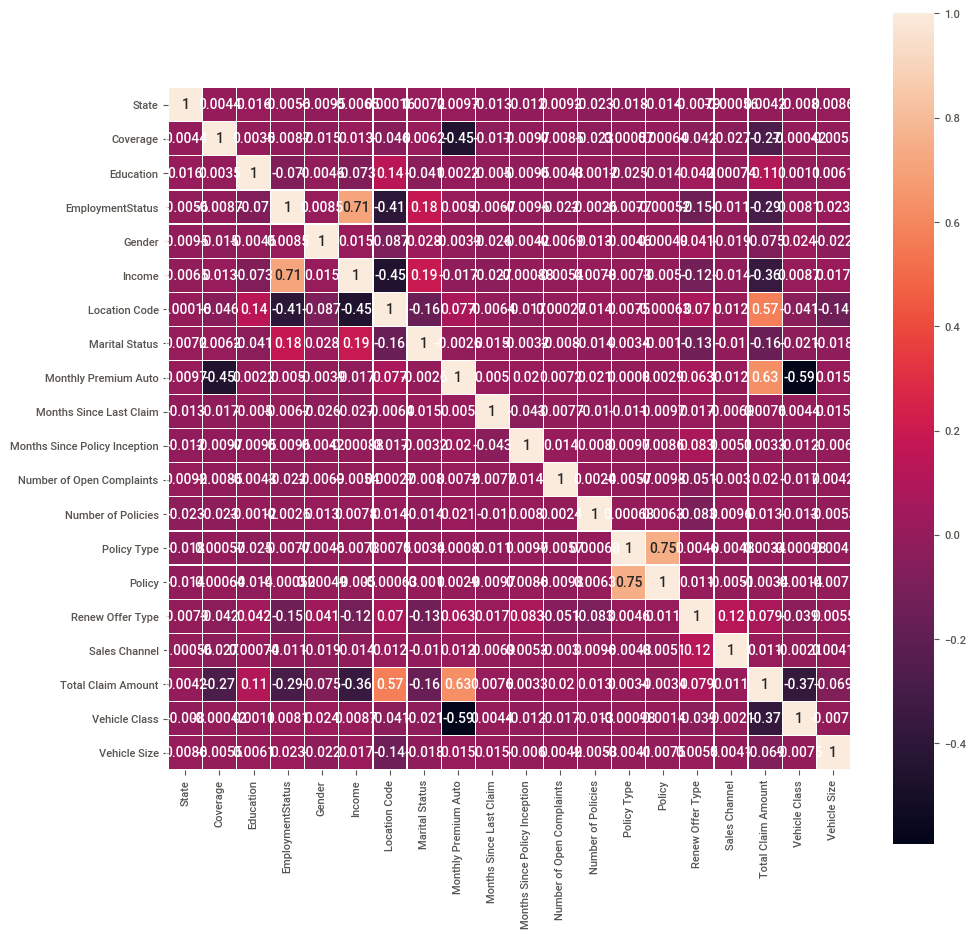

In [273]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data1.corr(), annot = True, annot_kws={'size': 10}, square=True, linecolor='w', linewidths=0.1)

In [35]:
random_forest_model1=crosscvrf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [           nan -5583.34754683 -6252.46048737 -5577.10801246
 -6256.0675704  -6275.86488092 -4063.95338166 -3935.10512934
 -5956.8422486             nan]
  category=UserWarning
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [           nan -5576.71268875 -6258.30674693 -5573.0325011
 -6262.28816731 -6283.84379186 -3632.09719211 -3841.35475856
 -5967.96577407            nan]
  category=UserWarning
C:\Users\91996\anaconda3\lib\site-packages\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\91996\AppData\Local\Temp\joblib_memmapping_folder_28220_7133270614 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\91996\\AppData\\Local\\Temp\\joblib_memmapping_folder_28220_7133270614\\28220-1950853309192-fb22ae4150104d89b6447f0706395b3d.pkl'

In [235]:
random_forest_model1.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'ccp_alpha': 0.0}

In [236]:
rf_model1=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,n_estimators=800,
 min_samples_split= 10,
 min_samples_leaf=5,
 max_leaf_nodes=None,
 max_features=None,
 max_depth=None,
 ccp_alpha=0.0)

In [238]:
Random_Forest_model1=rf_model1.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800building tree 10 of 800

building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800building tree 20 of 800

building tree 21 of 800
building tree 22 of 800
building tree 23 of 800building tree 24 of 800

building tree 25 of 800
building tree 26 of 800
building tree 27 of 800building tree 28 of 800

building tree 29 of 800
building tree 30 of 800
building tree 31 of 800building tree 32 of 800

building tree 33 of 800building tree 34 of 800

building tree 35 of 800
building tree 36 of 800
building tree 37 of 800building tree 38 of 800

building tree 39 of 800
building tree 40 of 800
building tree 41 of 800building tree 42 of 800

b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.5s



building tree 122 of 800
building tree 123 of 800
building tree 124 of 800
building tree 125 of 800building tree 126 of 800

building tree 127 of 800
building tree 128 of 800
building tree 129 of 800
building tree 130 of 800
building tree 131 of 800building tree 132 of 800

building tree 133 of 800
building tree 134 of 800building tree 135 of 800

building tree 136 of 800
building tree 137 of 800
building tree 138 of 800
building tree 139 of 800
building tree 140 of 800
building tree 141 of 800
building tree 142 of 800building tree 143 of 800

building tree 144 of 800
building tree 145 of 800
building tree 146 of 800
building tree 147 of 800
building tree 148 of 800
building tree 149 of 800
building tree 150 of 800building tree 151 of 800

building tree 152 of 800
building tree 153 of 800
building tree 154 of 800
building tree 155 of 800
building tree 156 of 800
building tree 157 of 800
building tree 158 of 800
building tree 159 of 800
building tree 160 of 800
building tree 161 of 800

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    1.4s


building tree 310 of 800
building tree 311 of 800
building tree 312 of 800
building tree 313 of 800
building tree 314 of 800
building tree 315 of 800
building tree 316 of 800
building tree 317 of 800
building tree 318 of 800
building tree 319 of 800
building tree 320 of 800
building tree 321 of 800
building tree 322 of 800
building tree 323 of 800
building tree 324 of 800
building tree 325 of 800
building tree 326 of 800
building tree 327 of 800
building tree 328 of 800
building tree 329 of 800building tree 330 of 800

building tree 331 of 800
building tree 332 of 800
building tree 333 of 800
building tree 334 of 800
building tree 335 of 800
building tree 336 of 800
building tree 337 of 800
building tree 338 of 800
building tree 339 of 800
building tree 340 of 800
building tree 341 of 800
building tree 342 of 800
building tree 343 of 800
building tree 344 of 800
building tree 345 of 800
building tree 346 of 800
building tree 347 of 800
building tree 348 of 800
building tree 349 of 800


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    2.7s



building tree 514 of 800
building tree 515 of 800
building tree 516 of 800
building tree 517 of 800building tree 518 of 800

building tree 519 of 800
building tree 520 of 800
building tree 521 of 800
building tree 522 of 800
building tree 523 of 800
building tree 524 of 800
building tree 525 of 800
building tree 526 of 800
building tree 527 of 800
building tree 528 of 800
building tree 529 of 800
building tree 530 of 800
building tree 531 of 800
building tree 532 of 800
building tree 533 of 800building tree 534 of 800

building tree 535 of 800
building tree 536 of 800
building tree 537 of 800
building tree 538 of 800
building tree 539 of 800
building tree 540 of 800
building tree 541 of 800
building tree 542 of 800
building tree 543 of 800
building tree 544 of 800
building tree 545 of 800
building tree 546 of 800
building tree 547 of 800
building tree 548 of 800
building tree 549 of 800
building tree 550 of 800
building tree 551 of 800
building tree 552 of 800
building tree 553 of 800

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    4.4s finished


In [398]:
predicted_train_model1=Random_Forest_model1.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.1s finished


In [399]:
r2_score(y_train,predicted_train_model1)

0.8649244614770262

In [241]:
predicted_test_model1=Random_Forest_model1.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.0s finished


In [242]:
r2_score(y_test,predicted_test_model1)

0.6952338311288484

# XGboost

In [243]:
XGB_train_model1=crosscvXGB.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[22:17:39] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[22:17:39] ======== Monitor: SketchContainer ========
[22:17:39] MakeCuts: 0.002015s, 1 calls @ 2015us

[22:17:39] Prune: 0.000952s, 1 calls @ 952us

[22:17:39] Push: 8.4e-05s, 1 calls @ 84us

[22:17:39] Unique: 0.001065s, 2 calls @ 1065us

[22:17:39] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[22:17:39] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[22:17:40] ======== Monitor: Learner ========
[22:17:40] Configure: 0.01364s, 1 calls @ 13640us

[22:17:40] GetGradient: 0.007116s, 100 calls @ 7116us

[22:17:40] PredictRaw: 0.019359s, 100 calls @ 19359us

[22:17:40] UpdateOneIter: 1.0515s, 100 calls @ 1051501us

[22:17:40] ======== Monitor: GBTree ========
[22:17:40] BoostNewTrees: 0.992941s, 100 calls @ 992941us

[22:17:40] CommitModel: 0.016257s,

[22:17:43] ======== Monitor: Learner ========
[22:17:43] Configure: 0.000642s, 1 calls @ 642us

[22:17:43] GetGradient: 0.006626s, 100 calls @ 6626us

[22:17:43] PredictRaw: 0.000623s, 100 calls @ 623us

[22:17:43] UpdateOneIter: 1.04654s, 100 calls @ 1046538us

[22:17:43] ======== Monitor: GBTree ========
[22:17:43] BoostNewTrees: 1.01825s, 100 calls @ 1018248us

[22:17:43] CommitModel: 0.017963s, 100 calls @ 17963us

[22:17:43] ======== Device 0 Memory Allocations:  ========
[22:17:43] Peak memory usage: 519MiB
[22:17:43] Number of allocations: 6044622
[22:17:43] ======== Monitor: updater_gpu_hist ========
[22:17:43] InitData: 0.006056s, 100 calls @ 6056us

[22:17:43] InitDataOnce: 0.006042s, 1 calls @ 6042us

[22:17:43] Update: 1.01699s, 100 calls @ 1016991us

[22:17:43] UpdatePredictionCache: 0.017846s, 100 calls @ 17846us

[22:17:43] ======== Monitor: gradient_based_sampler ========
[22:17:43] Sample: 0.003233s, 100 calls @ 3233us

[22:17:43] ======== Monitor: GPUHistMakerDevice0 

[22:17:46] ======== Monitor: Learner ========
[22:17:46] Configure: 0.000452s, 1 calls @ 452us

[22:17:46] GetGradient: 0.006475s, 100 calls @ 6475us

[22:17:46] PredictRaw: 0.000528s, 100 calls @ 528us

[22:17:46] UpdateOneIter: 1.00154s, 100 calls @ 1001539us

[22:17:46] ======== Monitor: GBTree ========
[22:17:46] BoostNewTrees: 0.975215s, 100 calls @ 975215us

[22:17:46] CommitModel: 0.017184s, 100 calls @ 17184us

[22:17:46] ======== Device 0 Memory Allocations:  ========
[22:17:46] Peak memory usage: 519MiB
[22:17:46] Number of allocations: 6170950
[22:17:46] ======== Monitor: updater_gpu_hist ========
[22:17:46] InitData: 0.005288s, 100 calls @ 5288us

[22:17:46] InitDataOnce: 0.005276s, 1 calls @ 5276us

[22:17:46] Update: 0.974462s, 100 calls @ 974462us

[22:17:46] UpdatePredictionCache: 0.016973s, 100 calls @ 16973us

[22:17:46] ======== Monitor: gradient_based_sampler ========
[22:17:46] Sample: 0.003014s, 100 calls @ 3014us

[22:17:46] ======== Monitor: GPUHistMakerDevice0 

[22:17:52] ======== Monitor: Learner ========
[22:17:52] Configure: 0.000429s, 1 calls @ 429us

[22:17:52] GetGradient: 0.007454s, 100 calls @ 7454us

[22:17:52] PredictRaw: 0.000627s, 100 calls @ 627us

[22:17:52] UpdateOneIter: 2.61501s, 100 calls @ 2615014us

[22:17:52] ======== Monitor: GBTree ========
[22:17:52] BoostNewTrees: 2.58249s, 100 calls @ 2582489us

[22:17:52] CommitModel: 0.021724s, 100 calls @ 21724us

[22:17:52] ======== Device 0 Memory Allocations:  ========
[22:17:52] Peak memory usage: 519MiB
[22:17:52] Number of allocations: 6429671
[22:17:52] ======== Monitor: updater_gpu_hist ========
[22:17:52] InitData: 0.004785s, 100 calls @ 4785us

[22:17:52] InitDataOnce: 0.00477s, 1 calls @ 4770us

[22:17:52] Update: 2.5816s, 100 calls @ 2581598us

[22:17:52] UpdatePredictionCache: 0.021593s, 100 calls @ 21593us

[22:17:52] ======== Monitor: gradient_based_sampler ========
[22:17:52] Sample: 3.3e-05s, 100 calls @ 33us

[22:17:52] ======== Monitor: GPUHistMakerDevice0 =====

[22:18:00] ======== Monitor: Learner ========
[22:18:00] Configure: 0.000404s, 1 calls @ 404us

[22:18:00] GetGradient: 0.007514s, 100 calls @ 7514us

[22:18:00] PredictRaw: 0.000705s, 100 calls @ 705us

[22:18:00] UpdateOneIter: 2.48057s, 100 calls @ 2480570us

[22:18:00] ======== Monitor: GBTree ========
[22:18:00] BoostNewTrees: 2.45011s, 100 calls @ 2450111us

[22:18:00] CommitModel: 0.019683s, 100 calls @ 19683us

[22:18:00] ======== Device 0 Memory Allocations:  ========
[22:18:00] Peak memory usage: 519MiB
[22:18:00] Number of allocations: 6742839
[22:18:00] ======== Monitor: updater_gpu_hist ========
[22:18:00] InitData: 0.005104s, 100 calls @ 5104us

[22:18:00] InitDataOnce: 0.005091s, 1 calls @ 5091us

[22:18:00] Update: 2.44871s, 100 calls @ 2448714us

[22:18:00] UpdatePredictionCache: 0.019552s, 100 calls @ 19552us

[22:18:00] ======== Monitor: gradient_based_sampler ========
[22:18:00] Sample: 3.3e-05s, 100 calls @ 33us

[22:18:00] ======== Monitor: GPUHistMakerDevice0 ===

[22:18:07] ======== Monitor: Learner ========
[22:18:07] Configure: 0.000633s, 1 calls @ 633us

[22:18:07] GetGradient: 0.00783s, 100 calls @ 7830us

[22:18:07] PredictRaw: 0.000689s, 100 calls @ 689us

[22:18:07] UpdateOneIter: 2.48713s, 100 calls @ 2487127us

[22:18:07] ======== Monitor: GBTree ========
[22:18:07] BoostNewTrees: 2.45436s, 100 calls @ 2454359us

[22:18:07] CommitModel: 0.021272s, 100 calls @ 21272us

[22:18:07] ======== Device 0 Memory Allocations:  ========
[22:18:07] Peak memory usage: 519MiB
[22:18:07] Number of allocations: 7050076
[22:18:07] ======== Monitor: updater_gpu_hist ========
[22:18:07] InitData: 0.00499s, 100 calls @ 4990us

[22:18:07] InitDataOnce: 0.004974s, 1 calls @ 4974us

[22:18:07] Update: 2.45347s, 100 calls @ 2453467us

[22:18:07] UpdatePredictionCache: 0.021131s, 100 calls @ 21131us

[22:18:07] ======== Monitor: gradient_based_sampler ========
[22:18:07] Sample: 3.7e-05s, 100 calls @ 37us

[22:18:07] ======== Monitor: GPUHistMakerDevice0 =====

[22:18:08] ======== Monitor: Learner ========
[22:18:08] Configure: 0.001199s, 1 calls @ 1199us

[22:18:08] GetGradient: 0.006692s, 100 calls @ 6692us

[22:18:08] PredictRaw: 0.000523s, 100 calls @ 523us

[22:18:08] UpdateOneIter: 0.149518s, 100 calls @ 149518us

[22:18:08] ======== Monitor: GBTree ========
[22:18:08] BoostNewTrees: 0.131825s, 100 calls @ 131825us

[22:18:08] CommitModel: 0.007685s, 100 calls @ 7685us

[22:18:08] ======== Device 0 Memory Allocations:  ========
[22:18:08] Peak memory usage: 519MiB
[22:18:08] Number of allocations: 7059496
[22:18:08] ======== Monitor: updater_gpu_hist ========
[22:18:08] InitData: 0.008841s, 100 calls @ 8841us

[22:18:08] InitDataOnce: 0.008828s, 1 calls @ 8828us

[22:18:08] Update: 0.13112s, 100 calls @ 131120us

[22:18:08] UpdatePredictionCache: 0.007588s, 100 calls @ 7588us

[22:18:08] ======== Monitor: gradient_based_sampler ========
[22:18:08] Sample: 0.002973s, 100 calls @ 2973us

[22:18:08] ======== Monitor: GPUHistMakerDevice0 ==

[22:18:08] Configure: 0.000752s, 1 calls @ 752us

[22:18:08] GetGradient: 0.006127s, 100 calls @ 6127us

[22:18:08] PredictRaw: 0.000454s, 100 calls @ 454us

[22:18:08] UpdateOneIter: 0.135592s, 100 calls @ 135592us

[22:18:08] ======== Monitor: GBTree ========
[22:18:08] BoostNewTrees: 0.120321s, 100 calls @ 120321us

[22:18:08] CommitModel: 0.006335s, 100 calls @ 6335us

[22:18:08] ======== Device 0 Memory Allocations:  ========
[22:18:08] Peak memory usage: 519MiB
[22:18:08] Number of allocations: 7068916
[22:18:08] ======== Monitor: updater_gpu_hist ========
[22:18:08] InitData: 0.004691s, 100 calls @ 4691us

[22:18:08] InitDataOnce: 0.004677s, 1 calls @ 4677us

[22:18:08] Update: 0.119352s, 100 calls @ 119352us

[22:18:08] UpdatePredictionCache: 0.006262s, 100 calls @ 6262us

[22:18:08] ======== Monitor: gradient_based_sampler ========
[22:18:08] Sample: 0.002684s, 100 calls @ 2684us

[22:18:08] ======== Monitor: GPUHistMakerDevice0 ========
[22:18:08] AllReduce: 6.5e-05s, 400 cal

[22:18:10] ======== Monitor: Learner ========
[22:18:10] Configure: 0.000441s, 1 calls @ 441us

[22:18:10] GetGradient: 0.006212s, 100 calls @ 6212us

[22:18:10] PredictRaw: 0.0005s, 100 calls @ 500us

[22:18:10] UpdateOneIter: 1.31791s, 100 calls @ 1317910us

[22:18:10] ======== Monitor: GBTree ========
[22:18:10] BoostNewTrees: 1.29304s, 100 calls @ 1293038us

[22:18:10] CommitModel: 0.016255s, 100 calls @ 16255us

[22:18:10] ======== Device 0 Memory Allocations:  ========
[22:18:10] Peak memory usage: 519MiB
[22:18:10] Number of allocations: 7131541
[22:18:10] ======== Monitor: updater_gpu_hist ========
[22:18:10] InitData: 0.004514s, 100 calls @ 4514us

[22:18:10] InitDataOnce: 0.004501s, 1 calls @ 4501us

[22:18:10] Update: 1.29236s, 100 calls @ 1292363us

[22:18:10] UpdatePredictionCache: 0.016158s, 100 calls @ 16158us

[22:18:10] ======== Monitor: gradient_based_sampler ========
[22:18:10] Sample: 2.2e-05s, 100 calls @ 22us

[22:18:10] ======== Monitor: GPUHistMakerDevice0 =====

[22:18:15] ======== Monitor: Learner ========
[22:18:15] Configure: 0.000574s, 1 calls @ 574us

[22:18:15] GetGradient: 0.006349s, 100 calls @ 6349us

[22:18:15] PredictRaw: 0.000445s, 100 calls @ 445us

[22:18:15] UpdateOneIter: 1.52474s, 100 calls @ 1524741us

[22:18:15] ======== Monitor: GBTree ========
[22:18:15] BoostNewTrees: 1.50054s, 100 calls @ 1500537us

[22:18:15] CommitModel: 0.015052s, 100 calls @ 15052us

[22:18:15] ======== Device 0 Memory Allocations:  ========
[22:18:15] Peak memory usage: 519MiB
[22:18:15] Number of allocations: 7337767
[22:18:15] ======== Monitor: updater_gpu_hist ========
[22:18:15] InitData: 0.004455s, 100 calls @ 4455us

[22:18:15] InitDataOnce: 0.004443s, 1 calls @ 4443us

[22:18:15] Update: 1.49957s, 100 calls @ 1499568us

[22:18:15] UpdatePredictionCache: 0.01497s, 100 calls @ 14970us

[22:18:15] ======== Monitor: gradient_based_sampler ========
[22:18:15] Sample: 2.1e-05s, 100 calls @ 21us

[22:18:15] ======== Monitor: GPUHistMakerDevice0 ====

[22:18:20] ======== Monitor: Learner ========
[22:18:20] Configure: 0.000432s, 1 calls @ 432us

[22:18:20] GetGradient: 0.006086s, 100 calls @ 6086us

[22:18:20] PredictRaw: 0.000553s, 100 calls @ 553us

[22:18:20] UpdateOneIter: 1.4524s, 100 calls @ 1452398us

[22:18:20] ======== Monitor: GBTree ========
[22:18:20] BoostNewTrees: 1.42944s, 100 calls @ 1429439us

[22:18:20] CommitModel: 0.014518s, 100 calls @ 14518us

[22:18:20] ======== Device 0 Memory Allocations:  ========
[22:18:20] Peak memory usage: 519MiB
[22:18:20] Number of allocations: 7547451
[22:18:20] ======== Monitor: updater_gpu_hist ========
[22:18:20] InitData: 0.005454s, 100 calls @ 5454us

[22:18:20] InitDataOnce: 0.005442s, 1 calls @ 5442us

[22:18:20] Update: 1.42879s, 100 calls @ 1428789us

[22:18:20] UpdatePredictionCache: 0.014437s, 100 calls @ 14437us

[22:18:20] ======== Monitor: gradient_based_sampler ========
[22:18:20] Sample: 2e-05s, 100 calls @ 20us

[22:18:20] ======== Monitor: GPUHistMakerDevice0 ======

[22:18:22] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[22:18:22] ======== Device 0 Memory Allocations:  ========
[22:18:22] Peak memory usage: 519MiB
[22:18:22] Number of allocations: 7626505
[22:18:22] ======== Monitor:  ========
[CV 2/8] END eta=0.05, gamma=1.0, learning_rate=0.0001, max_depth=3, min_child_weight=3, reg_alpha=100, scale_pos_weight=0.5, subsample=0.7;, score=(train=-10405.355, test=-10551.166) total time=   0.1s
[22:18:22] ======== Monitor: Learner ========
[22:18:22] Configure: 0.002283s, 1 calls @ 2283us

[22:18:22] ======== Monitor: GBTree ========
[22:18:22] ======== Device 0 Memory Allocations:  ========
[22:18:22] Peak memory usage: 519MiB
[22:18:22] Number of allocations: 7626509
[22:18:22] ======== Monitor: updater_gpu_hist ========
[22:18:22] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[22:18:22] ====

[CV 5/8] END eta=0.05, gamma=1.0, learning_rate=0.0001, max_depth=3, min_child_weight=3, reg_alpha=100, scale_pos_weight=0.5, subsample=0.7;, score=(train=-10434.893, test=-10341.953) total time=   0.1s
[22:18:22] ======== Monitor: Learner ========
[22:18:22] Configure: 0.00068s, 1 calls @ 680us

[22:18:22] ======== Monitor: GBTree ========
[22:18:22] ======== Device 0 Memory Allocations:  ========
[22:18:22] Peak memory usage: 519MiB
[22:18:22] Number of allocations: 7635929
[22:18:22] ======== Monitor: updater_gpu_hist ========
[22:18:22] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[22:18:22] ======== Monitor: SketchContainer ========
[22:18:22] MakeCuts: 0.001133s, 1 calls @ 1133us

[22:18:22] Prune: 0.000559s, 1 calls @ 559us

[22:18:22] Push: 2.8e-05s, 1 calls @ 28us

[22:18:22] Unique: 0.000677s, 2 calls @ 677us

[22:18:22] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[22:18:22] ==

[22:18:26] ======== Monitor: Learner ========
[22:18:26] Configure: 0.000404s, 1 calls @ 404us

[22:18:26] GetGradient: 0.006849s, 100 calls @ 6849us

[22:18:26] PredictRaw: 0.000596s, 100 calls @ 596us

[22:18:26] UpdateOneIter: 2.86531s, 100 calls @ 2865313us

[22:18:26] ======== Monitor: GBTree ========
[22:18:26] BoostNewTrees: 2.49317s, 100 calls @ 2493173us

[22:18:26] CommitModel: 0.362495s, 100 calls @ 362495us

[22:18:26] ======== Device 0 Memory Allocations:  ========
[22:18:26] Peak memory usage: 519MiB
[22:18:26] Number of allocations: 7749719
[22:18:26] ======== Monitor: updater_gpu_hist ========
[22:18:26] InitData: 0.008694s, 100 calls @ 8694us

[22:18:26] InitDataOnce: 0.008683s, 1 calls @ 8683us

[22:18:26] Update: 2.4924s, 100 calls @ 2492398us

[22:18:26] UpdatePredictionCache: 0.362385s, 100 calls @ 362385us

[22:18:26] ======== Monitor: gradient_based_sampler ========
[22:18:26] Sample: 0.004129s, 100 calls @ 4129us

[22:18:26] ======== Monitor: GPUHistMakerDevice0

[22:18:34] ======== Monitor: Learner ========
[22:18:34] Configure: 0.000385s, 1 calls @ 385us

[22:18:34] GetGradient: 0.006559s, 100 calls @ 6559us

[22:18:34] PredictRaw: 0.000589s, 100 calls @ 589us

[22:18:34] UpdateOneIter: 2.78163s, 100 calls @ 2781632us

[22:18:34] ======== Monitor: GBTree ========
[22:18:34] BoostNewTrees: 2.41473s, 100 calls @ 2414732us

[22:18:34] CommitModel: 0.357727s, 100 calls @ 357727us

[22:18:34] ======== Device 0 Memory Allocations:  ========
[22:18:34] Peak memory usage: 519MiB
[22:18:34] Number of allocations: 8064134
[22:18:34] ======== Monitor: updater_gpu_hist ========
[22:18:34] InitData: 0.009325s, 100 calls @ 9325us

[22:18:34] InitDataOnce: 0.009312s, 1 calls @ 9312us

[22:18:34] Update: 2.414s, 100 calls @ 2414003us

[22:18:34] UpdatePredictionCache: 0.357633s, 100 calls @ 357633us

[22:18:34] ======== Monitor: gradient_based_sampler ========
[22:18:34] Sample: 0.003988s, 100 calls @ 3988us

[22:18:34] ======== Monitor: GPUHistMakerDevice0 

[22:18:43] ======== Monitor: Learner ========
[22:18:43] Configure: 0.000564s, 1 calls @ 564us

[22:18:43] GetGradient: 0.006644s, 100 calls @ 6644us

[22:18:43] PredictRaw: 0.000547s, 100 calls @ 547us

[22:18:43] UpdateOneIter: 2.79257s, 100 calls @ 2792572us

[22:18:43] ======== Monitor: GBTree ========
[22:18:43] BoostNewTrees: 2.42905s, 100 calls @ 2429053us

[22:18:43] CommitModel: 0.354079s, 100 calls @ 354079us

[22:18:43] ======== Device 0 Memory Allocations:  ========
[22:18:43] Peak memory usage: 519MiB
[22:18:43] Number of allocations: 8378004
[22:18:43] ======== Monitor: updater_gpu_hist ========
[22:18:43] InitData: 0.009164s, 100 calls @ 9164us

[22:18:43] InitDataOnce: 0.009151s, 1 calls @ 9151us

[22:18:43] Update: 2.42832s, 100 calls @ 2428319us

[22:18:43] UpdatePredictionCache: 0.353987s, 100 calls @ 353987us

[22:18:43] ======== Monitor: gradient_based_sampler ========
[22:18:43] Sample: 0.003828s, 100 calls @ 3828us

[22:18:43] ======== Monitor: GPUHistMakerDevice

[22:18:47] ======== Monitor: Learner ========
[22:18:47] Configure: 0.000524s, 1 calls @ 524us

[22:18:47] GetGradient: 0.006469s, 100 calls @ 6469us

[22:18:47] PredictRaw: 0.000438s, 100 calls @ 438us

[22:18:47] UpdateOneIter: 0.3312s, 100 calls @ 331200us

[22:18:47] ======== Monitor: GBTree ========
[22:18:47] BoostNewTrees: 0.315353s, 100 calls @ 315353us

[22:18:47] CommitModel: 0.007062s, 100 calls @ 7062us

[22:18:47] ======== Device 0 Memory Allocations:  ========
[22:18:47] Peak memory usage: 519MiB
[22:18:47] Number of allocations: 8505306
[22:18:47] ======== Monitor: updater_gpu_hist ========
[22:18:47] InitData: 0.003393s, 100 calls @ 3393us

[22:18:47] InitDataOnce: 0.003381s, 1 calls @ 3381us

[22:18:47] Update: 0.314712s, 100 calls @ 314712us

[22:18:47] UpdatePredictionCache: 0.006991s, 100 calls @ 6991us

[22:18:47] ======== Monitor: gradient_based_sampler ========
[22:18:47] Sample: 0.002816s, 100 calls @ 2816us

[22:18:47] ======== Monitor: GPUHistMakerDevice0 ====

[22:18:48] ======== Monitor: Learner ========
[22:18:48] Configure: 0.000411s, 1 calls @ 411us

[22:18:48] GetGradient: 0.006329s, 100 calls @ 6329us

[22:18:48] PredictRaw: 0.000405s, 100 calls @ 405us

[22:18:48] UpdateOneIter: 0.318271s, 100 calls @ 318271us

[22:18:48] ======== Monitor: GBTree ========
[22:18:48] BoostNewTrees: 0.303415s, 100 calls @ 303415us

[22:18:48] CommitModel: 0.006548s, 100 calls @ 6548us

[22:18:48] ======== Device 0 Memory Allocations:  ========
[22:18:48] Peak memory usage: 519MiB
[22:18:48] Number of allocations: 8538735
[22:18:48] ======== Monitor: updater_gpu_hist ========
[22:18:48] InitData: 0.004525s, 100 calls @ 4525us

[22:18:48] InitDataOnce: 0.004513s, 1 calls @ 4513us

[22:18:48] Update: 0.302804s, 100 calls @ 302804us

[22:18:48] UpdatePredictionCache: 0.006478s, 100 calls @ 6478us

[22:18:48] ======== Monitor: gradient_based_sampler ========
[22:18:48] Sample: 0.002665s, 100 calls @ 2665us

[22:18:48] ======== Monitor: GPUHistMakerDevice0 ==

[22:18:49] ======== Monitor: Learner ========
[22:18:49] Configure: 0.00039s, 1 calls @ 390us

[22:18:49] GetGradient: 0.006543s, 100 calls @ 6543us

[22:18:49] PredictRaw: 0.000432s, 100 calls @ 432us

[22:18:49] UpdateOneIter: 0.336883s, 100 calls @ 336883us

[22:18:49] ======== Monitor: GBTree ========
[22:18:49] BoostNewTrees: 0.32149s, 100 calls @ 321490us

[22:18:49] CommitModel: 0.006789s, 100 calls @ 6789us

[22:18:49] ======== Device 0 Memory Allocations:  ========
[22:18:49] Peak memory usage: 519MiB
[22:18:49] Number of allocations: 8571709
[22:18:49] ======== Monitor: updater_gpu_hist ========
[22:18:49] InitData: 0.00442s, 100 calls @ 4420us

[22:18:49] InitDataOnce: 0.004408s, 1 calls @ 4408us

[22:18:49] Update: 0.320858s, 100 calls @ 320858us

[22:18:49] UpdatePredictionCache: 0.006715s, 100 calls @ 6715us

[22:18:49] ======== Monitor: gradient_based_sampler ========
[22:18:49] Sample: 0.002771s, 100 calls @ 2771us

[22:18:49] ======== Monitor: GPUHistMakerDevice0 =====

[22:18:50] ======== Monitor: Learner ========
[22:18:50] Configure: 0.000405s, 1 calls @ 405us

[22:18:50] GetGradient: 0.006385s, 100 calls @ 6385us

[22:18:50] PredictRaw: 0.000449s, 100 calls @ 449us

[22:18:50] UpdateOneIter: 0.320904s, 100 calls @ 320904us

[22:18:50] ======== Monitor: GBTree ========
[22:18:50] BoostNewTrees: 0.306141s, 100 calls @ 306141us

[22:18:50] CommitModel: 0.006249s, 100 calls @ 6249us

[22:18:50] ======== Device 0 Memory Allocations:  ========
[22:18:50] Peak memory usage: 519MiB
[22:18:50] Number of allocations: 8605243
[22:18:50] ======== Monitor: updater_gpu_hist ========
[22:18:50] InitData: 0.004891s, 100 calls @ 4891us

[22:18:50] InitDataOnce: 0.004879s, 1 calls @ 4879us

[22:18:50] Update: 0.3055s, 100 calls @ 305500us

[22:18:50] UpdatePredictionCache: 0.006173s, 100 calls @ 6173us

[22:18:50] ======== Monitor: gradient_based_sampler ========
[22:18:50] Sample: 0.002704s, 100 calls @ 2704us

[22:18:50] ======== Monitor: GPUHistMakerDevice0 ====

[22:18:51] ======== Monitor: Learner ========
[22:18:51] Configure: 0.000568s, 1 calls @ 568us

[22:18:51] GetGradient: 0.00658s, 100 calls @ 6580us

[22:18:51] PredictRaw: 0.000507s, 100 calls @ 507us

[22:18:51] UpdateOneIter: 0.31815s, 100 calls @ 318150us

[22:18:51] ======== Monitor: GBTree ========
[22:18:51] BoostNewTrees: 0.302712s, 100 calls @ 302712us

[22:18:51] CommitModel: 0.006568s, 100 calls @ 6568us

[22:18:51] ======== Device 0 Memory Allocations:  ========
[22:18:51] Peak memory usage: 519MiB
[22:18:51] Number of allocations: 8638672
[22:18:51] ======== Monitor: updater_gpu_hist ========
[22:18:51] InitData: 0.004522s, 100 calls @ 4522us

[22:18:51] InitDataOnce: 0.00451s, 1 calls @ 4510us

[22:18:51] Update: 0.302093s, 100 calls @ 302093us

[22:18:51] UpdatePredictionCache: 0.006497s, 100 calls @ 6497us

[22:18:51] ======== Monitor: gradient_based_sampler ========
[22:18:51] Sample: 0.002565s, 100 calls @ 2565us

[22:18:51] ======== Monitor: GPUHistMakerDevice0 =====

[22:18:55] ======== Monitor: Learner ========
[22:18:55] Configure: 0.000566s, 1 calls @ 566us

[22:18:55] GetGradient: 0.006427s, 100 calls @ 6427us

[22:18:55] PredictRaw: 0.000447s, 100 calls @ 447us

[22:18:55] UpdateOneIter: 2.7226s, 100 calls @ 2722597us

[22:18:55] ======== Monitor: GBTree ========
[22:18:55] BoostNewTrees: 2.7044s, 100 calls @ 2704396us

[22:18:55] CommitModel: 0.009155s, 100 calls @ 9155us

[22:18:55] ======== Device 0 Memory Allocations:  ========
[22:18:55] Peak memory usage: 519MiB
[22:18:55] Number of allocations: 8788344
[22:18:55] ======== Monitor: updater_gpu_hist ========
[22:18:55] InitData: 0.005941s, 100 calls @ 5941us

[22:18:55] InitDataOnce: 0.005927s, 1 calls @ 5927us

[22:18:55] Update: 2.70366s, 100 calls @ 2703656us

[22:18:55] UpdatePredictionCache: 0.009064s, 100 calls @ 9064us

[22:18:55] ======== Monitor: gradient_based_sampler ========
[22:18:55] Sample: 0.002899s, 100 calls @ 2899us

[22:18:55] ======== Monitor: GPUHistMakerDevice0 ====

[22:19:04] ======== Monitor: Learner ========
[22:19:04] Configure: 0.000526s, 1 calls @ 526us

[22:19:04] GetGradient: 0.007076s, 100 calls @ 7076us

[22:19:04] PredictRaw: 0.000449s, 100 calls @ 449us

[22:19:04] UpdateOneIter: 2.87193s, 100 calls @ 2871927us

[22:19:04] ======== Monitor: GBTree ========
[22:19:04] BoostNewTrees: 2.85298s, 100 calls @ 2852984us

[22:19:04] CommitModel: 0.008988s, 100 calls @ 8988us

[22:19:04] ======== Device 0 Memory Allocations:  ========
[22:19:04] Peak memory usage: 519MiB
[22:19:04] Number of allocations: 9189361
[22:19:04] ======== Monitor: updater_gpu_hist ========
[22:19:04] InitData: 0.003815s, 100 calls @ 3815us

[22:19:04] InitDataOnce: 0.003802s, 1 calls @ 3802us

[22:19:04] Update: 2.85195s, 100 calls @ 2851945us

[22:19:04] UpdatePredictionCache: 0.00888s, 100 calls @ 8880us

[22:19:04] ======== Monitor: gradient_based_sampler ========
[22:19:04] Sample: 0.003184s, 100 calls @ 3184us

[22:19:04] ======== Monitor: GPUHistMakerDevice0 ===

[22:19:13] ======== Monitor: Learner ========
[22:19:13] Configure: 0.000563s, 1 calls @ 563us

[22:19:13] GetGradient: 0.007442s, 100 calls @ 7442us

[22:19:13] PredictRaw: 0.000506s, 100 calls @ 506us

[22:19:13] UpdateOneIter: 2.92923s, 100 calls @ 2929225us

[22:19:13] ======== Monitor: GBTree ========
[22:19:13] BoostNewTrees: 2.90865s, 100 calls @ 2908654us

[22:19:13] CommitModel: 0.010394s, 100 calls @ 10394us

[22:19:13] ======== Device 0 Memory Allocations:  ========
[22:19:13] Peak memory usage: 519MiB
[22:19:13] Number of allocations: 9590812
[22:19:13] ======== Monitor: updater_gpu_hist ========
[22:19:13] InitData: 0.004513s, 100 calls @ 4513us

[22:19:13] InitDataOnce: 0.004499s, 1 calls @ 4499us

[22:19:13] Update: 2.90789s, 100 calls @ 2907893us

[22:19:13] UpdatePredictionCache: 0.010303s, 100 calls @ 10303us

[22:19:13] ======== Monitor: gradient_based_sampler ========
[22:19:13] Sample: 0.003399s, 100 calls @ 3399us

[22:19:13] ======== Monitor: GPUHistMakerDevice0 

[22:19:18] ======== Monitor: Learner ========
[22:19:18] Configure: 0.000505s, 1 calls @ 505us

[22:19:18] GetGradient: 0.006687s, 100 calls @ 6687us

[22:19:18] PredictRaw: 0.000553s, 100 calls @ 553us

[22:19:18] UpdateOneIter: 1.37085s, 100 calls @ 1370853us

[22:19:18] ======== Monitor: GBTree ========
[22:19:18] BoostNewTrees: 1.35277s, 100 calls @ 1352769us

[22:19:18] CommitModel: 0.008976s, 100 calls @ 8976us

[22:19:18] ======== Device 0 Memory Allocations:  ========
[22:19:18] Peak memory usage: 519MiB
[22:19:18] Number of allocations: 9848770
[22:19:18] ======== Monitor: updater_gpu_hist ========
[22:19:18] InitData: 0.006576s, 100 calls @ 6576us

[22:19:18] InitDataOnce: 0.006564s, 1 calls @ 6564us

[22:19:18] Update: 1.35209s, 100 calls @ 1352088us

[22:19:18] UpdatePredictionCache: 0.008896s, 100 calls @ 8896us

[22:19:18] ======== Monitor: gradient_based_sampler ========
[22:19:18] Sample: 1.8e-05s, 100 calls @ 18us

[22:19:18] ======== Monitor: GPUHistMakerDevice0 =====

[22:19:23] ======== Monitor: Learner ========
[22:19:23] Configure: 0.000942s, 1 calls @ 942us

[22:19:23] GetGradient: 0.00663s, 100 calls @ 6630us

[22:19:23] PredictRaw: 0.000397s, 100 calls @ 397us

[22:19:23] UpdateOneIter: 1.36436s, 100 calls @ 1364357us

[22:19:23] ======== Monitor: GBTree ========
[22:19:23] BoostNewTrees: 1.3454s, 100 calls @ 1345398us

[22:19:23] CommitModel: 0.009559s, 100 calls @ 9559us

[22:19:23] ======== Device 0 Memory Allocations:  ========
[22:19:23] Peak memory usage: 519MiB
[22:19:23] Number of allocations: 10021039
[22:19:23] ======== Monitor: updater_gpu_hist ========
[22:19:23] InitData: 0.006672s, 100 calls @ 6672us

[22:19:23] InitDataOnce: 0.006658s, 1 calls @ 6658us

[22:19:23] Update: 1.3447s, 100 calls @ 1344700us

[22:19:23] UpdatePredictionCache: 0.009474s, 100 calls @ 9474us

[22:19:23] ======== Monitor: gradient_based_sampler ========
[22:19:23] Sample: 1.8e-05s, 100 calls @ 18us

[22:19:23] ======== Monitor: GPUHistMakerDevice0 =======

[22:19:27] ======== Monitor: Learner ========
[22:19:27] Configure: 0.000649s, 1 calls @ 649us

[22:19:27] GetGradient: 0.007259s, 100 calls @ 7259us

[22:19:27] PredictRaw: 0.000495s, 100 calls @ 495us

[22:19:27] UpdateOneIter: 1.43901s, 100 calls @ 1439005us

[22:19:27] ======== Monitor: GBTree ========
[22:19:27] BoostNewTrees: 1.41868s, 100 calls @ 1418678us

[22:19:27] CommitModel: 0.01019s, 100 calls @ 10190us

[22:19:27] ======== Device 0 Memory Allocations:  ========
[22:19:27] Peak memory usage: 519MiB
[22:19:27] Number of allocations: 10191782
[22:19:27] ======== Monitor: updater_gpu_hist ========
[22:19:27] InitData: 0.007931s, 100 calls @ 7931us

[22:19:27] InitDataOnce: 0.007916s, 1 calls @ 7916us

[22:19:27] Update: 1.41789s, 100 calls @ 1417889us

[22:19:27] UpdatePredictionCache: 0.010096s, 100 calls @ 10096us

[22:19:27] ======== Monitor: gradient_based_sampler ========
[22:19:27] Sample: 2.2e-05s, 100 calls @ 22us

[22:19:27] ======== Monitor: GPUHistMakerDevice0 ===

In [244]:
XGB_train_model1.best_params_

{'subsample': 1.0,
 'scale_pos_weight': 1,
 'reg_alpha': 1,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.01,
 'gamma': 0.9,
 'eta': 0.015}

In [245]:
XGB_Model1=XGBRegressor(booster='gbtree',verbosity =3,tree_method='gpu_hist',subsample=1.0,
                       scale_pos_weight=1,
 reg_alpha=1,
 min_child_weight=5,
 max_depth=10,
 learning_rate=0.01,
 gamma=0.9,
 eta=0.015)

In [247]:
XGB1=XGB_Model1.fit(X_train,y_train)

[22:22:48] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[22:22:48] ======== Monitor: SketchContainer ========
[22:22:48] MakeCuts: 0.001141s, 1 calls @ 1141us

[22:22:48] Prune: 0.00049s, 1 calls @ 490us

[22:22:48] Push: 7.4e-05s, 1 calls @ 74us

[22:22:48] Unique: 0.000598s, 2 calls @ 598us

[22:22:48] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[22:22:48] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[22:22:49] ======== Monitor: Learner ========
[22:22:49] Configure: 0.000532s, 1 calls @ 532us

[22:22:49] GetGradient: 0.007088s, 100 calls @ 7088us

[22:22:49] PredictRaw: 0.017134s, 100 calls @ 17134us

[22:22:49] UpdateOneIter: 1.5279s, 100 calls @ 1527900us

[22:22:49] ======== Monitor: GBTree ========
[22:22:49] BoostNewTrees: 1.49113s, 100 calls @ 1491130us

[22:22:49] CommitModel: 0.010309s, 100 calls @ 10309us

[22:22:49] ======== Device 0 Memory Alloca

In [248]:
train_predicted_xg1=XGB1.predict(X_train)

[22:22:53] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[22:22:53] ======== Device 0 Memory Allocations:  ========
[22:22:53] Peak memory usage: 519MiB
[22:22:53] Number of allocations: 10311776
[22:22:53] ======== Monitor:  ========


In [249]:
r2_score(y_train,train_predicted_xg1)

0.4979395921643289

In [250]:
test_predicted_xg1=XGB1.predict(X_test)
r2_score(y_test,test_predicted_xg1)

0.3657592115013272

In [251]:
import lightgbm as lgb

In [253]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [256]:
lgb_model=lgb.LGBMRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3)

crosscvlgb=RandomizedSearchCV(estimator=lgb_model,param_distributions=param_test,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [257]:
LGB_model=crosscvlgb.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.750057
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.127289
[LightGBM] [Debug] init for col-wise cost 0.001197 seconds, init for row-wise cost 0.001613 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 7307, number of used features: 20
[LightGBM] [Info] Start training from score 8022.789386
[LightGBM] [Warning] No further splits with positive gai

In [263]:
LGB_model.best_params_

{'colsample_bytree': 0.46754642453044626,
 'min_child_samples': 140,
 'min_child_weight': 0.1,
 'num_leaves': 39,
 'reg_alpha': 1,
 'reg_lambda': 100,
 'subsample': 0.9438734750367008}

In [264]:
lgb_model=lgb.LGBMRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,
                            colsample_bytree=0.46754642453044626,
                             min_child_samples=140,
                             min_child_weight=0.1,
                             num_leaves=39,
                             reg_alpha=1,
                             reg_lambda=100,
                             subsample=0.9438734750367008
                           )

In [266]:
LGB_Model=lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.750057
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.127289
[LightGBM] [Debug] init for col-wise cost 0.001552 seconds, init for row-wise cost 0.002115 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 7307, number of used features: 20
[LightGBM] [Info] Start training from score 8022.789386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with lea

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 33 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 34 and depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and depth = 12
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 37 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 39 and depth = 11
[LightGBM] [Warning] No

In [267]:
predicted_lgb_train=LGB_Model.predict(X_train)

In [268]:
r2_score(y_train,predicted_lgb_train)

0.7344435322291276

In [269]:
predicted_lgb_test=LGB_model.predict(X_test)

In [270]:
r2_score(y_test,predicted_lgb_test)

0.6695480986527309

# Developing a Neural Network

# Standardizing the values in columns

In [278]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [279]:
scaler=std.fit(X_train)

In [280]:
train_sc=scaler.transform(X_train)

In [284]:
test_sc=scaler.transform(X_test)

In [317]:
input_shape=(20,)
initializer = tf.keras.initializers.GlorotUniform()
initializer1 = tf.keras.initializers.HeUniform()
kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)
activity_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)
MLP_Model1=Sequential()
MLP_Model1.add(Dense(500, input_shape=input_shape, activation='relu'))
MLP_Model1.add(Dense(400, activation='relu',kernel_initializer=initializer1,kernel_regularizer=kernel_regularizer,activity_regularizer=activity_regularizer))
MLP_Model1.add(Dense(300, activation='relu',kernel_initializer=initializer1,kernel_regularizer=kernel_regularizer,activity_regularizer=activity_regularizer))
MLP_Model1.add(Dense(200, activation='relu',kernel_initializer=initializer,kernel_regularizer=kernel_regularizer,activity_regularizer=activity_regularizer))
MLP_Model1.add(Dense(100, activation='relu',kernel_initializer=initializer,kernel_regularizer=kernel_regularizer,activity_regularizer=activity_regularizer))
MLP_Model1.add(Dense(80, activation='relu',kernel_initializer=initializer,kernel_regularizer=kernel_regularizer,activity_regularizer=activity_regularizer))
MLP_Model1.add(Dense(1, activation='linear'))

In [318]:
MLP_Model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               10500     
_________________________________________________________________
dense_15 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_16 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_19 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [388]:
MLP_Model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,
    name="Adam"),
    loss='mean_squared_error',
    metrics=tf.keras.metrics.MeanSquaredError()
)

In [389]:
Final_NN2_model=MLP_Model1.fit(X_train,y_train,batch_size=60,epochs=80,verbose=1,validation_split=0.2,shuffle=True,steps_per_epoch=120,use_multiprocessing=True)

Epoch 1/80
120/120 [==============================] - 1s 8ms/step - loss: 13181160.0000 - mean_squared_error: 13030377.0000 - val_loss: 16240281.0000 - val_mean_squared_error: 16090616.0000
Epoch 2/80
120/120 [==============================] - 1s 5ms/step - loss: 12969245.0000 - mean_squared_error: 12817649.0000 - val_loss: 16343609.0000 - val_mean_squared_error: 16191505.0000
Epoch 3/80
120/120 [==============================] - 1s 6ms/step - loss: 12462465.0000 - mean_squared_error: 12312579.0000 - val_loss: 16300762.0000 - val_mean_squared_error: 16152531.0000
Epoch 4/80
120/120 [==============================] - 1s 5ms/step - loss: 13603298.0000 - mean_squared_error: 13451038.0000 - val_loss: 16449607.0000 - val_mean_squared_error: 16302535.0000
Epoch 5/80
120/120 [==============================] - 1s 5ms/step - loss: 12986721.0000 - mean_squared_error: 12835786.0000 - val_loss: 16262197.0000 - val_mean_squared_error: 16108288.0000
Epoch 6/80
120/120 [==============================

Epoch 44/80
120/120 [==============================] - 1s 6ms/step - loss: 12476118.0000 - mean_squared_error: 12334586.0000 - val_loss: 16567852.0000 - val_mean_squared_error: 16423209.0000
Epoch 45/80
120/120 [==============================] - 1s 6ms/step - loss: 12587113.0000 - mean_squared_error: 12441532.0000 - val_loss: 16610783.0000 - val_mean_squared_error: 16470513.0000
Epoch 46/80
120/120 [==============================] - 1s 6ms/step - loss: 12831578.0000 - mean_squared_error: 12688274.0000 - val_loss: 16513569.0000 - val_mean_squared_error: 16368648.0000
Epoch 47/80
120/120 [==============================] - 1s 6ms/step - loss: 12413008.0000 - mean_squared_error: 12269904.0000 - val_loss: 16632947.0000 - val_mean_squared_error: 16489606.0000
Epoch 48/80
120/120 [==============================] - 1s 6ms/step - loss: 12689562.0000 - mean_squared_error: 12546292.0000 - val_loss: 16526777.0000 - val_mean_squared_error: 16382626.0000
Epoch 49/80
120/120 [========================

In [390]:
X_train_NN=MLP_Model1.predict(X_train)

In [391]:
r2_score(y_train,X_train_NN)

0.7162274777930059

In [392]:
X_test_NN=MLP_Model1.predict(X_test)

In [393]:
r2_score(y_test,X_test_NN)

0.6156513447866215

# Approach 3 

# Making Ordinal Enoding and count Encoding to categorical columns and laving the numerical columns as it is

In [2]:
data2=pd.read_csv(r"C:\Users\91996\Desktop\ML\insurance.csv")

In [3]:
y=data2['Customer Lifetime Value']

In [4]:
del data2['Customer']
del data2['Customer Lifetime Value']

In [397]:
#Count Encoding:-

State  Coverage Education EmploymentStatus Gender  Income  \
0     Washington     Basic  Bachelor         Employed      F   56274   
1        Arizona  Extended  Bachelor       Unemployed      F       0   
2         Nevada   Premium  Bachelor         Employed      F   48767   
3     California     Basic  Bachelor       Unemployed      M       0   
4     Washington     Basic  Bachelor         Employed      M   43836   
...          ...       ...       ...              ...    ...     ...   
9129  California     Basic  Bachelor         Employed      M   71941   
9130  California  Extended   College         Employed      F   21604   
9131  California  Extended  Bachelor       Unemployed      M       0   
9132  California  Extended   College         Employed      M   21941   
9133  California  Extended   College       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
0     Corporate L3           Offer1         Agent          384.811147   
1      Personal L3           Offer3         Agent         1131.464935   
2      Personal L3           Offer1         Agent          566.472247   
3     Corporate L2           Offer1   Call Center          529.881344   
4      Personal L1           Offer1         Agent          138.130879   
...            ...              ...           ...                 ...   
9129   Personal L1           Offer2           Web          198.234764   
9130  Corporate L3           Offer1        Branch          379.200000   
9131  Corporate L2           Offer1        Branch          790.784983   
9132   Personal L2           Offer3        Branch          691.200000   
9133  Corpor

In [11]:
columns=['State', 'Coverage', 'Gender','Location Code', 'Marital Status',
        'Number of Open Complaints', 'Number of Policies', 'Policy Type','Policy', 'Renew Offer Type', 'Sales Channel',
         'Vehicle Class', 'Vehicle Size'
        ]
for i in columns:
    count_encoding=dict(data2[i].value_counts())
    data2[i]=data2[i].map(count_encoding)
    print(count_encoding)

{'California': 3150, 'Oregon': 2601, 'Arizona': 1703, 'Nevada': 882, 'Washington': 798}
{'Basic': 5568, 'Extended': 2742, 'Premium': 824}
{'F': 4658, 'M': 4476}
{'Suburban': 5779, 'Rural': 1773, 'Urban': 1582}
{'Married': 5298, 'Single': 2467, 'Divorced': 1369}
{0: 7252, 1: 1011, 2: 374, 3: 292, 4: 149, 5: 56}
{1: 3251, 2: 2294, 3: 1168, 7: 433, 9: 416, 4: 409, 5: 407, 8: 384, 6: 372}
{'Personal Auto': 6788, 'Corporate Auto': 1968, 'Special Auto': 378}
{'Personal L3': 3426, 'Personal L2': 2122, 'Personal L1': 1240, 'Corporate L3': 1014, 'Corporate L2': 595, 'Corporate L1': 359, 'Special L2': 164, 'Special L3': 148, 'Special L1': 66}
{'Offer1': 3752, 'Offer2': 2926, 'Offer3': 1432, 'Offer4': 1024}
{'Agent': 3477, 'Branch': 2567, 'Call Center': 1765, 'Web': 1325}
{'Four-Door Car': 4621, 'Two-Door Car': 1886, 'SUV': 1796, 'Sports Car': 484, 'Luxury SUV': 184, 'Luxury Car': 163}
{'Medsize': 6424, 'Small': 1764, 'Large': 946}


In [12]:
mapping_education={'Bachelor':2, 'College':1, 'Master':3, 'High School or Below':0, 'Doctor':4}

data2['Education']=data2['Education'].map(mapping_education)


In [13]:
mapping_Employment={'Employed':4, 'Unemployed':3, 'Medical Leave':2, 'Disabled':1, 'Retired':0}
data2['EmploymentStatus']=data2['EmploymentStatus'].map(mapping_Employment)

In [14]:
X=data2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# random Forest

In [21]:
random_forest_model2=crosscvrf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [-6261.87729031 -6236.18701044            nan -5192.16243824
 -4210.65455306 -4058.98752715 -4401.594004   -5579.87183703
            nan -3672.76466391]
  category=UserWarning
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [-6266.81951107 -6244.34939235            nan -5142.73188773
 -3627.48603425 -3630.70710152 -4370.9174007  -5570.86074349
            nan -2549.27477136]
  category=UserWarning
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 500building tree 2 of 500
building tree 3 of 500
building tree 4 of 500

building tree 5 of 500building tree 6 of 500

building tree 7 of 500building tree 8 of 500

building tree 9 of 500
building tree 10 of 500
building tree 11 of 500building tree 12 of 500

building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.7s



building tree 148 of 500
building tree 149 of 500building tree 150 of 500

building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    1.7s



building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500building tree 302 of 500

building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished


In [22]:
random_forest_model2.best_params_

{'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 25,
 'ccp_alpha': 0.0}

In [23]:
rf_model2=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,n_estimators=500,
 min_samples_split= 15,
 min_samples_leaf=2,
 max_leaf_nodes=None,
 max_features=None,
 max_depth=25,
 ccp_alpha=0.0)

In [24]:
RF_model2=rf_model2.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500building tree 14 of 500

building tree 15 of 500building tree 16 of 500

building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500building tree 30 of 500

building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500building tree 36 of 500
building tree 37 of 500

building tree 38 of 500building tree 39 of 500

building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.5s



building tree 144 of 500
building tree 145 of 500building tree 146 of 500

building tree 147 of 500
building tree 148 of 500building tree 149 of 500

building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500building tree 154 of 500

building tree 155 of 500building tree 156 of 500

building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500building tree 162 of 500

building tree 163 of 500building tree 164 of 500

building tree 165 of 500building tree 166 of 500

building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500building tree 173 of 500

building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    1.5s




building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500building tree 307 of 500

building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500building tree 331 of 500

building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 50

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.9s finished


In [25]:
train_model2=RF_model2.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [28]:
r2_score(y_train,train_model2)

0.8611917285092148

In [29]:
test_model2=RF_model2.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [30]:
r2_score(y_test,test_model2)

0.6943150571304373

# Approach 4

In [ ]:
#Let us create new features

In [45]:
data3=pd.read_csv(r"C:\Users\91996\Desktop\ML\insurance.csv")

In [46]:
y=data3['Customer Lifetime Value']

In [47]:
del data3['Customer Lifetime Value']
del data3['Customer']

In [48]:
Policy_initial=[]
Policy_End=[]
for i in data3.Policy:
    Policy_initial.append(i.split(" ")[0])
    Policy_End.append(i.split(" ")[1])

In [49]:
data3['Policy_initial']=Policy_initial
data3['Policy_End']=Policy_End

In [50]:
policy_initial_map=dict(data3.Policy_initial.value_counts())

In [51]:
policy_final_map=dict(data3.Policy_End.value_counts())

In [52]:
data3['Policy_initial']=data3['Policy_initial'].map(policy_initial_map)

In [53]:
data3['Policy_End']=data3['Policy_End'].map(policy_final_map)

In [54]:
data3.columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Policy_initial', 'Policy_End'],
      dtype='object')

In [55]:
del data3['Policy']

In [56]:
columns=['State', 'Coverage','Education','EmploymentStatus','Gender','Location Code', 'Marital Status',
        'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Renew Offer Type', 'Sales Channel',
         'Vehicle Class', 'Vehicle Size'
        ]
for i in columns:
    count_encoding=dict(data3[i].value_counts())
    data3[i]=data3[i].map(count_encoding)
    print(count_encoding)

{'California': 3150, 'Oregon': 2601, 'Arizona': 1703, 'Nevada': 882, 'Washington': 798}
{'Basic': 5568, 'Extended': 2742, 'Premium': 824}
{'Bachelor': 2748, 'College': 2681, 'High School or Below': 2622, 'Master': 741, 'Doctor': 342}
{'Employed': 5698, 'Unemployed': 2317, 'Medical Leave': 432, 'Disabled': 405, 'Retired': 282}
{'F': 4658, 'M': 4476}
{'Suburban': 5779, 'Rural': 1773, 'Urban': 1582}
{'Married': 5298, 'Single': 2467, 'Divorced': 1369}
{0: 7252, 1: 1011, 2: 374, 3: 292, 4: 149, 5: 56}
{1: 3251, 2: 2294, 3: 1168, 7: 433, 9: 416, 4: 409, 5: 407, 8: 384, 6: 372}
{'Personal Auto': 6788, 'Corporate Auto': 1968, 'Special Auto': 378}
{'Offer1': 3752, 'Offer2': 2926, 'Offer3': 1432, 'Offer4': 1024}
{'Agent': 3477, 'Branch': 2567, 'Call Center': 1765, 'Web': 1325}
{'Four-Door Car': 4621, 'Two-Door Car': 1886, 'SUV': 1796, 'Sports Car': 484, 'Luxury SUV': 184, 'Luxury Car': 163}
{'Medsize': 6424, 'Small': 1764, 'Large': 946}


In [57]:
data3

State  Coverage  Education  EmploymentStatus  Gender  Income  \
0       798      5568       2748              5698    4658   56274   
1      1703      2742       2748              2317    4658       0   
2       882       824       2748              5698    4658   48767   
3      3150      5568       2748              2317    4476       0   
4       798      5568       2748              5698    4476   43836   
...     ...       ...        ...               ...     ...     ...   
9129   3150      5568       2748              5698    4476   71941   
9130   3150      2742       2681              5698    4658   21604   
9131   3150      2742       2748              2317    4476       0   
9132   3150      2742       2681              5698    4476   21941   
9133   3150      2742       2681              2317    4476       0   

      Location Code  Marital Status  Monthly Premium Auto  \
0              5779            5298                    69   
1              5779            2467                    94   
2              5779            5298                   108   
3              5779            5298                   106   
4              1773            2467                    73   
...             ...             ...                   ...   
9129           1582            5298                    73   
9130           5779            1369                    79   
9131           5779            2467                    85   
9132           5779            5298                    96   
9133           5779            2467                    77   

      Months Since Last Claim  ...  Number of Open Complaints  \
0                          32  ...                       7252   
1                          13  ...                       7252   
2                          18  ...                       7252   
3                          18  ...                       7252   
4                          12  ...                       7252   
...                       ...  ...                        ...   
9129                       18  ...                       7252   
9130                       14  ...                       7252   
9131                        9  ...                        292   
9132                       34  ...                       7252   
9133                        3  ...                       7252   

      Number of Policies  Policy Type  Renew Offer Type  Sales Channel  \
0                   3251         1968              3752           3477   
1                    384         6788              1432           3477   
2                   2294         6788              3752           3477   
3                    433         1968              3752           1765   
4                   3251         6788              3752           3477   
...                  ...          ...               ...            ...   
9129                2294         6788              2926           1325   
9130                3251         1968              3752           2567   
9131                2294         1968              3752           2567   
9132                1168         6788              1432           2567   
9133                3251         1968              1024           1765   

      Total Claim Amount  Vehicle Class  Vehicle Size  Policy_initial  \
0             384.811147           1886          6424            1968   
1            1131.464935           4621          6424            6788   
2             566.472247           1886          6424            6788   
3             529.881344           1796          6424            1968   
4             138.130879           4621          6424            6788   
...                  ...            ...           ...             ...   
9129          198.234764           4621          6424            6788   
9130          379.200000           4621          6424            1968   
9131          790.784983           4621          6424            1968   
9132          691.200000        

In [58]:
X=data3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
n_estimators=[120,300,500,800,1200]
max_depth=[5,8,15,25,30,None]
min_samples_split=[1,2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
max_features=[None,"sqrt","log2"]
max_leaf_nodes=[None,2,4,8]
ccp_alpha=[0.0,0.00001,0.0001]

parameters=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)

rf_model=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3)

crosscvrf=RandomizedSearchCV(estimator=rf_model,param_distributions=parameters,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [60]:
random_forest_model4=crosscvrf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [-3810.2063038  -3924.91487069 -3935.91754175 -5956.76193443
 -4398.14546619 -3669.19039288            nan -5631.32605447
 -4371.1530598  -3693.39814558]
  category=UserWarning
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [-3644.37663487 -3847.86041676 -3841.88162787 -5967.96584411
 -4368.6250434  -2535.23513085            nan -5625.89956168
 -4186.45358178 -2470.15698068]
  category=UserWarning
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800building tree 11 of 800

building tree 12 of 800
building tree 13 of 800building tree 14 of 800

building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800building tree 19 of 800

building tree 20 of 800
building tree 21 of 800
building tree 22 of 800building tree 23 of 800building tree 24 of 800


building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.8s



building tree 128 of 800
building tree 129 of 800
building tree 130 of 800
building tree 131 of 800
building tree 132 of 800
building tree 133 of 800
building tree 134 of 800
building tree 135 of 800
building tree 136 of 800
building tree 137 of 800
building tree 138 of 800
building tree 139 of 800
building tree 140 of 800
building tree 141 of 800
building tree 142 of 800
building tree 143 of 800
building tree 144 of 800
building tree 145 of 800
building tree 146 of 800
building tree 147 of 800
building tree 148 of 800building tree 149 of 800

building tree 150 of 800
building tree 151 of 800
building tree 152 of 800
building tree 153 of 800
building tree 154 of 800building tree 155 of 800

building tree 156 of 800
building tree 157 of 800
building tree 158 of 800
building tree 159 of 800
building tree 160 of 800
building tree 161 of 800
building tree 162 of 800
building tree 163 of 800
building tree 164 of 800
building tree 165 of 800building tree 166 of 800

building tree 167 of 800

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    2.0s



building tree 283 of 800building tree 284 of 800
building tree 285 of 800

building tree 286 of 800
building tree 287 of 800
building tree 288 of 800
building tree 289 of 800
building tree 290 of 800
building tree 291 of 800
building tree 292 of 800
building tree 293 of 800building tree 294 of 800

building tree 295 of 800building tree 296 of 800

building tree 297 of 800
building tree 298 of 800
building tree 299 of 800
building tree 300 of 800
building tree 301 of 800building tree 302 of 800

building tree 303 of 800
building tree 304 of 800
building tree 305 of 800
building tree 306 of 800
building tree 307 of 800
building tree 308 of 800
building tree 309 of 800
building tree 310 of 800
building tree 311 of 800
building tree 312 of 800
building tree 313 of 800
building tree 314 of 800
building tree 315 of 800
building tree 316 of 800
building tree 317 of 800
building tree 318 of 800
building tree 319 of 800building tree 320 of 800

building tree 321 of 800
building tree 322 of 800

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    3.8s



building tree 514 of 800
building tree 515 of 800
building tree 516 of 800
building tree 517 of 800
building tree 518 of 800
building tree 519 of 800
building tree 520 of 800
building tree 521 of 800
building tree 522 of 800
building tree 523 of 800
building tree 524 of 800
building tree 525 of 800
building tree 526 of 800
building tree 527 of 800
building tree 528 of 800
building tree 529 of 800
building tree 530 of 800
building tree 531 of 800
building tree 532 of 800
building tree 533 of 800
building tree 534 of 800building tree 535 of 800

building tree 536 of 800
building tree 537 of 800
building tree 538 of 800
building tree 539 of 800
building tree 540 of 800
building tree 541 of 800
building tree 542 of 800
building tree 543 of 800
building tree 544 of 800
building tree 545 of 800
building tree 546 of 800
building tree 547 of 800
building tree 548 of 800
building tree 549 of 800
building tree 550 of 800
building tree 551 of 800
building tree 552 of 800
building tree 553 of 800

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    6.5s finished


In [61]:
random_forest_model4.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 15,
 'ccp_alpha': 1e-05}

In [62]:
rf_model_Final=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,
                                    n_estimators=800,
 min_samples_split=2,
 min_samples_leaf=5,
 max_leaf_nodes=None,
 max_features=None,
 max_depth=15,
 ccp_alpha=1e-05)

In [63]:
RF_Model_FINAL=rf_model_Final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 1 of 800building tree 2 of 800
building tree 3 of 800
building tree 4 of 800

building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800building tree 11 of 800

building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800building tree 16 of 800

building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800building tree 24 of 800

building tree 25 of 800building tree 26 of 800

building tree 27 of 800
building tree 28 of 800
building tree 29 of 800building tree 30 of 800

building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800building tree 37 of 800

building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.8s


building tree 129 of 800
building tree 130 of 800
building tree 131 of 800
building tree 132 of 800
building tree 133 of 800
building tree 134 of 800
building tree 135 of 800
building tree 136 of 800
building tree 137 of 800
building tree 138 of 800
building tree 139 of 800building tree 140 of 800

building tree 141 of 800
building tree 142 of 800
building tree 143 of 800
building tree 144 of 800
building tree 145 of 800
building tree 146 of 800
building tree 147 of 800
building tree 148 of 800
building tree 149 of 800
building tree 150 of 800
building tree 151 of 800
building tree 152 of 800building tree 153 of 800

building tree 154 of 800
building tree 155 of 800
building tree 156 of 800
building tree 157 of 800
building tree 158 of 800building tree 159 of 800

building tree 160 of 800
building tree 161 of 800
building tree 162 of 800
building tree 163 of 800
building tree 164 of 800
building tree 165 of 800building tree 166 of 800

building tree 167 of 800
building tree 168 of 800


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    2.2s



building tree 285 of 800
building tree 286 of 800
building tree 287 of 800
building tree 288 of 800
building tree 289 of 800
building tree 290 of 800
building tree 291 of 800
building tree 292 of 800
building tree 293 of 800
building tree 294 of 800
building tree 295 of 800
building tree 296 of 800building tree 297 of 800building tree 298 of 800


building tree 299 of 800
building tree 300 of 800
building tree 301 of 800
building tree 302 of 800
building tree 303 of 800
building tree 304 of 800
building tree 305 of 800
building tree 306 of 800
building tree 307 of 800
building tree 308 of 800building tree 309 of 800

building tree 310 of 800
building tree 311 of 800
building tree 312 of 800
building tree 313 of 800
building tree 314 of 800
building tree 315 of 800
building tree 316 of 800
building tree 317 of 800
building tree 318 of 800
building tree 319 of 800
building tree 320 of 800
building tree 321 of 800
building tree 322 of 800
building tree 323 of 800
building tree 324 of 800

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    3.9s



building tree 526 of 800
building tree 527 of 800
building tree 528 of 800
building tree 529 of 800
building tree 530 of 800
building tree 531 of 800
building tree 532 of 800
building tree 533 of 800
building tree 534 of 800
building tree 535 of 800
building tree 536 of 800
building tree 537 of 800
building tree 538 of 800
building tree 539 of 800
building tree 540 of 800
building tree 541 of 800
building tree 542 of 800
building tree 543 of 800
building tree 544 of 800
building tree 545 of 800
building tree 546 of 800
building tree 547 of 800
building tree 548 of 800
building tree 549 of 800
building tree 550 of 800
building tree 551 of 800
building tree 552 of 800
building tree 553 of 800
building tree 554 of 800
building tree 555 of 800
building tree 556 of 800
building tree 557 of 800
building tree 558 of 800
building tree 559 of 800
building tree 560 of 800building tree 561 of 800

building tree 562 of 800
building tree 563 of 800
building tree 564 of 800
building tree 565 of 800

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    6.2s finished



building tree 800 of 800


In [64]:
train_predict_final=RF_Model_FINAL.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.2s finished


In [65]:
r2_score(y_train,train_predict_final)

0.8609014897890124

In [66]:
test_predict_final=RF_Model_FINAL.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.1s finished


In [67]:
r2_score(y_test,test_predict_final)

0.6937739347046519

# With these initial approaches the best r2 model was 0.695 

In [17]:
import pickle as pkl

In [6]:
#https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [18]:
sub_data=pd.read_csv(r"C:\Users\91996\Desktop\ML\insurance.csv")

In [19]:
del sub_data['Customer']
y= sub_data['Customer Lifetime Value']
del sub_data['Customer Lifetime Value']

# Feature Engineering

In [20]:
sub_data['State_coverage']=sub_data['State'].astype('str')+sub_data['Coverage'].astype('str')
sub_data['Coverage_Education']=sub_data['Coverage'].astype('str')+sub_data['Education'].astype('str')
sub_data['Education_emplymnet']=sub_data['Education'].astype('str')+sub_data['EmploymentStatus'].astype('str')
sub_data['Employmentgender']=sub_data['EmploymentStatus'].astype('str')+sub_data['Gender'].astype('str')
sub_data['Gender_Location']=sub_data['Gender'].astype('str')+sub_data['Location Code'].astype('str')
sub_data['Location_Marital']=sub_data['Location Code'].astype('str')+sub_data['Marital Status'].astype('str')
sub_data['Marital_policy_type']=sub_data['Marital Status'].astype('str')+sub_data['Policy Type'].astype('str')
sub_data['Policy_type_Policy']=sub_data['Policy Type'].astype('str')+sub_data['Policy'].astype('str')
sub_data['Policy_Renew']=sub_data['Policy'].astype('str')+sub_data['Renew Offer Type'].astype('str')
sub_data['Renew_Sales']=sub_data['Renew Offer Type'].astype('str')+sub_data['Sales Channel'].astype('str')
sub_data['Sales_Vehicle_class']=sub_data['Sales Channel'].astype('str')+sub_data['Vehicle Class'].astype('str')
sub_data['Vehicle_class_Size']=sub_data['Vehicle Class'].astype('str')+sub_data['Vehicle Size'].astype('str')


In [21]:
final_data.columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'State_coverage', 'Coverage_Education',
       'Education_emplymnet', 'Employmentgender', 'Gender_Location',
       'Location_Marital', 'Marital_policy_type', 'Policy_type_Policy',
       'Policy_Renew', 'Renew_Sales', 'Sales_Vehicle_class',
       'Vehicle_class_Size'],
      dtype='object')

In [22]:
columns=['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender','Location Code', 'Marital Status',
        'Number of Open Complaints', 'Number of Policies', 'Policy Type','Policy', 'Renew Offer Type', 'Sales Channel',
         'Vehicle Class', 'Vehicle Size','State_coverage', 'Coverage_Education',
       'Education_emplymnet', 'Employmentgender', 'Gender_Location',
       'Location_Marital', 'Marital_policy_type', 'Policy_type_Policy',
       'Policy_Renew', 'Renew_Sales', 'Sales_Vehicle_class',
       'Vehicle_class_Size'
        ]
for i in columns:
    count_encoding=dict(sub_data[i].value_counts())
    sub_data[i]=sub_data[i].map(count_encoding)
    print(count_encoding)

{'California': 3150, 'Oregon': 2601, 'Arizona': 1703, 'Nevada': 882, 'Washington': 798}
{'Basic': 5568, 'Extended': 2742, 'Premium': 824}
{'Bachelor': 2748, 'College': 2681, 'High School or Below': 2622, 'Master': 741, 'Doctor': 342}
{'Employed': 5698, 'Unemployed': 2317, 'Medical Leave': 432, 'Disabled': 405, 'Retired': 282}
{'F': 4658, 'M': 4476}
{'Suburban': 5779, 'Rural': 1773, 'Urban': 1582}
{'Married': 5298, 'Single': 2467, 'Divorced': 1369}
{0: 7252, 1: 1011, 2: 374, 3: 292, 4: 149, 5: 56}
{1: 3251, 2: 2294, 3: 1168, 7: 433, 9: 416, 4: 409, 5: 407, 8: 384, 6: 372}
{'Personal Auto': 6788, 'Corporate Auto': 1968, 'Special Auto': 378}
{'Personal L3': 3426, 'Personal L2': 2122, 'Personal L1': 1240, 'Corporate L3': 1014, 'Corporate L2': 595, 'Corporate L1': 359, 'Special L2': 164, 'Special L3': 148, 'Special L1': 66}
{'Offer1': 3752, 'Offer2': 2926, 'Offer3': 1432, 'Offer4': 1024}
{'Agent': 3477, 'Branch': 2567, 'Call Center': 1765, 'Web': 1325}
{'Four-Door Car': 4621, 'Two-Door Car'

In [23]:
sub_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int64  
 1   Coverage                       9134 non-null   int64  
 2   Education                      9134 non-null   int64  
 3   EmploymentStatus               9134 non-null   int64  
 4   Gender                         9134 non-null   int64  
 5   Income                         9134 non-null   int64  
 6   Location Code                  9134 non-null   int64  
 7   Marital Status                 9134 non-null   int64  
 8   Monthly Premium Auto           9134 non-null   int64  
 9   Months Since Last Claim        9134 non-null   int64  
 10  Months Since Policy Inception  9134 non-null   int64  
 11  Number of Open Complaints      9134 non-null   int64  
 12  Number of Policies             9134 non-null   i

# Feature Selection:-

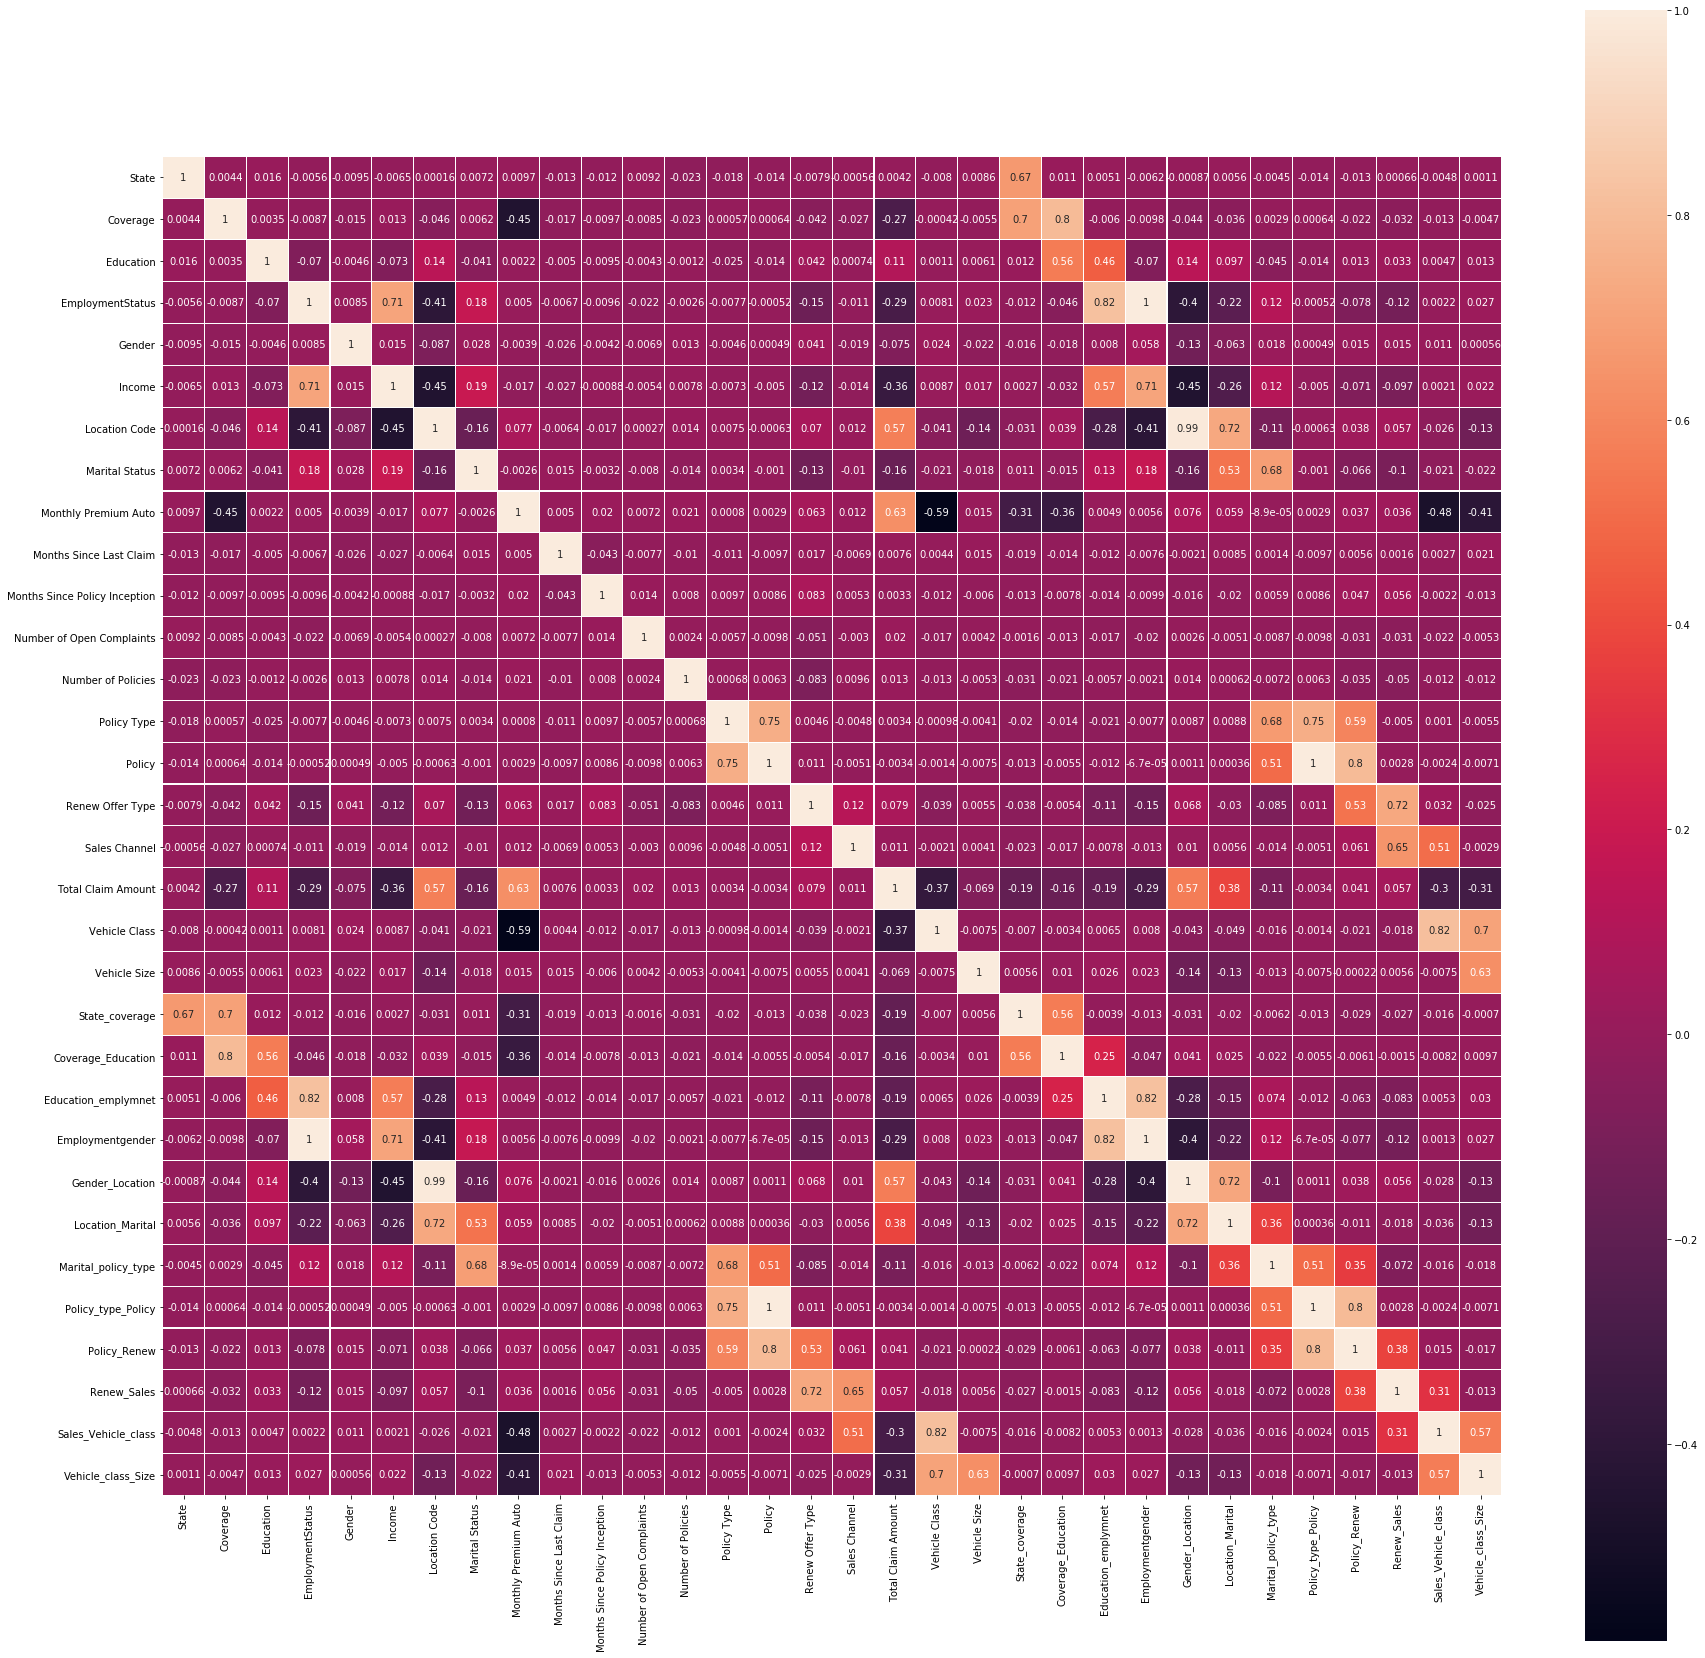

In [24]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(sub_data.corr(), annot = True, annot_kws={'size': 10}, square=True, linecolor='w', linewidths=0.1)

# We see the following observations:-
# 1.EmploymentGender and EmploymentStatus are highly correlated.
# 2.GenderLocation and LocationCode are highly corerlated
# 3. Policy_type_Policy and Policy are highly correlated
# 4.Eduction_employment_gender and  Education_employment are correlated.
# 5. Gender Location Marital and  Location Marital are highly correlated.
# 6.Policy_type_Policy_Renew and Policy_renew are highly correlated




In [25]:
sub_data.columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'State_coverage', 'Coverage_Education',
       'Education_emplymnet', 'Employmentgender', 'Gender_Location',
       'Location_Marital', 'Marital_policy_type', 'Policy_type_Policy',
       'Policy_Renew', 'Renew_Sales', 'Sales_Vehicle_class',
       'Vehicle_class_Size'],
      dtype='object')

In [26]:
#del final_data['EmploymentStatus']
#del final_data['Gender_Location']
del sub_data['Policy']
del sub_data['Location Code']
#del final_data['Education_emplymnet']
#del final_data['Location_Marital']
#del final_data['Policy_Renew']
#del final_data['Employmentgender']

In [27]:
X=sub_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [28]:
n_estimators=[120,300,500,800,1200]
max_depth=[5,8,15,25,30,None]
min_samples_split=[1,2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
max_features=[None,"sqrt","log2"]
max_leaf_nodes=[None,2,4,8]
ccp_alpha=[0.0,0.00001,0.0001]

parameters=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)

rf_model=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3)

crosscvrf=RandomizedSearchCV(estimator=rf_model,param_distributions=parameters,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [29]:
Random_Forest_extra_features=crosscvrf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [-6259.46684975 -5648.47152181 -4514.10121975            nan
            nan -5956.87584796            nan -5956.7566136
 -5489.97736648 -6259.34534683]
  category=UserWarning
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [-6265.15827326 -5641.86039239 -4338.82031203            nan
            nan -5967.96745498            nan -5967.96591723
 -5437.30939605 -6266.46174263]
  category=UserWarning


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\91996\\AppData\\Local\\Temp\\joblib_memmapping_folder_3232_7919876423\\3232-2891088588936-2f317b48d60f428daf946f5ad30ff23f.pkl'

In [129]:
Random_Forest_extra_features.best_params_

{'n_estimators': 800,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': 15,
 'ccp_alpha': 0.0}

In [130]:
rf_model_Final=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,
                                    n_estimators=800,
 min_samples_split=15,
 min_samples_leaf=1,
 max_leaf_nodes=None,
 max_features=None,
 max_depth=15,
 ccp_alpha=0.0)

In [131]:
random_forest_features=rf_model_Final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800building tree 14 of 800

building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s



building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
building tree 43 of 800
building tree 44 of 800
building tree 45 of 800
building tree 46 of 800
building tree 47 of 800
building tree 48 of 800
building tree 49 of 800
building tree 50 of 800
building tree 51 of 800
building tree 52 of 800
building tree 53 of 800
building tree 54 of 800
building tree 55 of 800
building tree 56 of 800
building tree 57 of 800
building tree 58 of 800
building tree 59 of 800
building tree 60 of 800
building tree 61 of 800
building tree 62 of 800
building tree 63 of 800
building tree 64 of 800
building tree 65 of 800
building tree 66 of 800
building tree 67 of 800
building tree 68 of 800
building tree 69 of 800
building tree 70 of 800
building tree 71 of 800
building tree 72 of 800
building tree 73 of 800
building tree 74 of 800
building tree 75 of 800
building tree 76 of 800
building tree 77 of 800
building tree 78 of 800
building tree 7

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.4s



building tree 124 of 800
building tree 125 of 800
building tree 126 of 800
building tree 127 of 800
building tree 128 of 800
building tree 129 of 800
building tree 130 of 800
building tree 131 of 800
building tree 132 of 800
building tree 133 of 800
building tree 134 of 800
building tree 135 of 800
building tree 136 of 800
building tree 137 of 800
building tree 138 of 800
building tree 139 of 800
building tree 140 of 800
building tree 141 of 800
building tree 142 of 800
building tree 143 of 800
building tree 144 of 800
building tree 145 of 800
building tree 146 of 800
building tree 147 of 800
building tree 148 of 800
building tree 149 of 800
building tree 150 of 800
building tree 151 of 800
building tree 152 of 800
building tree 153 of 800
building tree 154 of 800
building tree 155 of 800
building tree 156 of 800
building tree 157 of 800
building tree 158 of 800
building tree 159 of 800
building tree 160 of 800
building tree 161 of 800
building tree 162 of 800building tree 163 of 800


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    3.4s


building tree 283 of 800
building tree 284 of 800
building tree 285 of 800
building tree 286 of 800
building tree 287 of 800
building tree 288 of 800
building tree 289 of 800
building tree 290 of 800
building tree 291 of 800
building tree 292 of 800
building tree 293 of 800
building tree 294 of 800
building tree 295 of 800
building tree 296 of 800
building tree 297 of 800
building tree 298 of 800
building tree 299 of 800
building tree 300 of 800
building tree 301 of 800
building tree 302 of 800
building tree 303 of 800
building tree 304 of 800
building tree 305 of 800
building tree 306 of 800
building tree 307 of 800
building tree 308 of 800
building tree 309 of 800
building tree 310 of 800
building tree 311 of 800
building tree 312 of 800
building tree 313 of 800
building tree 314 of 800
building tree 315 of 800
building tree 316 of 800
building tree 317 of 800
building tree 318 of 800
building tree 319 of 800
building tree 320 of 800
building tree 321 of 800
building tree 322 of 800


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    6.2s




building tree 512 of 800
building tree 513 of 800
building tree 514 of 800
building tree 515 of 800
building tree 516 of 800
building tree 517 of 800
building tree 518 of 800
building tree 519 of 800
building tree 520 of 800
building tree 521 of 800
building tree 522 of 800
building tree 523 of 800
building tree 524 of 800
building tree 525 of 800
building tree 526 of 800
building tree 527 of 800
building tree 528 of 800
building tree 529 of 800
building tree 530 of 800
building tree 531 of 800
building tree 532 of 800
building tree 533 of 800
building tree 534 of 800
building tree 535 of 800
building tree 536 of 800
building tree 537 of 800
building tree 538 of 800
building tree 539 of 800
building tree 540 of 800
building tree 541 of 800
building tree 542 of 800
building tree 543 of 800
building tree 544 of 800
building tree 545 of 800
building tree 546 of 800
building tree 547 of 800
building tree 548 of 800
building tree 549 of 800
building tree 550 of 800
building tree 551 of 80

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    9.9s finished



building tree 799 of 800
building tree 800 of 800


In [132]:
train_predicted_y=random_forest_features.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.2s finished


In [133]:
r2_score(y_train,train_predicted_y)

0.8703745698694684

In [134]:
test_predicted_y=random_forest_features.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.0s finished


In [135]:
r2_score(y_test,test_predicted_y)

0.69473962155516